In [1]:
from cc.env import make_env
from cc.examples.neural_ode_model_compact_example import make_neural_ode_model
from cc.train import (
    ModelControllerTrainer, 
    Tracker, make_dataloader, 
    UnsupervisedDataset
)
import jax.random as jrand
import optax
import jax.numpy as jnp
import equinox as eqx

/home/simon/miniforge3/envs/chain_control/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
time_limit = 10.0
control_timestep = 0.01

env = make_env("two_segments_v1", time_limit=time_limit, control_timestep=control_timestep, random=1)

In [3]:
# make sure this definition matches exactly (!) the
# definition as it was used in notebook 3
model = make_neural_ode_model(
    env.action_spec(),
    env.observation_spec(),
    env.control_timestep,
    state_dim=50,
    f_depth=0, 
    u_transform=jnp.arctan
)

In [4]:
# trained in notebook 3
fitted_model = eqx.tree_deserialise_leaves("model.eqx", model)

# Training a controller

In [5]:
from cc.train import TrainingOptionsController
from cc.examples.neural_ode_controller_compact_example import make_neural_ode_controller
from cc.env.collect.collect import collect_random_step_source
from cc.env.wrappers import AddRefSignalRewardFnWrapper

source = collect_random_step_source(env, seeds=list(range(30)))
env_w_source = AddRefSignalRewardFnWrapper(env, source)

In [6]:
controller = make_neural_ode_controller(
    env_w_source.observation_spec(),
    env.action_spec(),
    env.control_timestep,
    5,
    f_depth=0
)

In [7]:
controller_dataloader = make_dataloader(
    UnsupervisedDataset(source.get_references_for_optimisation()),
    jrand.PRNGKey(1,),
    n_minibatches=5
)

optimizer = optax.chain(optax.clip_by_global_norm(1.0), optax.adam(1e-3))

controller_train_options = TrainingOptionsController(
    controller_dataloader, optimizer, 
)

controller_trainer = ModelControllerTrainer(
    fitted_model, controller, controller_train_options=controller_train_options, 
    trackers=[Tracker("loss")]
)

This model has been registered with model name `model0`.
                    When using multiple models individual model names have to
                    be provided by passing a dictionary in the `model` argument


In [8]:
controller_trainer.run(500)

  0%|                                                                                                                                                           | 0/500 [00:00<?, ?it/s]

loss:    56.6930 | loss_without_regu:    56.6930 | model0_train_mse:    56.6930 | train_loss:    56.6930 | :   0%|                                              | 0/500 [00:03<?, ?it/s]

loss:    56.6930 | loss_without_regu:    56.6930 | model0_train_mse:    56.6930 | train_loss:    56.6930 | :   0%|                                      | 1/500 [00:03<27:16,  3.28s/it]

loss:    33.4943 | loss_without_regu:    33.4943 | model0_train_mse:    33.4943 | train_loss:    33.4943 | :   0%|                                      | 1/500 [00:07<27:16,  3.28s/it]

loss:    33.4943 | loss_without_regu:    33.4943 | model0_train_mse:    33.4943 | train_loss:    33.4943 | :   0%|▏                                     | 2/500 [00:07<29:58,  3.61s/it]

loss:    28.5855 | loss_without_regu:    28.5855 | model0_train_mse:    28.5855 | train_loss:    28.5855 | :   0%|▏                                     | 2/500 [00:07<29:58,  3.61s/it]

loss:    24.6607 | loss_without_regu:    24.6607 | model0_train_mse:    24.6607 | train_loss:    24.6607 | :   0%|▏                                     | 2/500 [00:07<29:58,  3.61s/it]

loss:    24.6607 | loss_without_regu:    24.6607 | model0_train_mse:    24.6607 | train_loss:    24.6607 | :   1%|▎                                     | 4/500 [00:07<11:38,  1.41s/it]

loss:    20.7413 | loss_without_regu:    20.7413 | model0_train_mse:    20.7413 | train_loss:    20.7413 | :   1%|▎                                     | 4/500 [00:07<11:38,  1.41s/it]

loss:    17.2930 | loss_without_regu:    17.2930 | model0_train_mse:    17.2930 | train_loss:    17.2930 | :   1%|▎                                     | 4/500 [00:07<11:38,  1.41s/it]

loss:    17.2930 | loss_without_regu:    17.2930 | model0_train_mse:    17.2930 | train_loss:    17.2930 | :   1%|▍                                     | 6/500 [00:07<06:29,  1.27it/s]

loss:    13.6060 | loss_without_regu:    13.6060 | model0_train_mse:    13.6060 | train_loss:    13.6060 | :   1%|▍                                     | 6/500 [00:07<06:29,  1.27it/s]

loss:    10.2559 | loss_without_regu:    10.2559 | model0_train_mse:    10.2559 | train_loss:    10.2559 | :   1%|▍                                     | 6/500 [00:07<06:29,  1.27it/s]

loss:    10.2559 | loss_without_regu:    10.2559 | model0_train_mse:    10.2559 | train_loss:    10.2559 | :   2%|▌                                     | 8/500 [00:07<04:11,  1.96it/s]

loss:     8.0397 | loss_without_regu:     8.0397 | model0_train_mse:     8.0397 | train_loss:     8.0397 | :   2%|▌                                     | 8/500 [00:07<04:11,  1.96it/s]

loss:     5.9670 | loss_without_regu:     5.9670 | model0_train_mse:     5.9670 | train_loss:     5.9670 | :   2%|▌                                     | 8/500 [00:07<04:11,  1.96it/s]

loss:     5.9670 | loss_without_regu:     5.9670 | model0_train_mse:     5.9670 | train_loss:     5.9670 | :   2%|▋                                    | 10/500 [00:07<02:56,  2.78it/s]

loss:     4.6796 | loss_without_regu:     4.6796 | model0_train_mse:     4.6796 | train_loss:     4.6796 | :   2%|▋                                    | 10/500 [00:08<02:56,  2.78it/s]

loss:     4.6796 | loss_without_regu:     4.6796 | model0_train_mse:     4.6796 | train_loss:     4.6796 | :   2%|▊                                    | 11/500 [00:08<02:29,  3.26it/s]

loss:     3.6383 | loss_without_regu:     3.6383 | model0_train_mse:     3.6383 | train_loss:     3.6383 | :   2%|▊                                    | 11/500 [00:08<02:29,  3.26it/s]

loss:     3.6383 | loss_without_regu:     3.6383 | model0_train_mse:     3.6383 | train_loss:     3.6383 | :   2%|▉                                    | 12/500 [00:08<02:06,  3.85it/s]

loss:     2.9340 | loss_without_regu:     2.9340 | model0_train_mse:     2.9340 | train_loss:     2.9340 | :   2%|▉                                    | 12/500 [00:08<02:06,  3.85it/s]

loss:     2.9340 | loss_without_regu:     2.9340 | model0_train_mse:     2.9340 | train_loss:     2.9340 | :   3%|▉                                    | 13/500 [00:08<01:47,  4.52it/s]

loss:     2.3905 | loss_without_regu:     2.3905 | model0_train_mse:     2.3905 | train_loss:     2.3905 | :   3%|▉                                    | 13/500 [00:08<01:47,  4.52it/s]

loss:     2.3905 | loss_without_regu:     2.3905 | model0_train_mse:     2.3905 | train_loss:     2.3905 | :   3%|█                                    | 14/500 [00:08<01:32,  5.26it/s]

loss:     1.9423 | loss_without_regu:     1.9423 | model0_train_mse:     1.9423 | train_loss:     1.9423 | :   3%|█                                    | 14/500 [00:08<01:32,  5.26it/s]

loss:     1.9423 | loss_without_regu:     1.9423 | model0_train_mse:     1.9423 | train_loss:     1.9423 | :   3%|█                                    | 15/500 [00:08<01:20,  6.01it/s]

loss:     1.5872 | loss_without_regu:     1.5872 | model0_train_mse:     1.5872 | train_loss:     1.5872 | :   3%|█                                    | 15/500 [00:08<01:20,  6.01it/s]

loss:     1.5872 | loss_without_regu:     1.5872 | model0_train_mse:     1.5872 | train_loss:     1.5872 | :   3%|█▏                                   | 16/500 [00:08<01:11,  6.74it/s]

loss:     1.3145 | loss_without_regu:     1.3145 | model0_train_mse:     1.3145 | train_loss:     1.3145 | :   3%|█▏                                   | 16/500 [00:08<01:11,  6.74it/s]

loss:     1.3145 | loss_without_regu:     1.3145 | model0_train_mse:     1.3145 | train_loss:     1.3145 | :   3%|█▎                                   | 17/500 [00:08<01:05,  7.38it/s]

loss:     1.1842 | loss_without_regu:     1.1842 | model0_train_mse:     1.1842 | train_loss:     1.1842 | :   3%|█▎                                   | 17/500 [00:08<01:05,  7.38it/s]

loss:     1.1842 | loss_without_regu:     1.1842 | model0_train_mse:     1.1842 | train_loss:     1.1842 | :   4%|█▎                                   | 18/500 [00:08<01:00,  7.93it/s]

loss:     1.1629 | loss_without_regu:     1.1629 | model0_train_mse:     1.1629 | train_loss:     1.1629 | :   4%|█▎                                   | 18/500 [00:08<01:00,  7.93it/s]

loss:     1.1629 | loss_without_regu:     1.1629 | model0_train_mse:     1.1629 | train_loss:     1.1629 | :   4%|█▍                                   | 19/500 [00:08<00:57,  8.39it/s]

loss:     1.1385 | loss_without_regu:     1.1385 | model0_train_mse:     1.1385 | train_loss:     1.1385 | :   4%|█▍                                   | 19/500 [00:08<00:57,  8.39it/s]

loss:     1.1385 | loss_without_regu:     1.1385 | model0_train_mse:     1.1385 | train_loss:     1.1385 | :   4%|█▍                                   | 20/500 [00:08<00:54,  8.77it/s]

loss:     1.0903 | loss_without_regu:     1.0903 | model0_train_mse:     1.0903 | train_loss:     1.0903 | :   4%|█▍                                   | 20/500 [00:09<00:54,  8.77it/s]

loss:     1.0903 | loss_without_regu:     1.0903 | model0_train_mse:     1.0903 | train_loss:     1.0903 | :   4%|█▌                                   | 21/500 [00:09<00:52,  9.05it/s]

loss:     1.0600 | loss_without_regu:     1.0600 | model0_train_mse:     1.0600 | train_loss:     1.0600 | :   4%|█▌                                   | 21/500 [00:09<00:52,  9.05it/s]

loss:     1.0600 | loss_without_regu:     1.0600 | model0_train_mse:     1.0600 | train_loss:     1.0600 | :   4%|█▋                                   | 22/500 [00:09<00:51,  9.27it/s]

loss:     1.0314 | loss_without_regu:     1.0314 | model0_train_mse:     1.0314 | train_loss:     1.0314 | :   4%|█▋                                   | 22/500 [00:09<00:51,  9.27it/s]

loss:     1.0314 | loss_without_regu:     1.0314 | model0_train_mse:     1.0314 | train_loss:     1.0314 | :   5%|█▋                                   | 23/500 [00:09<00:50,  9.37it/s]

loss:     1.0026 | loss_without_regu:     1.0026 | model0_train_mse:     1.0026 | train_loss:     1.0026 | :   5%|█▋                                   | 23/500 [00:09<00:50,  9.37it/s]

loss:     1.0026 | loss_without_regu:     1.0026 | model0_train_mse:     1.0026 | train_loss:     1.0026 | :   5%|█▊                                   | 24/500 [00:09<00:50,  9.39it/s]

loss:     0.9701 | loss_without_regu:     0.9701 | model0_train_mse:     0.9701 | train_loss:     0.9701 | :   5%|█▊                                   | 24/500 [00:09<00:50,  9.39it/s]

loss:     0.9701 | loss_without_regu:     0.9701 | model0_train_mse:     0.9701 | train_loss:     0.9701 | :   5%|█▊                                   | 25/500 [00:09<00:49,  9.51it/s]

loss:     0.9496 | loss_without_regu:     0.9496 | model0_train_mse:     0.9496 | train_loss:     0.9496 | :   5%|█▊                                   | 25/500 [00:09<00:49,  9.51it/s]

loss:     0.9496 | loss_without_regu:     0.9496 | model0_train_mse:     0.9496 | train_loss:     0.9496 | :   5%|█▉                                   | 26/500 [00:09<00:49,  9.59it/s]

loss:     0.9394 | loss_without_regu:     0.9394 | model0_train_mse:     0.9394 | train_loss:     0.9394 | :   5%|█▉                                   | 26/500 [00:09<00:49,  9.59it/s]

loss:     0.9394 | loss_without_regu:     0.9394 | model0_train_mse:     0.9394 | train_loss:     0.9394 | :   5%|█▉                                   | 27/500 [00:09<00:49,  9.65it/s]

loss:     0.9264 | loss_without_regu:     0.9264 | model0_train_mse:     0.9264 | train_loss:     0.9264 | :   5%|█▉                                   | 27/500 [00:09<00:49,  9.65it/s]

loss:     0.9158 | loss_without_regu:     0.9158 | model0_train_mse:     0.9158 | train_loss:     0.9158 | :   5%|█▉                                   | 27/500 [00:09<00:49,  9.65it/s]

loss:     0.9158 | loss_without_regu:     0.9158 | model0_train_mse:     0.9158 | train_loss:     0.9158 | :   6%|██▏                                  | 29/500 [00:09<00:47,  9.96it/s]

loss:     0.9093 | loss_without_regu:     0.9093 | model0_train_mse:     0.9093 | train_loss:     0.9093 | :   6%|██▏                                  | 29/500 [00:09<00:47,  9.96it/s]

loss:     0.9047 | loss_without_regu:     0.9047 | model0_train_mse:     0.9047 | train_loss:     0.9047 | :   6%|██▏                                  | 29/500 [00:10<00:47,  9.96it/s]

loss:     0.9047 | loss_without_regu:     0.9047 | model0_train_mse:     0.9047 | train_loss:     0.9047 | :   6%|██▎                                  | 31/500 [00:10<00:46, 10.05it/s]

loss:     0.9008 | loss_without_regu:     0.9008 | model0_train_mse:     0.9008 | train_loss:     0.9008 | :   6%|██▎                                  | 31/500 [00:10<00:46, 10.05it/s]

loss:     0.8971 | loss_without_regu:     0.8971 | model0_train_mse:     0.8971 | train_loss:     0.8971 | :   6%|██▎                                  | 31/500 [00:10<00:46, 10.05it/s]

loss:     0.8971 | loss_without_regu:     0.8971 | model0_train_mse:     0.8971 | train_loss:     0.8971 | :   7%|██▍                                  | 33/500 [00:10<00:46, 10.12it/s]

loss:     0.8929 | loss_without_regu:     0.8929 | model0_train_mse:     0.8929 | train_loss:     0.8929 | :   7%|██▍                                  | 33/500 [00:10<00:46, 10.12it/s]

loss:     0.8907 | loss_without_regu:     0.8907 | model0_train_mse:     0.8907 | train_loss:     0.8907 | :   7%|██▍                                  | 33/500 [00:10<00:46, 10.12it/s]

loss:     0.8907 | loss_without_regu:     0.8907 | model0_train_mse:     0.8907 | train_loss:     0.8907 | :   7%|██▌                                  | 35/500 [00:10<00:45, 10.13it/s]

loss:     0.8852 | loss_without_regu:     0.8852 | model0_train_mse:     0.8852 | train_loss:     0.8852 | :   7%|██▌                                  | 35/500 [00:10<00:45, 10.13it/s]

loss:     0.8792 | loss_without_regu:     0.8792 | model0_train_mse:     0.8792 | train_loss:     0.8792 | :   7%|██▌                                  | 35/500 [00:10<00:45, 10.13it/s]

loss:     0.8792 | loss_without_regu:     0.8792 | model0_train_mse:     0.8792 | train_loss:     0.8792 | :   7%|██▋                                  | 37/500 [00:10<00:45, 10.12it/s]

loss:     0.8751 | loss_without_regu:     0.8751 | model0_train_mse:     0.8751 | train_loss:     0.8751 | :   7%|██▋                                  | 37/500 [00:10<00:45, 10.12it/s]

loss:     0.8706 | loss_without_regu:     0.8706 | model0_train_mse:     0.8706 | train_loss:     0.8706 | :   7%|██▋                                  | 37/500 [00:10<00:45, 10.12it/s]

loss:     0.8706 | loss_without_regu:     0.8706 | model0_train_mse:     0.8706 | train_loss:     0.8706 | :   8%|██▉                                  | 39/500 [00:10<00:45, 10.14it/s]

loss:     0.8657 | loss_without_regu:     0.8657 | model0_train_mse:     0.8657 | train_loss:     0.8657 | :   8%|██▉                                  | 39/500 [00:10<00:45, 10.14it/s]

loss:     0.8615 | loss_without_regu:     0.8615 | model0_train_mse:     0.8615 | train_loss:     0.8615 | :   8%|██▉                                  | 39/500 [00:11<00:45, 10.14it/s]

loss:     0.8615 | loss_without_regu:     0.8615 | model0_train_mse:     0.8615 | train_loss:     0.8615 | :   8%|███                                  | 41/500 [00:11<00:45, 10.15it/s]

loss:     0.8574 | loss_without_regu:     0.8574 | model0_train_mse:     0.8574 | train_loss:     0.8574 | :   8%|███                                  | 41/500 [00:11<00:45, 10.15it/s]

loss:     0.8529 | loss_without_regu:     0.8529 | model0_train_mse:     0.8529 | train_loss:     0.8529 | :   8%|███                                  | 41/500 [00:11<00:45, 10.15it/s]

loss:     0.8529 | loss_without_regu:     0.8529 | model0_train_mse:     0.8529 | train_loss:     0.8529 | :   9%|███▏                                 | 43/500 [00:11<00:44, 10.17it/s]

loss:     0.8492 | loss_without_regu:     0.8492 | model0_train_mse:     0.8492 | train_loss:     0.8492 | :   9%|███▏                                 | 43/500 [00:11<00:44, 10.17it/s]

loss:     0.8451 | loss_without_regu:     0.8451 | model0_train_mse:     0.8451 | train_loss:     0.8451 | :   9%|███▏                                 | 43/500 [00:11<00:44, 10.17it/s]

loss:     0.8451 | loss_without_regu:     0.8451 | model0_train_mse:     0.8451 | train_loss:     0.8451 | :   9%|███▎                                 | 45/500 [00:11<00:44, 10.15it/s]

loss:     0.8412 | loss_without_regu:     0.8412 | model0_train_mse:     0.8412 | train_loss:     0.8412 | :   9%|███▎                                 | 45/500 [00:11<00:44, 10.15it/s]

loss:     0.8376 | loss_without_regu:     0.8376 | model0_train_mse:     0.8376 | train_loss:     0.8376 | :   9%|███▎                                 | 45/500 [00:11<00:44, 10.15it/s]

loss:     0.8376 | loss_without_regu:     0.8376 | model0_train_mse:     0.8376 | train_loss:     0.8376 | :   9%|███▍                                 | 47/500 [00:11<00:44, 10.10it/s]

loss:     0.8378 | loss_without_regu:     0.8378 | model0_train_mse:     0.8378 | train_loss:     0.8378 | :   9%|███▍                                 | 47/500 [00:11<00:44, 10.10it/s]

loss:     0.8382 | loss_without_regu:     0.8382 | model0_train_mse:     0.8382 | train_loss:     0.8382 | :   9%|███▍                                 | 47/500 [00:11<00:44, 10.10it/s]

loss:     0.8382 | loss_without_regu:     0.8382 | model0_train_mse:     0.8382 | train_loss:     0.8382 | :  10%|███▋                                 | 49/500 [00:11<00:44, 10.12it/s]

loss:     0.8358 | loss_without_regu:     0.8358 | model0_train_mse:     0.8358 | train_loss:     0.8358 | :  10%|███▋                                 | 49/500 [00:11<00:44, 10.12it/s]

loss:     0.8348 | loss_without_regu:     0.8348 | model0_train_mse:     0.8348 | train_loss:     0.8348 | :  10%|███▋                                 | 49/500 [00:12<00:44, 10.12it/s]

loss:     0.8348 | loss_without_regu:     0.8348 | model0_train_mse:     0.8348 | train_loss:     0.8348 | :  10%|███▊                                 | 51/500 [00:12<00:44, 10.12it/s]

loss:     0.8283 | loss_without_regu:     0.8283 | model0_train_mse:     0.8283 | train_loss:     0.8283 | :  10%|███▊                                 | 51/500 [00:12<00:44, 10.12it/s]

loss:     0.8279 | loss_without_regu:     0.8279 | model0_train_mse:     0.8279 | train_loss:     0.8279 | :  10%|███▊                                 | 51/500 [00:12<00:44, 10.12it/s]

loss:     0.8279 | loss_without_regu:     0.8279 | model0_train_mse:     0.8279 | train_loss:     0.8279 | :  11%|███▉                                 | 53/500 [00:12<00:44, 10.03it/s]

loss:     0.8265 | loss_without_regu:     0.8265 | model0_train_mse:     0.8265 | train_loss:     0.8265 | :  11%|███▉                                 | 53/500 [00:12<00:44, 10.03it/s]

loss:     0.8249 | loss_without_regu:     0.8249 | model0_train_mse:     0.8249 | train_loss:     0.8249 | :  11%|███▉                                 | 53/500 [00:12<00:44, 10.03it/s]

loss:     0.8249 | loss_without_regu:     0.8249 | model0_train_mse:     0.8249 | train_loss:     0.8249 | :  11%|████                                 | 55/500 [00:12<00:45,  9.88it/s]

loss:     0.8287 | loss_without_regu:     0.8287 | model0_train_mse:     0.8287 | train_loss:     0.8287 | :  11%|████                                 | 55/500 [00:12<00:45,  9.88it/s]

loss:     0.8287 | loss_without_regu:     0.8287 | model0_train_mse:     0.8287 | train_loss:     0.8287 | :  11%|████▏                                | 56/500 [00:12<00:45,  9.81it/s]

loss:     0.8252 | loss_without_regu:     0.8252 | model0_train_mse:     0.8252 | train_loss:     0.8252 | :  11%|████▏                                | 56/500 [00:12<00:45,  9.81it/s]

loss:     0.8252 | loss_without_regu:     0.8252 | model0_train_mse:     0.8252 | train_loss:     0.8252 | :  11%|████▏                                | 57/500 [00:12<00:45,  9.72it/s]

loss:     0.8184 | loss_without_regu:     0.8184 | model0_train_mse:     0.8184 | train_loss:     0.8184 | :  11%|████▏                                | 57/500 [00:12<00:45,  9.72it/s]

loss:     0.8184 | loss_without_regu:     0.8184 | model0_train_mse:     0.8184 | train_loss:     0.8184 | :  12%|████▎                                | 58/500 [00:12<00:45,  9.70it/s]

loss:     0.8182 | loss_without_regu:     0.8182 | model0_train_mse:     0.8182 | train_loss:     0.8182 | :  12%|████▎                                | 58/500 [00:12<00:45,  9.70it/s]

loss:     0.8182 | loss_without_regu:     0.8182 | model0_train_mse:     0.8182 | train_loss:     0.8182 | :  12%|████▎                                | 59/500 [00:12<00:45,  9.65it/s]

loss:     0.8166 | loss_without_regu:     0.8166 | model0_train_mse:     0.8166 | train_loss:     0.8166 | :  12%|████▎                                | 59/500 [00:12<00:45,  9.65it/s]

loss:     0.8166 | loss_without_regu:     0.8166 | model0_train_mse:     0.8166 | train_loss:     0.8166 | :  12%|████▍                                | 60/500 [00:12<00:45,  9.62it/s]

loss:     0.8161 | loss_without_regu:     0.8161 | model0_train_mse:     0.8161 | train_loss:     0.8161 | :  12%|████▍                                | 60/500 [00:13<00:45,  9.62it/s]

loss:     0.8161 | loss_without_regu:     0.8161 | model0_train_mse:     0.8161 | train_loss:     0.8161 | :  12%|████▌                                | 61/500 [00:13<00:45,  9.58it/s]

loss:     0.8134 | loss_without_regu:     0.8134 | model0_train_mse:     0.8134 | train_loss:     0.8134 | :  12%|████▌                                | 61/500 [00:13<00:45,  9.58it/s]

loss:     0.8134 | loss_without_regu:     0.8134 | model0_train_mse:     0.8134 | train_loss:     0.8134 | :  12%|████▌                                | 62/500 [00:13<00:46,  9.50it/s]

loss:     0.8137 | loss_without_regu:     0.8137 | model0_train_mse:     0.8137 | train_loss:     0.8137 | :  12%|████▌                                | 62/500 [00:13<00:46,  9.50it/s]

loss:     0.8137 | loss_without_regu:     0.8137 | model0_train_mse:     0.8137 | train_loss:     0.8137 | :  13%|████▋                                | 63/500 [00:13<00:46,  9.43it/s]

loss:     0.8121 | loss_without_regu:     0.8121 | model0_train_mse:     0.8121 | train_loss:     0.8121 | :  13%|████▋                                | 63/500 [00:13<00:46,  9.43it/s]

loss:     0.8121 | loss_without_regu:     0.8121 | model0_train_mse:     0.8121 | train_loss:     0.8121 | :  13%|████▋                                | 64/500 [00:13<00:46,  9.38it/s]

loss:     0.8099 | loss_without_regu:     0.8099 | model0_train_mse:     0.8099 | train_loss:     0.8099 | :  13%|████▋                                | 64/500 [00:13<00:46,  9.38it/s]

loss:     0.8099 | loss_without_regu:     0.8099 | model0_train_mse:     0.8099 | train_loss:     0.8099 | :  13%|████▊                                | 65/500 [00:13<00:46,  9.35it/s]

loss:     0.8071 | loss_without_regu:     0.8071 | model0_train_mse:     0.8071 | train_loss:     0.8071 | :  13%|████▊                                | 65/500 [00:13<00:46,  9.35it/s]

loss:     0.8071 | loss_without_regu:     0.8071 | model0_train_mse:     0.8071 | train_loss:     0.8071 | :  13%|████▉                                | 66/500 [00:13<00:46,  9.33it/s]

loss:     0.8026 | loss_without_regu:     0.8026 | model0_train_mse:     0.8026 | train_loss:     0.8026 | :  13%|████▉                                | 66/500 [00:13<00:46,  9.33it/s]

loss:     0.8026 | loss_without_regu:     0.8026 | model0_train_mse:     0.8026 | train_loss:     0.8026 | :  13%|████▉                                | 67/500 [00:13<00:46,  9.31it/s]

loss:     0.7996 | loss_without_regu:     0.7996 | model0_train_mse:     0.7996 | train_loss:     0.7996 | :  13%|████▉                                | 67/500 [00:13<00:46,  9.31it/s]

loss:     0.7996 | loss_without_regu:     0.7996 | model0_train_mse:     0.7996 | train_loss:     0.7996 | :  14%|█████                                | 68/500 [00:13<00:46,  9.31it/s]

loss:     0.7965 | loss_without_regu:     0.7965 | model0_train_mse:     0.7965 | train_loss:     0.7965 | :  14%|█████                                | 68/500 [00:13<00:46,  9.31it/s]

loss:     0.7965 | loss_without_regu:     0.7965 | model0_train_mse:     0.7965 | train_loss:     0.7965 | :  14%|█████                                | 69/500 [00:13<00:45,  9.38it/s]

loss:     0.7930 | loss_without_regu:     0.7930 | model0_train_mse:     0.7930 | train_loss:     0.7930 | :  14%|█████                                | 69/500 [00:14<00:45,  9.38it/s]

loss:     0.7930 | loss_without_regu:     0.7930 | model0_train_mse:     0.7930 | train_loss:     0.7930 | :  14%|█████▏                               | 70/500 [00:14<00:45,  9.43it/s]

loss:     0.7895 | loss_without_regu:     0.7895 | model0_train_mse:     0.7895 | train_loss:     0.7895 | :  14%|█████▏                               | 70/500 [00:14<00:45,  9.43it/s]

loss:     0.7895 | loss_without_regu:     0.7895 | model0_train_mse:     0.7895 | train_loss:     0.7895 | :  14%|█████▎                               | 71/500 [00:14<00:45,  9.46it/s]

loss:     0.7864 | loss_without_regu:     0.7864 | model0_train_mse:     0.7864 | train_loss:     0.7864 | :  14%|█████▎                               | 71/500 [00:14<00:45,  9.46it/s]

loss:     0.7864 | loss_without_regu:     0.7864 | model0_train_mse:     0.7864 | train_loss:     0.7864 | :  14%|█████▎                               | 72/500 [00:14<00:45,  9.49it/s]

loss:     0.7824 | loss_without_regu:     0.7824 | model0_train_mse:     0.7824 | train_loss:     0.7824 | :  14%|█████▎                               | 72/500 [00:14<00:45,  9.49it/s]

loss:     0.7824 | loss_without_regu:     0.7824 | model0_train_mse:     0.7824 | train_loss:     0.7824 | :  15%|█████▍                               | 73/500 [00:14<00:44,  9.50it/s]

loss:     0.7799 | loss_without_regu:     0.7799 | model0_train_mse:     0.7799 | train_loss:     0.7799 | :  15%|█████▍                               | 73/500 [00:14<00:44,  9.50it/s]

loss:     0.7799 | loss_without_regu:     0.7799 | model0_train_mse:     0.7799 | train_loss:     0.7799 | :  15%|█████▍                               | 74/500 [00:14<00:44,  9.49it/s]

loss:     0.7770 | loss_without_regu:     0.7770 | model0_train_mse:     0.7770 | train_loss:     0.7770 | :  15%|█████▍                               | 74/500 [00:14<00:44,  9.49it/s]

loss:     0.7770 | loss_without_regu:     0.7770 | model0_train_mse:     0.7770 | train_loss:     0.7770 | :  15%|█████▌                               | 75/500 [00:14<00:44,  9.50it/s]

loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  15%|█████▌                               | 75/500 [00:14<00:44,  9.50it/s]

loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  15%|█████▌                               | 76/500 [00:14<00:44,  9.51it/s]

loss:     0.7737 | loss_without_regu:     0.7737 | model0_train_mse:     0.7737 | train_loss:     0.7737 | :  15%|█████▌                               | 76/500 [00:14<00:44,  9.51it/s]

loss:     0.7737 | loss_without_regu:     0.7737 | model0_train_mse:     0.7737 | train_loss:     0.7737 | :  15%|█████▋                               | 77/500 [00:14<00:44,  9.52it/s]

loss:     0.7707 | loss_without_regu:     0.7707 | model0_train_mse:     0.7707 | train_loss:     0.7707 | :  15%|█████▋                               | 77/500 [00:14<00:44,  9.52it/s]

loss:     0.7707 | loss_without_regu:     0.7707 | model0_train_mse:     0.7707 | train_loss:     0.7707 | :  16%|█████▊                               | 78/500 [00:14<00:44,  9.54it/s]

loss:     0.7668 | loss_without_regu:     0.7668 | model0_train_mse:     0.7668 | train_loss:     0.7668 | :  16%|█████▊                               | 78/500 [00:14<00:44,  9.54it/s]

loss:     0.7668 | loss_without_regu:     0.7668 | model0_train_mse:     0.7668 | train_loss:     0.7668 | :  16%|█████▊                               | 79/500 [00:14<00:44,  9.44it/s]

loss:     0.7646 | loss_without_regu:     0.7646 | model0_train_mse:     0.7646 | train_loss:     0.7646 | :  16%|█████▊                               | 79/500 [00:15<00:44,  9.44it/s]

loss:     0.7646 | loss_without_regu:     0.7646 | model0_train_mse:     0.7646 | train_loss:     0.7646 | :  16%|█████▉                               | 80/500 [00:15<00:44,  9.44it/s]

loss:     0.7613 | loss_without_regu:     0.7613 | model0_train_mse:     0.7613 | train_loss:     0.7613 | :  16%|█████▉                               | 80/500 [00:15<00:44,  9.44it/s]

loss:     0.7613 | loss_without_regu:     0.7613 | model0_train_mse:     0.7613 | train_loss:     0.7613 | :  16%|█████▉                               | 81/500 [00:15<00:44,  9.38it/s]

loss:     0.7587 | loss_without_regu:     0.7587 | model0_train_mse:     0.7587 | train_loss:     0.7587 | :  16%|█████▉                               | 81/500 [00:15<00:44,  9.38it/s]

loss:     0.7587 | loss_without_regu:     0.7587 | model0_train_mse:     0.7587 | train_loss:     0.7587 | :  16%|██████                               | 82/500 [00:15<00:44,  9.41it/s]

loss:     0.7563 | loss_without_regu:     0.7563 | model0_train_mse:     0.7563 | train_loss:     0.7563 | :  16%|██████                               | 82/500 [00:15<00:44,  9.41it/s]

loss:     0.7563 | loss_without_regu:     0.7563 | model0_train_mse:     0.7563 | train_loss:     0.7563 | :  17%|██████▏                              | 83/500 [00:15<00:44,  9.43it/s]

loss:     0.7547 | loss_without_regu:     0.7547 | model0_train_mse:     0.7547 | train_loss:     0.7547 | :  17%|██████▏                              | 83/500 [00:15<00:44,  9.43it/s]

loss:     0.7547 | loss_without_regu:     0.7547 | model0_train_mse:     0.7547 | train_loss:     0.7547 | :  17%|██████▏                              | 84/500 [00:15<00:46,  8.99it/s]

loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  17%|██████▏                              | 84/500 [00:15<00:46,  8.99it/s]

loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  17%|██████▎                              | 85/500 [00:15<00:46,  9.01it/s]

loss:     0.7470 | loss_without_regu:     0.7470 | model0_train_mse:     0.7470 | train_loss:     0.7470 | :  17%|██████▎                              | 85/500 [00:15<00:46,  9.01it/s]

loss:     0.7470 | loss_without_regu:     0.7470 | model0_train_mse:     0.7470 | train_loss:     0.7470 | :  17%|██████▎                              | 86/500 [00:15<00:45,  9.08it/s]

loss:     0.7438 | loss_without_regu:     0.7438 | model0_train_mse:     0.7438 | train_loss:     0.7438 | :  17%|██████▎                              | 86/500 [00:15<00:45,  9.08it/s]

loss:     0.7438 | loss_without_regu:     0.7438 | model0_train_mse:     0.7438 | train_loss:     0.7438 | :  17%|██████▍                              | 87/500 [00:15<00:45,  9.16it/s]

loss:     0.7434 | loss_without_regu:     0.7434 | model0_train_mse:     0.7434 | train_loss:     0.7434 | :  17%|██████▍                              | 87/500 [00:15<00:45,  9.16it/s]

loss:     0.7434 | loss_without_regu:     0.7434 | model0_train_mse:     0.7434 | train_loss:     0.7434 | :  18%|██████▌                              | 88/500 [00:15<00:44,  9.25it/s]

loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  18%|██████▌                              | 88/500 [00:16<00:44,  9.25it/s]

loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  18%|██████▌                              | 89/500 [00:16<00:44,  9.32it/s]

loss:     0.7406 | loss_without_regu:     0.7406 | model0_train_mse:     0.7406 | train_loss:     0.7406 | :  18%|██████▌                              | 89/500 [00:16<00:44,  9.32it/s]

loss:     0.7406 | loss_without_regu:     0.7406 | model0_train_mse:     0.7406 | train_loss:     0.7406 | :  18%|██████▋                              | 90/500 [00:16<00:43,  9.39it/s]

loss:     0.7351 | loss_without_regu:     0.7351 | model0_train_mse:     0.7351 | train_loss:     0.7351 | :  18%|██████▋                              | 90/500 [00:16<00:43,  9.39it/s]

loss:     0.7351 | loss_without_regu:     0.7351 | model0_train_mse:     0.7351 | train_loss:     0.7351 | :  18%|██████▋                              | 91/500 [00:16<00:43,  9.43it/s]

loss:     0.7367 | loss_without_regu:     0.7367 | model0_train_mse:     0.7367 | train_loss:     0.7367 | :  18%|██████▋                              | 91/500 [00:16<00:43,  9.43it/s]

loss:     0.7367 | loss_without_regu:     0.7367 | model0_train_mse:     0.7367 | train_loss:     0.7367 | :  18%|██████▊                              | 92/500 [00:16<00:43,  9.46it/s]

loss:     0.7327 | loss_without_regu:     0.7327 | model0_train_mse:     0.7327 | train_loss:     0.7327 | :  18%|██████▊                              | 92/500 [00:16<00:43,  9.46it/s]

loss:     0.7327 | loss_without_regu:     0.7327 | model0_train_mse:     0.7327 | train_loss:     0.7327 | :  19%|██████▉                              | 93/500 [00:16<00:42,  9.47it/s]

loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  19%|██████▉                              | 93/500 [00:16<00:42,  9.47it/s]

loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  19%|██████▉                              | 94/500 [00:16<00:42,  9.49it/s]

loss:     0.7375 | loss_without_regu:     0.7375 | model0_train_mse:     0.7375 | train_loss:     0.7375 | :  19%|██████▉                              | 94/500 [00:16<00:42,  9.49it/s]

loss:     0.7375 | loss_without_regu:     0.7375 | model0_train_mse:     0.7375 | train_loss:     0.7375 | :  19%|███████                              | 95/500 [00:16<00:42,  9.49it/s]

loss:     0.7362 | loss_without_regu:     0.7362 | model0_train_mse:     0.7362 | train_loss:     0.7362 | :  19%|███████                              | 95/500 [00:16<00:42,  9.49it/s]

loss:     0.7362 | loss_without_regu:     0.7362 | model0_train_mse:     0.7362 | train_loss:     0.7362 | :  19%|███████                              | 96/500 [00:16<00:43,  9.38it/s]

loss:     0.7287 | loss_without_regu:     0.7287 | model0_train_mse:     0.7287 | train_loss:     0.7287 | :  19%|███████                              | 96/500 [00:16<00:43,  9.38it/s]

loss:     0.7287 | loss_without_regu:     0.7287 | model0_train_mse:     0.7287 | train_loss:     0.7287 | :  19%|███████▏                             | 97/500 [00:16<00:43,  9.30it/s]

loss:     0.7252 | loss_without_regu:     0.7252 | model0_train_mse:     0.7252 | train_loss:     0.7252 | :  19%|███████▏                             | 97/500 [00:17<00:43,  9.30it/s]

loss:     0.7252 | loss_without_regu:     0.7252 | model0_train_mse:     0.7252 | train_loss:     0.7252 | :  20%|███████▎                             | 98/500 [00:17<00:43,  9.27it/s]

loss:     0.7239 | loss_without_regu:     0.7239 | model0_train_mse:     0.7239 | train_loss:     0.7239 | :  20%|███████▎                             | 98/500 [00:17<00:43,  9.27it/s]

loss:     0.7239 | loss_without_regu:     0.7239 | model0_train_mse:     0.7239 | train_loss:     0.7239 | :  20%|███████▎                             | 99/500 [00:17<00:43,  9.27it/s]

loss:     0.7233 | loss_without_regu:     0.7233 | model0_train_mse:     0.7233 | train_loss:     0.7233 | :  20%|███████▎                             | 99/500 [00:17<00:43,  9.27it/s]

loss:     0.7233 | loss_without_regu:     0.7233 | model0_train_mse:     0.7233 | train_loss:     0.7233 | :  20%|███████▏                            | 100/500 [00:17<00:43,  9.23it/s]

loss:     0.7213 | loss_without_regu:     0.7213 | model0_train_mse:     0.7213 | train_loss:     0.7213 | :  20%|███████▏                            | 100/500 [00:17<00:43,  9.23it/s]

loss:     0.7213 | loss_without_regu:     0.7213 | model0_train_mse:     0.7213 | train_loss:     0.7213 | :  20%|███████▎                            | 101/500 [00:17<00:43,  9.21it/s]

loss:     0.7194 | loss_without_regu:     0.7194 | model0_train_mse:     0.7194 | train_loss:     0.7194 | :  20%|███████▎                            | 101/500 [00:17<00:43,  9.21it/s]

loss:     0.7194 | loss_without_regu:     0.7194 | model0_train_mse:     0.7194 | train_loss:     0.7194 | :  20%|███████▎                            | 102/500 [00:17<00:43,  9.21it/s]

loss:     0.7184 | loss_without_regu:     0.7184 | model0_train_mse:     0.7184 | train_loss:     0.7184 | :  20%|███████▎                            | 102/500 [00:17<00:43,  9.21it/s]

loss:     0.7184 | loss_without_regu:     0.7184 | model0_train_mse:     0.7184 | train_loss:     0.7184 | :  21%|███████▍                            | 103/500 [00:17<00:42,  9.29it/s]

loss:     0.7165 | loss_without_regu:     0.7165 | model0_train_mse:     0.7165 | train_loss:     0.7165 | :  21%|███████▍                            | 103/500 [00:17<00:42,  9.29it/s]

loss:     0.7165 | loss_without_regu:     0.7165 | model0_train_mse:     0.7165 | train_loss:     0.7165 | :  21%|███████▍                            | 104/500 [00:17<00:42,  9.35it/s]

loss:     0.7141 | loss_without_regu:     0.7141 | model0_train_mse:     0.7141 | train_loss:     0.7141 | :  21%|███████▍                            | 104/500 [00:17<00:42,  9.35it/s]

loss:     0.7141 | loss_without_regu:     0.7141 | model0_train_mse:     0.7141 | train_loss:     0.7141 | :  21%|███████▌                            | 105/500 [00:17<00:42,  9.38it/s]

loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  21%|███████▌                            | 105/500 [00:17<00:42,  9.38it/s]

loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  21%|███████▋                            | 106/500 [00:17<00:41,  9.41it/s]

loss:     0.7100 | loss_without_regu:     0.7100 | model0_train_mse:     0.7100 | train_loss:     0.7100 | :  21%|███████▋                            | 106/500 [00:17<00:41,  9.41it/s]

loss:     0.7100 | loss_without_regu:     0.7100 | model0_train_mse:     0.7100 | train_loss:     0.7100 | :  21%|███████▋                            | 107/500 [00:17<00:41,  9.46it/s]

loss:     0.7118 | loss_without_regu:     0.7118 | model0_train_mse:     0.7118 | train_loss:     0.7118 | :  21%|███████▋                            | 107/500 [00:18<00:41,  9.46it/s]

loss:     0.7118 | loss_without_regu:     0.7118 | model0_train_mse:     0.7118 | train_loss:     0.7118 | :  22%|███████▊                            | 108/500 [00:18<00:41,  9.49it/s]

loss:     0.7106 | loss_without_regu:     0.7106 | model0_train_mse:     0.7106 | train_loss:     0.7106 | :  22%|███████▊                            | 108/500 [00:18<00:41,  9.49it/s]

loss:     0.7106 | loss_without_regu:     0.7106 | model0_train_mse:     0.7106 | train_loss:     0.7106 | :  22%|███████▊                            | 109/500 [00:18<00:40,  9.54it/s]

loss:     0.7113 | loss_without_regu:     0.7113 | model0_train_mse:     0.7113 | train_loss:     0.7113 | :  22%|███████▊                            | 109/500 [00:18<00:40,  9.54it/s]

loss:     0.7113 | loss_without_regu:     0.7113 | model0_train_mse:     0.7113 | train_loss:     0.7113 | :  22%|███████▉                            | 110/500 [00:18<00:40,  9.59it/s]

loss:     0.7049 | loss_without_regu:     0.7049 | model0_train_mse:     0.7049 | train_loss:     0.7049 | :  22%|███████▉                            | 110/500 [00:18<00:40,  9.59it/s]

loss:     0.7049 | loss_without_regu:     0.7049 | model0_train_mse:     0.7049 | train_loss:     0.7049 | :  22%|███████▉                            | 111/500 [00:18<00:40,  9.58it/s]

loss:     0.7047 | loss_without_regu:     0.7047 | model0_train_mse:     0.7047 | train_loss:     0.7047 | :  22%|███████▉                            | 111/500 [00:18<00:40,  9.58it/s]

loss:     0.7047 | loss_without_regu:     0.7047 | model0_train_mse:     0.7047 | train_loss:     0.7047 | :  22%|████████                            | 112/500 [00:18<00:40,  9.61it/s]

loss:     0.7020 | loss_without_regu:     0.7020 | model0_train_mse:     0.7020 | train_loss:     0.7020 | :  22%|████████                            | 112/500 [00:18<00:40,  9.61it/s]

loss:     0.7020 | loss_without_regu:     0.7020 | model0_train_mse:     0.7020 | train_loss:     0.7020 | :  23%|████████▏                           | 113/500 [00:18<00:40,  9.46it/s]

loss:     0.6989 | loss_without_regu:     0.6989 | model0_train_mse:     0.6989 | train_loss:     0.6989 | :  23%|████████▏                           | 113/500 [00:18<00:40,  9.46it/s]

loss:     0.6989 | loss_without_regu:     0.6989 | model0_train_mse:     0.6989 | train_loss:     0.6989 | :  23%|████████▏                           | 114/500 [00:18<00:41,  9.40it/s]

loss:     0.6981 | loss_without_regu:     0.6981 | model0_train_mse:     0.6981 | train_loss:     0.6981 | :  23%|████████▏                           | 114/500 [00:18<00:41,  9.40it/s]

loss:     0.6981 | loss_without_regu:     0.6981 | model0_train_mse:     0.6981 | train_loss:     0.6981 | :  23%|████████▎                           | 115/500 [00:18<00:41,  9.37it/s]

loss:     0.6973 | loss_without_regu:     0.6973 | model0_train_mse:     0.6973 | train_loss:     0.6973 | :  23%|████████▎                           | 115/500 [00:18<00:41,  9.37it/s]

loss:     0.6973 | loss_without_regu:     0.6973 | model0_train_mse:     0.6973 | train_loss:     0.6973 | :  23%|████████▎                           | 116/500 [00:18<00:41,  9.35it/s]

loss:     0.7001 | loss_without_regu:     0.7001 | model0_train_mse:     0.7001 | train_loss:     0.7001 | :  23%|████████▎                           | 116/500 [00:19<00:41,  9.35it/s]

loss:     0.7001 | loss_without_regu:     0.7001 | model0_train_mse:     0.7001 | train_loss:     0.7001 | :  23%|████████▍                           | 117/500 [00:19<00:41,  9.33it/s]

loss:     0.6993 | loss_without_regu:     0.6993 | model0_train_mse:     0.6993 | train_loss:     0.6993 | :  23%|████████▍                           | 117/500 [00:19<00:41,  9.33it/s]

loss:     0.6993 | loss_without_regu:     0.6993 | model0_train_mse:     0.6993 | train_loss:     0.6993 | :  24%|████████▍                           | 118/500 [00:19<00:41,  9.30it/s]

loss:     0.6959 | loss_without_regu:     0.6959 | model0_train_mse:     0.6959 | train_loss:     0.6959 | :  24%|████████▍                           | 118/500 [00:19<00:41,  9.30it/s]

loss:     0.6959 | loss_without_regu:     0.6959 | model0_train_mse:     0.6959 | train_loss:     0.6959 | :  24%|████████▌                           | 119/500 [00:19<00:40,  9.31it/s]

loss:     0.6978 | loss_without_regu:     0.6978 | model0_train_mse:     0.6978 | train_loss:     0.6978 | :  24%|████████▌                           | 119/500 [00:19<00:40,  9.31it/s]

loss:     0.6978 | loss_without_regu:     0.6978 | model0_train_mse:     0.6978 | train_loss:     0.6978 | :  24%|████████▋                           | 120/500 [00:19<00:40,  9.36it/s]

loss:     0.6977 | loss_without_regu:     0.6977 | model0_train_mse:     0.6977 | train_loss:     0.6977 | :  24%|████████▋                           | 120/500 [00:19<00:40,  9.36it/s]

loss:     0.6977 | loss_without_regu:     0.6977 | model0_train_mse:     0.6977 | train_loss:     0.6977 | :  24%|████████▋                           | 121/500 [00:19<00:40,  9.42it/s]

loss:     0.6945 | loss_without_regu:     0.6945 | model0_train_mse:     0.6945 | train_loss:     0.6945 | :  24%|████████▋                           | 121/500 [00:19<00:40,  9.42it/s]

loss:     0.6945 | loss_without_regu:     0.6945 | model0_train_mse:     0.6945 | train_loss:     0.6945 | :  24%|████████▊                           | 122/500 [00:19<00:40,  9.45it/s]

loss:     0.6966 | loss_without_regu:     0.6966 | model0_train_mse:     0.6966 | train_loss:     0.6966 | :  24%|████████▊                           | 122/500 [00:19<00:40,  9.45it/s]

loss:     0.6966 | loss_without_regu:     0.6966 | model0_train_mse:     0.6966 | train_loss:     0.6966 | :  25%|████████▊                           | 123/500 [00:19<00:39,  9.48it/s]

loss:     0.6971 | loss_without_regu:     0.6971 | model0_train_mse:     0.6971 | train_loss:     0.6971 | :  25%|████████▊                           | 123/500 [00:19<00:39,  9.48it/s]

loss:     0.6971 | loss_without_regu:     0.6971 | model0_train_mse:     0.6971 | train_loss:     0.6971 | :  25%|████████▉                           | 124/500 [00:19<00:39,  9.50it/s]

loss:     0.6889 | loss_without_regu:     0.6889 | model0_train_mse:     0.6889 | train_loss:     0.6889 | :  25%|████████▉                           | 124/500 [00:19<00:39,  9.50it/s]

loss:     0.6889 | loss_without_regu:     0.6889 | model0_train_mse:     0.6889 | train_loss:     0.6889 | :  25%|█████████                           | 125/500 [00:19<00:39,  9.52it/s]

loss:     0.6878 | loss_without_regu:     0.6878 | model0_train_mse:     0.6878 | train_loss:     0.6878 | :  25%|█████████                           | 125/500 [00:19<00:39,  9.52it/s]

loss:     0.6878 | loss_without_regu:     0.6878 | model0_train_mse:     0.6878 | train_loss:     0.6878 | :  25%|█████████                           | 126/500 [00:19<00:39,  9.53it/s]

loss:     0.6894 | loss_without_regu:     0.6894 | model0_train_mse:     0.6894 | train_loss:     0.6894 | :  25%|█████████                           | 126/500 [00:20<00:39,  9.53it/s]

loss:     0.6894 | loss_without_regu:     0.6894 | model0_train_mse:     0.6894 | train_loss:     0.6894 | :  25%|█████████▏                          | 127/500 [00:20<00:39,  9.54it/s]

loss:     0.6955 | loss_without_regu:     0.6955 | model0_train_mse:     0.6955 | train_loss:     0.6955 | :  25%|█████████▏                          | 127/500 [00:20<00:39,  9.54it/s]

loss:     0.6955 | loss_without_regu:     0.6955 | model0_train_mse:     0.6955 | train_loss:     0.6955 | :  26%|█████████▏                          | 128/500 [00:20<00:38,  9.55it/s]

loss:     0.7041 | loss_without_regu:     0.7041 | model0_train_mse:     0.7041 | train_loss:     0.7041 | :  26%|█████████▏                          | 128/500 [00:20<00:38,  9.55it/s]

loss:     0.7041 | loss_without_regu:     0.7041 | model0_train_mse:     0.7041 | train_loss:     0.7041 | :  26%|█████████▎                          | 129/500 [00:20<00:38,  9.53it/s]

loss:     0.7051 | loss_without_regu:     0.7051 | model0_train_mse:     0.7051 | train_loss:     0.7051 | :  26%|█████████▎                          | 129/500 [00:20<00:38,  9.53it/s]

loss:     0.7051 | loss_without_regu:     0.7051 | model0_train_mse:     0.7051 | train_loss:     0.7051 | :  26%|█████████▎                          | 130/500 [00:20<00:39,  9.38it/s]

loss:     0.7039 | loss_without_regu:     0.7039 | model0_train_mse:     0.7039 | train_loss:     0.7039 | :  26%|█████████▎                          | 130/500 [00:20<00:39,  9.38it/s]

loss:     0.7039 | loss_without_regu:     0.7039 | model0_train_mse:     0.7039 | train_loss:     0.7039 | :  26%|█████████▍                          | 131/500 [00:20<00:40,  9.11it/s]

loss:     0.6990 | loss_without_regu:     0.6990 | model0_train_mse:     0.6990 | train_loss:     0.6990 | :  26%|█████████▍                          | 131/500 [00:20<00:40,  9.11it/s]

loss:     0.6990 | loss_without_regu:     0.6990 | model0_train_mse:     0.6990 | train_loss:     0.6990 | :  26%|█████████▌                          | 132/500 [00:20<00:41,  8.95it/s]

loss:     0.6925 | loss_without_regu:     0.6925 | model0_train_mse:     0.6925 | train_loss:     0.6925 | :  26%|█████████▌                          | 132/500 [00:20<00:41,  8.95it/s]

loss:     0.6925 | loss_without_regu:     0.6925 | model0_train_mse:     0.6925 | train_loss:     0.6925 | :  27%|█████████▌                          | 133/500 [00:20<00:41,  8.89it/s]

loss:     0.6961 | loss_without_regu:     0.6961 | model0_train_mse:     0.6961 | train_loss:     0.6961 | :  27%|█████████▌                          | 133/500 [00:20<00:41,  8.89it/s]

loss:     0.6961 | loss_without_regu:     0.6961 | model0_train_mse:     0.6961 | train_loss:     0.6961 | :  27%|█████████▋                          | 134/500 [00:20<00:40,  8.93it/s]

loss:     0.6836 | loss_without_regu:     0.6836 | model0_train_mse:     0.6836 | train_loss:     0.6836 | :  27%|█████████▋                          | 134/500 [00:20<00:40,  8.93it/s]

loss:     0.6836 | loss_without_regu:     0.6836 | model0_train_mse:     0.6836 | train_loss:     0.6836 | :  27%|█████████▋                          | 135/500 [00:20<00:40,  9.00it/s]

loss:     0.6887 | loss_without_regu:     0.6887 | model0_train_mse:     0.6887 | train_loss:     0.6887 | :  27%|█████████▋                          | 135/500 [00:21<00:40,  9.00it/s]

loss:     0.6887 | loss_without_regu:     0.6887 | model0_train_mse:     0.6887 | train_loss:     0.6887 | :  27%|█████████▊                          | 136/500 [00:21<00:40,  9.08it/s]

loss:     0.6835 | loss_without_regu:     0.6835 | model0_train_mse:     0.6835 | train_loss:     0.6835 | :  27%|█████████▊                          | 136/500 [00:21<00:40,  9.08it/s]

loss:     0.6835 | loss_without_regu:     0.6835 | model0_train_mse:     0.6835 | train_loss:     0.6835 | :  27%|█████████▊                          | 137/500 [00:21<00:39,  9.17it/s]

loss:     0.6807 | loss_without_regu:     0.6807 | model0_train_mse:     0.6807 | train_loss:     0.6807 | :  27%|█████████▊                          | 137/500 [00:21<00:39,  9.17it/s]

loss:     0.6807 | loss_without_regu:     0.6807 | model0_train_mse:     0.6807 | train_loss:     0.6807 | :  28%|█████████▉                          | 138/500 [00:21<00:39,  9.27it/s]

loss:     0.6832 | loss_without_regu:     0.6832 | model0_train_mse:     0.6832 | train_loss:     0.6832 | :  28%|█████████▉                          | 138/500 [00:21<00:39,  9.27it/s]

loss:     0.6832 | loss_without_regu:     0.6832 | model0_train_mse:     0.6832 | train_loss:     0.6832 | :  28%|██████████                          | 139/500 [00:21<00:38,  9.35it/s]

loss:     0.6813 | loss_without_regu:     0.6813 | model0_train_mse:     0.6813 | train_loss:     0.6813 | :  28%|██████████                          | 139/500 [00:21<00:38,  9.35it/s]

loss:     0.6813 | loss_without_regu:     0.6813 | model0_train_mse:     0.6813 | train_loss:     0.6813 | :  28%|██████████                          | 140/500 [00:21<00:38,  9.40it/s]

loss:     0.6885 | loss_without_regu:     0.6885 | model0_train_mse:     0.6885 | train_loss:     0.6885 | :  28%|██████████                          | 140/500 [00:21<00:38,  9.40it/s]

loss:     0.6885 | loss_without_regu:     0.6885 | model0_train_mse:     0.6885 | train_loss:     0.6885 | :  28%|██████████▏                         | 141/500 [00:21<00:38,  9.42it/s]

loss:     0.6814 | loss_without_regu:     0.6814 | model0_train_mse:     0.6814 | train_loss:     0.6814 | :  28%|██████████▏                         | 141/500 [00:21<00:38,  9.42it/s]

loss:     0.6814 | loss_without_regu:     0.6814 | model0_train_mse:     0.6814 | train_loss:     0.6814 | :  28%|██████████▏                         | 142/500 [00:21<00:37,  9.45it/s]

loss:     0.6824 | loss_without_regu:     0.6824 | model0_train_mse:     0.6824 | train_loss:     0.6824 | :  28%|██████████▏                         | 142/500 [00:21<00:37,  9.45it/s]

loss:     0.6824 | loss_without_regu:     0.6824 | model0_train_mse:     0.6824 | train_loss:     0.6824 | :  29%|██████████▎                         | 143/500 [00:21<00:37,  9.48it/s]

loss:     0.6740 | loss_without_regu:     0.6740 | model0_train_mse:     0.6740 | train_loss:     0.6740 | :  29%|██████████▎                         | 143/500 [00:21<00:37,  9.48it/s]

loss:     0.6740 | loss_without_regu:     0.6740 | model0_train_mse:     0.6740 | train_loss:     0.6740 | :  29%|██████████▎                         | 144/500 [00:21<00:37,  9.49it/s]

loss:     0.6739 | loss_without_regu:     0.6739 | model0_train_mse:     0.6739 | train_loss:     0.6739 | :  29%|██████████▎                         | 144/500 [00:22<00:37,  9.49it/s]

loss:     0.6739 | loss_without_regu:     0.6739 | model0_train_mse:     0.6739 | train_loss:     0.6739 | :  29%|██████████▍                         | 145/500 [00:22<00:37,  9.53it/s]

loss:     0.6814 | loss_without_regu:     0.6814 | model0_train_mse:     0.6814 | train_loss:     0.6814 | :  29%|██████████▍                         | 145/500 [00:22<00:37,  9.53it/s]

loss:     0.6814 | loss_without_regu:     0.6814 | model0_train_mse:     0.6814 | train_loss:     0.6814 | :  29%|██████████▌                         | 146/500 [00:22<00:37,  9.48it/s]

loss:     0.6726 | loss_without_regu:     0.6726 | model0_train_mse:     0.6726 | train_loss:     0.6726 | :  29%|██████████▌                         | 146/500 [00:22<00:37,  9.48it/s]

loss:     0.6726 | loss_without_regu:     0.6726 | model0_train_mse:     0.6726 | train_loss:     0.6726 | :  29%|██████████▌                         | 147/500 [00:22<00:37,  9.42it/s]

loss:     0.6725 | loss_without_regu:     0.6725 | model0_train_mse:     0.6725 | train_loss:     0.6725 | :  29%|██████████▌                         | 147/500 [00:22<00:37,  9.42it/s]

loss:     0.6725 | loss_without_regu:     0.6725 | model0_train_mse:     0.6725 | train_loss:     0.6725 | :  30%|██████████▋                         | 148/500 [00:22<00:37,  9.37it/s]

loss:     0.6751 | loss_without_regu:     0.6751 | model0_train_mse:     0.6751 | train_loss:     0.6751 | :  30%|██████████▋                         | 148/500 [00:22<00:37,  9.37it/s]

loss:     0.6751 | loss_without_regu:     0.6751 | model0_train_mse:     0.6751 | train_loss:     0.6751 | :  30%|██████████▋                         | 149/500 [00:22<00:37,  9.34it/s]

loss:     0.6697 | loss_without_regu:     0.6697 | model0_train_mse:     0.6697 | train_loss:     0.6697 | :  30%|██████████▋                         | 149/500 [00:22<00:37,  9.34it/s]

loss:     0.6697 | loss_without_regu:     0.6697 | model0_train_mse:     0.6697 | train_loss:     0.6697 | :  30%|██████████▊                         | 150/500 [00:22<00:37,  9.36it/s]

loss:     0.6704 | loss_without_regu:     0.6704 | model0_train_mse:     0.6704 | train_loss:     0.6704 | :  30%|██████████▊                         | 150/500 [00:22<00:37,  9.36it/s]

loss:     0.6704 | loss_without_regu:     0.6704 | model0_train_mse:     0.6704 | train_loss:     0.6704 | :  30%|██████████▊                         | 151/500 [00:22<00:37,  9.33it/s]

loss:     0.6713 | loss_without_regu:     0.6713 | model0_train_mse:     0.6713 | train_loss:     0.6713 | :  30%|██████████▊                         | 151/500 [00:22<00:37,  9.33it/s]

loss:     0.6713 | loss_without_regu:     0.6713 | model0_train_mse:     0.6713 | train_loss:     0.6713 | :  30%|██████████▉                         | 152/500 [00:22<00:37,  9.35it/s]

loss:     0.6691 | loss_without_regu:     0.6691 | model0_train_mse:     0.6691 | train_loss:     0.6691 | :  30%|██████████▉                         | 152/500 [00:22<00:37,  9.35it/s]

loss:     0.6691 | loss_without_regu:     0.6691 | model0_train_mse:     0.6691 | train_loss:     0.6691 | :  31%|███████████                         | 153/500 [00:22<00:36,  9.40it/s]

loss:     0.6733 | loss_without_regu:     0.6733 | model0_train_mse:     0.6733 | train_loss:     0.6733 | :  31%|███████████                         | 153/500 [00:22<00:36,  9.40it/s]

loss:     0.6733 | loss_without_regu:     0.6733 | model0_train_mse:     0.6733 | train_loss:     0.6733 | :  31%|███████████                         | 154/500 [00:22<00:36,  9.42it/s]

loss:     0.6739 | loss_without_regu:     0.6739 | model0_train_mse:     0.6739 | train_loss:     0.6739 | :  31%|███████████                         | 154/500 [00:23<00:36,  9.42it/s]

loss:     0.6739 | loss_without_regu:     0.6739 | model0_train_mse:     0.6739 | train_loss:     0.6739 | :  31%|███████████▏                        | 155/500 [00:23<00:36,  9.45it/s]

loss:     0.6635 | loss_without_regu:     0.6635 | model0_train_mse:     0.6635 | train_loss:     0.6635 | :  31%|███████████▏                        | 155/500 [00:23<00:36,  9.45it/s]

loss:     0.6635 | loss_without_regu:     0.6635 | model0_train_mse:     0.6635 | train_loss:     0.6635 | :  31%|███████████▏                        | 156/500 [00:23<00:36,  9.46it/s]

loss:     0.6617 | loss_without_regu:     0.6617 | model0_train_mse:     0.6617 | train_loss:     0.6617 | :  31%|███████████▏                        | 156/500 [00:23<00:36,  9.46it/s]

loss:     0.6617 | loss_without_regu:     0.6617 | model0_train_mse:     0.6617 | train_loss:     0.6617 | :  31%|███████████▎                        | 157/500 [00:23<00:36,  9.51it/s]

loss:     0.6610 | loss_without_regu:     0.6610 | model0_train_mse:     0.6610 | train_loss:     0.6610 | :  31%|███████████▎                        | 157/500 [00:23<00:36,  9.51it/s]

loss:     0.6610 | loss_without_regu:     0.6610 | model0_train_mse:     0.6610 | train_loss:     0.6610 | :  32%|███████████▍                        | 158/500 [00:23<00:35,  9.51it/s]

loss:     0.6618 | loss_without_regu:     0.6618 | model0_train_mse:     0.6618 | train_loss:     0.6618 | :  32%|███████████▍                        | 158/500 [00:23<00:35,  9.51it/s]

loss:     0.6618 | loss_without_regu:     0.6618 | model0_train_mse:     0.6618 | train_loss:     0.6618 | :  32%|███████████▍                        | 159/500 [00:23<00:35,  9.53it/s]

loss:     0.6658 | loss_without_regu:     0.6658 | model0_train_mse:     0.6658 | train_loss:     0.6658 | :  32%|███████████▍                        | 159/500 [00:23<00:35,  9.53it/s]

loss:     0.6658 | loss_without_regu:     0.6658 | model0_train_mse:     0.6658 | train_loss:     0.6658 | :  32%|███████████▌                        | 160/500 [00:23<00:35,  9.54it/s]

loss:     0.6747 | loss_without_regu:     0.6747 | model0_train_mse:     0.6747 | train_loss:     0.6747 | :  32%|███████████▌                        | 160/500 [00:23<00:35,  9.54it/s]

loss:     0.6747 | loss_without_regu:     0.6747 | model0_train_mse:     0.6747 | train_loss:     0.6747 | :  32%|███████████▌                        | 161/500 [00:23<00:35,  9.54it/s]

loss:     0.6685 | loss_without_regu:     0.6685 | model0_train_mse:     0.6685 | train_loss:     0.6685 | :  32%|███████████▌                        | 161/500 [00:23<00:35,  9.54it/s]

loss:     0.6685 | loss_without_regu:     0.6685 | model0_train_mse:     0.6685 | train_loss:     0.6685 | :  32%|███████████▋                        | 162/500 [00:23<00:35,  9.54it/s]

loss:     0.6679 | loss_without_regu:     0.6679 | model0_train_mse:     0.6679 | train_loss:     0.6679 | :  32%|███████████▋                        | 162/500 [00:23<00:35,  9.54it/s]

loss:     0.6679 | loss_without_regu:     0.6679 | model0_train_mse:     0.6679 | train_loss:     0.6679 | :  33%|███████████▋                        | 163/500 [00:23<00:35,  9.44it/s]

loss:     0.6654 | loss_without_regu:     0.6654 | model0_train_mse:     0.6654 | train_loss:     0.6654 | :  33%|███████████▋                        | 163/500 [00:24<00:35,  9.44it/s]

loss:     0.6654 | loss_without_regu:     0.6654 | model0_train_mse:     0.6654 | train_loss:     0.6654 | :  33%|███████████▊                        | 164/500 [00:24<00:35,  9.38it/s]

loss:     0.6763 | loss_without_regu:     0.6763 | model0_train_mse:     0.6763 | train_loss:     0.6763 | :  33%|███████████▊                        | 164/500 [00:24<00:35,  9.38it/s]

loss:     0.6763 | loss_without_regu:     0.6763 | model0_train_mse:     0.6763 | train_loss:     0.6763 | :  33%|███████████▉                        | 165/500 [00:24<00:35,  9.33it/s]

loss:     0.6753 | loss_without_regu:     0.6753 | model0_train_mse:     0.6753 | train_loss:     0.6753 | :  33%|███████████▉                        | 165/500 [00:24<00:35,  9.33it/s]

loss:     0.6753 | loss_without_regu:     0.6753 | model0_train_mse:     0.6753 | train_loss:     0.6753 | :  33%|███████████▉                        | 166/500 [00:24<00:35,  9.33it/s]

loss:     0.6699 | loss_without_regu:     0.6699 | model0_train_mse:     0.6699 | train_loss:     0.6699 | :  33%|███████████▉                        | 166/500 [00:24<00:35,  9.33it/s]

loss:     0.6699 | loss_without_regu:     0.6699 | model0_train_mse:     0.6699 | train_loss:     0.6699 | :  33%|████████████                        | 167/500 [00:24<00:35,  9.38it/s]

loss:     0.6745 | loss_without_regu:     0.6745 | model0_train_mse:     0.6745 | train_loss:     0.6745 | :  33%|████████████                        | 167/500 [00:24<00:35,  9.38it/s]

loss:     0.6745 | loss_without_regu:     0.6745 | model0_train_mse:     0.6745 | train_loss:     0.6745 | :  34%|████████████                        | 168/500 [00:24<00:35,  9.35it/s]

loss:     0.6748 | loss_without_regu:     0.6748 | model0_train_mse:     0.6748 | train_loss:     0.6748 | :  34%|████████████                        | 168/500 [00:24<00:35,  9.35it/s]

loss:     0.6748 | loss_without_regu:     0.6748 | model0_train_mse:     0.6748 | train_loss:     0.6748 | :  34%|████████████▏                       | 169/500 [00:24<00:35,  9.34it/s]

loss:     0.6664 | loss_without_regu:     0.6664 | model0_train_mse:     0.6664 | train_loss:     0.6664 | :  34%|████████████▏                       | 169/500 [00:24<00:35,  9.34it/s]

loss:     0.6664 | loss_without_regu:     0.6664 | model0_train_mse:     0.6664 | train_loss:     0.6664 | :  34%|████████████▏                       | 170/500 [00:24<00:35,  9.37it/s]

loss:     0.6526 | loss_without_regu:     0.6526 | model0_train_mse:     0.6526 | train_loss:     0.6526 | :  34%|████████████▏                       | 170/500 [00:24<00:35,  9.37it/s]

loss:     0.6526 | loss_without_regu:     0.6526 | model0_train_mse:     0.6526 | train_loss:     0.6526 | :  34%|████████████▎                       | 171/500 [00:24<00:35,  9.40it/s]

loss:     0.6524 | loss_without_regu:     0.6524 | model0_train_mse:     0.6524 | train_loss:     0.6524 | :  34%|████████████▎                       | 171/500 [00:24<00:35,  9.40it/s]

loss:     0.6524 | loss_without_regu:     0.6524 | model0_train_mse:     0.6524 | train_loss:     0.6524 | :  34%|████████████▍                       | 172/500 [00:24<00:34,  9.44it/s]

loss:     0.6509 | loss_without_regu:     0.6509 | model0_train_mse:     0.6509 | train_loss:     0.6509 | :  34%|████████████▍                       | 172/500 [00:24<00:34,  9.44it/s]

loss:     0.6509 | loss_without_regu:     0.6509 | model0_train_mse:     0.6509 | train_loss:     0.6509 | :  35%|████████████▍                       | 173/500 [00:24<00:34,  9.54it/s]

loss:     0.6524 | loss_without_regu:     0.6524 | model0_train_mse:     0.6524 | train_loss:     0.6524 | :  35%|████████████▍                       | 173/500 [00:25<00:34,  9.54it/s]

loss:     0.6524 | loss_without_regu:     0.6524 | model0_train_mse:     0.6524 | train_loss:     0.6524 | :  35%|████████████▌                       | 174/500 [00:25<00:34,  9.57it/s]

loss:     0.6481 | loss_without_regu:     0.6481 | model0_train_mse:     0.6481 | train_loss:     0.6481 | :  35%|████████████▌                       | 174/500 [00:25<00:34,  9.57it/s]

loss:     0.6481 | loss_without_regu:     0.6481 | model0_train_mse:     0.6481 | train_loss:     0.6481 | :  35%|████████████▌                       | 175/500 [00:25<00:33,  9.60it/s]

loss:     0.6526 | loss_without_regu:     0.6526 | model0_train_mse:     0.6526 | train_loss:     0.6526 | :  35%|████████████▌                       | 175/500 [00:25<00:33,  9.60it/s]

loss:     0.6526 | loss_without_regu:     0.6526 | model0_train_mse:     0.6526 | train_loss:     0.6526 | :  35%|████████████▋                       | 176/500 [00:25<00:33,  9.65it/s]

loss:     0.6543 | loss_without_regu:     0.6543 | model0_train_mse:     0.6543 | train_loss:     0.6543 | :  35%|████████████▋                       | 176/500 [00:25<00:33,  9.65it/s]

loss:     0.6543 | loss_without_regu:     0.6543 | model0_train_mse:     0.6543 | train_loss:     0.6543 | :  35%|████████████▋                       | 177/500 [00:25<00:33,  9.68it/s]

loss:     0.6531 | loss_without_regu:     0.6531 | model0_train_mse:     0.6531 | train_loss:     0.6531 | :  35%|████████████▋                       | 177/500 [00:25<00:33,  9.68it/s]

loss:     0.6531 | loss_without_regu:     0.6531 | model0_train_mse:     0.6531 | train_loss:     0.6531 | :  36%|████████████▊                       | 178/500 [00:25<00:34,  9.45it/s]

loss:     0.6443 | loss_without_regu:     0.6443 | model0_train_mse:     0.6443 | train_loss:     0.6443 | :  36%|████████████▊                       | 178/500 [00:25<00:34,  9.45it/s]

loss:     0.6443 | loss_without_regu:     0.6443 | model0_train_mse:     0.6443 | train_loss:     0.6443 | :  36%|████████████▉                       | 179/500 [00:25<00:34,  9.38it/s]

loss:     0.6497 | loss_without_regu:     0.6497 | model0_train_mse:     0.6497 | train_loss:     0.6497 | :  36%|████████████▉                       | 179/500 [00:25<00:34,  9.38it/s]

loss:     0.6497 | loss_without_regu:     0.6497 | model0_train_mse:     0.6497 | train_loss:     0.6497 | :  36%|████████████▉                       | 180/500 [00:25<00:34,  9.23it/s]

loss:     0.6434 | loss_without_regu:     0.6434 | model0_train_mse:     0.6434 | train_loss:     0.6434 | :  36%|████████████▉                       | 180/500 [00:25<00:34,  9.23it/s]

loss:     0.6434 | loss_without_regu:     0.6434 | model0_train_mse:     0.6434 | train_loss:     0.6434 | :  36%|█████████████                       | 181/500 [00:25<00:34,  9.24it/s]

loss:     0.6456 | loss_without_regu:     0.6456 | model0_train_mse:     0.6456 | train_loss:     0.6456 | :  36%|█████████████                       | 181/500 [00:25<00:34,  9.24it/s]

loss:     0.6456 | loss_without_regu:     0.6456 | model0_train_mse:     0.6456 | train_loss:     0.6456 | :  36%|█████████████                       | 182/500 [00:25<00:34,  9.23it/s]

loss:     0.6417 | loss_without_regu:     0.6417 | model0_train_mse:     0.6417 | train_loss:     0.6417 | :  36%|█████████████                       | 182/500 [00:26<00:34,  9.23it/s]

loss:     0.6417 | loss_without_regu:     0.6417 | model0_train_mse:     0.6417 | train_loss:     0.6417 | :  37%|█████████████▏                      | 183/500 [00:26<00:34,  9.11it/s]

loss:     0.6420 | loss_without_regu:     0.6420 | model0_train_mse:     0.6420 | train_loss:     0.6420 | :  37%|█████████████▏                      | 183/500 [00:26<00:34,  9.11it/s]

loss:     0.6420 | loss_without_regu:     0.6420 | model0_train_mse:     0.6420 | train_loss:     0.6420 | :  37%|█████████████▏                      | 184/500 [00:26<00:34,  9.13it/s]

loss:     0.6432 | loss_without_regu:     0.6432 | model0_train_mse:     0.6432 | train_loss:     0.6432 | :  37%|█████████████▏                      | 184/500 [00:26<00:34,  9.13it/s]

loss:     0.6432 | loss_without_regu:     0.6432 | model0_train_mse:     0.6432 | train_loss:     0.6432 | :  37%|█████████████▎                      | 185/500 [00:26<00:34,  9.17it/s]

loss:     0.6424 | loss_without_regu:     0.6424 | model0_train_mse:     0.6424 | train_loss:     0.6424 | :  37%|█████████████▎                      | 185/500 [00:26<00:34,  9.17it/s]

loss:     0.6424 | loss_without_regu:     0.6424 | model0_train_mse:     0.6424 | train_loss:     0.6424 | :  37%|█████████████▍                      | 186/500 [00:26<00:34,  9.21it/s]

loss:     0.6429 | loss_without_regu:     0.6429 | model0_train_mse:     0.6429 | train_loss:     0.6429 | :  37%|█████████████▍                      | 186/500 [00:26<00:34,  9.21it/s]

loss:     0.6429 | loss_without_regu:     0.6429 | model0_train_mse:     0.6429 | train_loss:     0.6429 | :  37%|█████████████▍                      | 187/500 [00:26<00:33,  9.30it/s]

loss:     0.6402 | loss_without_regu:     0.6402 | model0_train_mse:     0.6402 | train_loss:     0.6402 | :  37%|█████████████▍                      | 187/500 [00:26<00:33,  9.30it/s]

loss:     0.6402 | loss_without_regu:     0.6402 | model0_train_mse:     0.6402 | train_loss:     0.6402 | :  38%|█████████████▌                      | 188/500 [00:26<00:33,  9.36it/s]

loss:     0.6409 | loss_without_regu:     0.6409 | model0_train_mse:     0.6409 | train_loss:     0.6409 | :  38%|█████████████▌                      | 188/500 [00:26<00:33,  9.36it/s]

loss:     0.6409 | loss_without_regu:     0.6409 | model0_train_mse:     0.6409 | train_loss:     0.6409 | :  38%|█████████████▌                      | 189/500 [00:26<00:33,  9.40it/s]

loss:     0.6398 | loss_without_regu:     0.6398 | model0_train_mse:     0.6398 | train_loss:     0.6398 | :  38%|█████████████▌                      | 189/500 [00:26<00:33,  9.40it/s]

loss:     0.6398 | loss_without_regu:     0.6398 | model0_train_mse:     0.6398 | train_loss:     0.6398 | :  38%|█████████████▋                      | 190/500 [00:26<00:32,  9.43it/s]

loss:     0.6447 | loss_without_regu:     0.6447 | model0_train_mse:     0.6447 | train_loss:     0.6447 | :  38%|█████████████▋                      | 190/500 [00:26<00:32,  9.43it/s]

loss:     0.6447 | loss_without_regu:     0.6447 | model0_train_mse:     0.6447 | train_loss:     0.6447 | :  38%|█████████████▊                      | 191/500 [00:26<00:32,  9.48it/s]

loss:     0.6391 | loss_without_regu:     0.6391 | model0_train_mse:     0.6391 | train_loss:     0.6391 | :  38%|█████████████▊                      | 191/500 [00:27<00:32,  9.48it/s]

loss:     0.6391 | loss_without_regu:     0.6391 | model0_train_mse:     0.6391 | train_loss:     0.6391 | :  38%|█████████████▊                      | 192/500 [00:27<00:32,  9.51it/s]

loss:     0.6401 | loss_without_regu:     0.6401 | model0_train_mse:     0.6401 | train_loss:     0.6401 | :  38%|█████████████▊                      | 192/500 [00:27<00:32,  9.51it/s]

loss:     0.6401 | loss_without_regu:     0.6401 | model0_train_mse:     0.6401 | train_loss:     0.6401 | :  39%|█████████████▉                      | 193/500 [00:27<00:32,  9.53it/s]

loss:     0.6471 | loss_without_regu:     0.6471 | model0_train_mse:     0.6471 | train_loss:     0.6471 | :  39%|█████████████▉                      | 193/500 [00:27<00:32,  9.53it/s]

loss:     0.6471 | loss_without_regu:     0.6471 | model0_train_mse:     0.6471 | train_loss:     0.6471 | :  39%|█████████████▉                      | 194/500 [00:27<00:32,  9.56it/s]

loss:     0.6559 | loss_without_regu:     0.6559 | model0_train_mse:     0.6559 | train_loss:     0.6559 | :  39%|█████████████▉                      | 194/500 [00:27<00:32,  9.56it/s]

loss:     0.6559 | loss_without_regu:     0.6559 | model0_train_mse:     0.6559 | train_loss:     0.6559 | :  39%|██████████████                      | 195/500 [00:27<00:31,  9.59it/s]

loss:     0.6454 | loss_without_regu:     0.6454 | model0_train_mse:     0.6454 | train_loss:     0.6454 | :  39%|██████████████                      | 195/500 [00:27<00:31,  9.59it/s]

loss:     0.6454 | loss_without_regu:     0.6454 | model0_train_mse:     0.6454 | train_loss:     0.6454 | :  39%|██████████████                      | 196/500 [00:27<00:31,  9.59it/s]

loss:     0.6514 | loss_without_regu:     0.6514 | model0_train_mse:     0.6514 | train_loss:     0.6514 | :  39%|██████████████                      | 196/500 [00:27<00:31,  9.59it/s]

loss:     0.6514 | loss_without_regu:     0.6514 | model0_train_mse:     0.6514 | train_loss:     0.6514 | :  39%|██████████████▏                     | 197/500 [00:27<00:31,  9.51it/s]

loss:     0.6444 | loss_without_regu:     0.6444 | model0_train_mse:     0.6444 | train_loss:     0.6444 | :  39%|██████████████▏                     | 197/500 [00:27<00:31,  9.51it/s]

loss:     0.6444 | loss_without_regu:     0.6444 | model0_train_mse:     0.6444 | train_loss:     0.6444 | :  40%|██████████████▎                     | 198/500 [00:27<00:31,  9.44it/s]

loss:     0.6481 | loss_without_regu:     0.6481 | model0_train_mse:     0.6481 | train_loss:     0.6481 | :  40%|██████████████▎                     | 198/500 [00:27<00:31,  9.44it/s]

loss:     0.6481 | loss_without_regu:     0.6481 | model0_train_mse:     0.6481 | train_loss:     0.6481 | :  40%|██████████████▎                     | 199/500 [00:27<00:34,  8.85it/s]

loss:     0.6402 | loss_without_regu:     0.6402 | model0_train_mse:     0.6402 | train_loss:     0.6402 | :  40%|██████████████▎                     | 199/500 [00:27<00:34,  8.85it/s]

loss:     0.6402 | loss_without_regu:     0.6402 | model0_train_mse:     0.6402 | train_loss:     0.6402 | :  40%|██████████████▍                     | 200/500 [00:27<00:33,  8.89it/s]

loss:     0.6329 | loss_without_regu:     0.6329 | model0_train_mse:     0.6329 | train_loss:     0.6329 | :  40%|██████████████▍                     | 200/500 [00:28<00:33,  8.89it/s]

loss:     0.6329 | loss_without_regu:     0.6329 | model0_train_mse:     0.6329 | train_loss:     0.6329 | :  40%|██████████████▍                     | 201/500 [00:28<00:33,  8.96it/s]

loss:     0.6350 | loss_without_regu:     0.6350 | model0_train_mse:     0.6350 | train_loss:     0.6350 | :  40%|██████████████▍                     | 201/500 [00:28<00:33,  8.96it/s]

loss:     0.6350 | loss_without_regu:     0.6350 | model0_train_mse:     0.6350 | train_loss:     0.6350 | :  40%|██████████████▌                     | 202/500 [00:28<00:32,  9.05it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  40%|██████████████▌                     | 202/500 [00:28<00:32,  9.05it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  41%|██████████████▌                     | 203/500 [00:28<00:32,  9.13it/s]

loss:     0.6335 | loss_without_regu:     0.6335 | model0_train_mse:     0.6335 | train_loss:     0.6335 | :  41%|██████████████▌                     | 203/500 [00:28<00:32,  9.13it/s]

loss:     0.6335 | loss_without_regu:     0.6335 | model0_train_mse:     0.6335 | train_loss:     0.6335 | :  41%|██████████████▋                     | 204/500 [00:28<00:32,  9.24it/s]

loss:     0.6422 | loss_without_regu:     0.6422 | model0_train_mse:     0.6422 | train_loss:     0.6422 | :  41%|██████████████▋                     | 204/500 [00:28<00:32,  9.24it/s]

loss:     0.6422 | loss_without_regu:     0.6422 | model0_train_mse:     0.6422 | train_loss:     0.6422 | :  41%|██████████████▊                     | 205/500 [00:28<00:31,  9.31it/s]

loss:     0.6299 | loss_without_regu:     0.6299 | model0_train_mse:     0.6299 | train_loss:     0.6299 | :  41%|██████████████▊                     | 205/500 [00:28<00:31,  9.31it/s]

loss:     0.6299 | loss_without_regu:     0.6299 | model0_train_mse:     0.6299 | train_loss:     0.6299 | :  41%|██████████████▊                     | 206/500 [00:28<00:31,  9.37it/s]

loss:     0.6288 | loss_without_regu:     0.6288 | model0_train_mse:     0.6288 | train_loss:     0.6288 | :  41%|██████████████▊                     | 206/500 [00:28<00:31,  9.37it/s]

loss:     0.6288 | loss_without_regu:     0.6288 | model0_train_mse:     0.6288 | train_loss:     0.6288 | :  41%|██████████████▉                     | 207/500 [00:28<00:31,  9.41it/s]

loss:     0.6272 | loss_without_regu:     0.6272 | model0_train_mse:     0.6272 | train_loss:     0.6272 | :  41%|██████████████▉                     | 207/500 [00:28<00:31,  9.41it/s]

loss:     0.6272 | loss_without_regu:     0.6272 | model0_train_mse:     0.6272 | train_loss:     0.6272 | :  42%|██████████████▉                     | 208/500 [00:28<00:30,  9.48it/s]

loss:     0.6359 | loss_without_regu:     0.6359 | model0_train_mse:     0.6359 | train_loss:     0.6359 | :  42%|██████████████▉                     | 208/500 [00:28<00:30,  9.48it/s]

loss:     0.6359 | loss_without_regu:     0.6359 | model0_train_mse:     0.6359 | train_loss:     0.6359 | :  42%|███████████████                     | 209/500 [00:28<00:30,  9.53it/s]

loss:     0.6405 | loss_without_regu:     0.6405 | model0_train_mse:     0.6405 | train_loss:     0.6405 | :  42%|███████████████                     | 209/500 [00:28<00:30,  9.53it/s]

loss:     0.6405 | loss_without_regu:     0.6405 | model0_train_mse:     0.6405 | train_loss:     0.6405 | :  42%|███████████████                     | 210/500 [00:28<00:30,  9.55it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  42%|███████████████                     | 210/500 [00:29<00:30,  9.55it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  42%|███████████████▏                    | 211/500 [00:29<00:30,  9.55it/s]

loss:     0.6322 | loss_without_regu:     0.6322 | model0_train_mse:     0.6322 | train_loss:     0.6322 | :  42%|███████████████▏                    | 211/500 [00:29<00:30,  9.55it/s]

loss:     0.6322 | loss_without_regu:     0.6322 | model0_train_mse:     0.6322 | train_loss:     0.6322 | :  42%|███████████████▎                    | 212/500 [00:29<00:30,  9.57it/s]

loss:     0.6268 | loss_without_regu:     0.6268 | model0_train_mse:     0.6268 | train_loss:     0.6268 | :  42%|███████████████▎                    | 212/500 [00:29<00:30,  9.57it/s]

loss:     0.6268 | loss_without_regu:     0.6268 | model0_train_mse:     0.6268 | train_loss:     0.6268 | :  43%|███████████████▎                    | 213/500 [00:29<00:29,  9.57it/s]

loss:     0.6284 | loss_without_regu:     0.6284 | model0_train_mse:     0.6284 | train_loss:     0.6284 | :  43%|███████████████▎                    | 213/500 [00:29<00:29,  9.57it/s]

loss:     0.6284 | loss_without_regu:     0.6284 | model0_train_mse:     0.6284 | train_loss:     0.6284 | :  43%|███████████████▍                    | 214/500 [00:29<00:30,  9.46it/s]

loss:     0.6257 | loss_without_regu:     0.6257 | model0_train_mse:     0.6257 | train_loss:     0.6257 | :  43%|███████████████▍                    | 214/500 [00:29<00:30,  9.46it/s]

loss:     0.6257 | loss_without_regu:     0.6257 | model0_train_mse:     0.6257 | train_loss:     0.6257 | :  43%|███████████████▍                    | 215/500 [00:29<00:30,  9.37it/s]

loss:     0.6253 | loss_without_regu:     0.6253 | model0_train_mse:     0.6253 | train_loss:     0.6253 | :  43%|███████████████▍                    | 215/500 [00:29<00:30,  9.37it/s]

loss:     0.6253 | loss_without_regu:     0.6253 | model0_train_mse:     0.6253 | train_loss:     0.6253 | :  43%|███████████████▌                    | 216/500 [00:29<00:30,  9.32it/s]

loss:     0.6312 | loss_without_regu:     0.6312 | model0_train_mse:     0.6312 | train_loss:     0.6312 | :  43%|███████████████▌                    | 216/500 [00:29<00:30,  9.32it/s]

loss:     0.6312 | loss_without_regu:     0.6312 | model0_train_mse:     0.6312 | train_loss:     0.6312 | :  43%|███████████████▌                    | 217/500 [00:29<00:30,  9.34it/s]

loss:     0.6711 | loss_without_regu:     0.6711 | model0_train_mse:     0.6711 | train_loss:     0.6711 | :  43%|███████████████▌                    | 217/500 [00:29<00:30,  9.34it/s]

loss:     0.6711 | loss_without_regu:     0.6711 | model0_train_mse:     0.6711 | train_loss:     0.6711 | :  44%|███████████████▋                    | 218/500 [00:29<00:30,  9.35it/s]

loss:     0.6742 | loss_without_regu:     0.6742 | model0_train_mse:     0.6742 | train_loss:     0.6742 | :  44%|███████████████▋                    | 218/500 [00:29<00:30,  9.35it/s]

loss:     0.6742 | loss_without_regu:     0.6742 | model0_train_mse:     0.6742 | train_loss:     0.6742 | :  44%|███████████████▊                    | 219/500 [00:29<00:30,  9.32it/s]

loss:     0.7009 | loss_without_regu:     0.7009 | model0_train_mse:     0.7009 | train_loss:     0.7009 | :  44%|███████████████▊                    | 219/500 [00:30<00:30,  9.32it/s]

loss:     0.7009 | loss_without_regu:     0.7009 | model0_train_mse:     0.7009 | train_loss:     0.7009 | :  44%|███████████████▊                    | 220/500 [00:30<00:29,  9.36it/s]

loss:     0.7158 | loss_without_regu:     0.7158 | model0_train_mse:     0.7158 | train_loss:     0.7158 | :  44%|███████████████▊                    | 220/500 [00:30<00:29,  9.36it/s]

loss:     0.7158 | loss_without_regu:     0.7158 | model0_train_mse:     0.7158 | train_loss:     0.7158 | :  44%|███████████████▉                    | 221/500 [00:30<00:29,  9.39it/s]

loss:     0.6794 | loss_without_regu:     0.6794 | model0_train_mse:     0.6794 | train_loss:     0.6794 | :  44%|███████████████▉                    | 221/500 [00:30<00:29,  9.39it/s]

loss:     0.6794 | loss_without_regu:     0.6794 | model0_train_mse:     0.6794 | train_loss:     0.6794 | :  44%|███████████████▉                    | 222/500 [00:30<00:29,  9.41it/s]

loss:     0.6345 | loss_without_regu:     0.6345 | model0_train_mse:     0.6345 | train_loss:     0.6345 | :  44%|███████████████▉                    | 222/500 [00:30<00:29,  9.41it/s]

loss:     0.6345 | loss_without_regu:     0.6345 | model0_train_mse:     0.6345 | train_loss:     0.6345 | :  45%|████████████████                    | 223/500 [00:30<00:29,  9.43it/s]

loss:     0.6263 | loss_without_regu:     0.6263 | model0_train_mse:     0.6263 | train_loss:     0.6263 | :  45%|████████████████                    | 223/500 [00:30<00:29,  9.43it/s]

loss:     0.6263 | loss_without_regu:     0.6263 | model0_train_mse:     0.6263 | train_loss:     0.6263 | :  45%|████████████████▏                   | 224/500 [00:30<00:29,  9.24it/s]

loss:     0.6246 | loss_without_regu:     0.6246 | model0_train_mse:     0.6246 | train_loss:     0.6246 | :  45%|████████████████▏                   | 224/500 [00:30<00:29,  9.24it/s]

loss:     0.6246 | loss_without_regu:     0.6246 | model0_train_mse:     0.6246 | train_loss:     0.6246 | :  45%|████████████████▏                   | 225/500 [00:30<00:29,  9.19it/s]

loss:     0.6222 | loss_without_regu:     0.6222 | model0_train_mse:     0.6222 | train_loss:     0.6222 | :  45%|████████████████▏                   | 225/500 [00:30<00:29,  9.19it/s]

loss:     0.6222 | loss_without_regu:     0.6222 | model0_train_mse:     0.6222 | train_loss:     0.6222 | :  45%|████████████████▎                   | 226/500 [00:30<00:29,  9.20it/s]

loss:     0.6300 | loss_without_regu:     0.6300 | model0_train_mse:     0.6300 | train_loss:     0.6300 | :  45%|████████████████▎                   | 226/500 [00:30<00:29,  9.20it/s]

loss:     0.6300 | loss_without_regu:     0.6300 | model0_train_mse:     0.6300 | train_loss:     0.6300 | :  45%|████████████████▎                   | 227/500 [00:30<00:29,  9.26it/s]

loss:     0.6299 | loss_without_regu:     0.6299 | model0_train_mse:     0.6299 | train_loss:     0.6299 | :  45%|████████████████▎                   | 227/500 [00:30<00:29,  9.26it/s]

loss:     0.6299 | loss_without_regu:     0.6299 | model0_train_mse:     0.6299 | train_loss:     0.6299 | :  46%|████████████████▍                   | 228/500 [00:30<00:29,  9.33it/s]

loss:     0.6442 | loss_without_regu:     0.6442 | model0_train_mse:     0.6442 | train_loss:     0.6442 | :  46%|████████████████▍                   | 228/500 [00:30<00:29,  9.33it/s]

loss:     0.6442 | loss_without_regu:     0.6442 | model0_train_mse:     0.6442 | train_loss:     0.6442 | :  46%|████████████████▍                   | 229/500 [00:30<00:28,  9.37it/s]

loss:     0.6344 | loss_without_regu:     0.6344 | model0_train_mse:     0.6344 | train_loss:     0.6344 | :  46%|████████████████▍                   | 229/500 [00:31<00:28,  9.37it/s]

loss:     0.6344 | loss_without_regu:     0.6344 | model0_train_mse:     0.6344 | train_loss:     0.6344 | :  46%|████████████████▌                   | 230/500 [00:31<00:28,  9.34it/s]

loss:     0.6408 | loss_without_regu:     0.6408 | model0_train_mse:     0.6408 | train_loss:     0.6408 | :  46%|████████████████▌                   | 230/500 [00:31<00:28,  9.34it/s]

loss:     0.6408 | loss_without_regu:     0.6408 | model0_train_mse:     0.6408 | train_loss:     0.6408 | :  46%|████████████████▋                   | 231/500 [00:31<00:28,  9.31it/s]

loss:     0.6473 | loss_without_regu:     0.6473 | model0_train_mse:     0.6473 | train_loss:     0.6473 | :  46%|████████████████▋                   | 231/500 [00:31<00:28,  9.31it/s]

loss:     0.6473 | loss_without_regu:     0.6473 | model0_train_mse:     0.6473 | train_loss:     0.6473 | :  46%|████████████████▋                   | 232/500 [00:31<00:28,  9.33it/s]

loss:     0.6712 | loss_without_regu:     0.6712 | model0_train_mse:     0.6712 | train_loss:     0.6712 | :  46%|████████████████▋                   | 232/500 [00:31<00:28,  9.33it/s]

loss:     0.6712 | loss_without_regu:     0.6712 | model0_train_mse:     0.6712 | train_loss:     0.6712 | :  47%|████████████████▊                   | 233/500 [00:31<00:28,  9.32it/s]

loss:     0.6726 | loss_without_regu:     0.6726 | model0_train_mse:     0.6726 | train_loss:     0.6726 | :  47%|████████████████▊                   | 233/500 [00:31<00:28,  9.32it/s]

loss:     0.6726 | loss_without_regu:     0.6726 | model0_train_mse:     0.6726 | train_loss:     0.6726 | :  47%|████████████████▊                   | 234/500 [00:31<00:28,  9.35it/s]

loss:     0.6407 | loss_without_regu:     0.6407 | model0_train_mse:     0.6407 | train_loss:     0.6407 | :  47%|████████████████▊                   | 234/500 [00:31<00:28,  9.35it/s]

loss:     0.6407 | loss_without_regu:     0.6407 | model0_train_mse:     0.6407 | train_loss:     0.6407 | :  47%|████████████████▉                   | 235/500 [00:31<00:28,  9.36it/s]

loss:     0.6184 | loss_without_regu:     0.6184 | model0_train_mse:     0.6184 | train_loss:     0.6184 | :  47%|████████████████▉                   | 235/500 [00:31<00:28,  9.36it/s]

loss:     0.6184 | loss_without_regu:     0.6184 | model0_train_mse:     0.6184 | train_loss:     0.6184 | :  47%|████████████████▉                   | 236/500 [00:31<00:28,  9.37it/s]

loss:     0.6177 | loss_without_regu:     0.6177 | model0_train_mse:     0.6177 | train_loss:     0.6177 | :  47%|████████████████▉                   | 236/500 [00:31<00:28,  9.37it/s]

loss:     0.6177 | loss_without_regu:     0.6177 | model0_train_mse:     0.6177 | train_loss:     0.6177 | :  47%|█████████████████                   | 237/500 [00:31<00:27,  9.40it/s]

loss:     0.6196 | loss_without_regu:     0.6196 | model0_train_mse:     0.6196 | train_loss:     0.6196 | :  47%|█████████████████                   | 237/500 [00:31<00:27,  9.40it/s]

loss:     0.6196 | loss_without_regu:     0.6196 | model0_train_mse:     0.6196 | train_loss:     0.6196 | :  48%|█████████████████▏                  | 238/500 [00:31<00:27,  9.42it/s]

loss:     0.6224 | loss_without_regu:     0.6224 | model0_train_mse:     0.6224 | train_loss:     0.6224 | :  48%|█████████████████▏                  | 238/500 [00:32<00:27,  9.42it/s]

loss:     0.6224 | loss_without_regu:     0.6224 | model0_train_mse:     0.6224 | train_loss:     0.6224 | :  48%|█████████████████▏                  | 239/500 [00:32<00:27,  9.49it/s]

loss:     0.6189 | loss_without_regu:     0.6189 | model0_train_mse:     0.6189 | train_loss:     0.6189 | :  48%|█████████████████▏                  | 239/500 [00:32<00:27,  9.49it/s]

loss:     0.6189 | loss_without_regu:     0.6189 | model0_train_mse:     0.6189 | train_loss:     0.6189 | :  48%|█████████████████▎                  | 240/500 [00:32<00:27,  9.51it/s]

loss:     0.6293 | loss_without_regu:     0.6293 | model0_train_mse:     0.6293 | train_loss:     0.6293 | :  48%|█████████████████▎                  | 240/500 [00:32<00:27,  9.51it/s]

loss:     0.6293 | loss_without_regu:     0.6293 | model0_train_mse:     0.6293 | train_loss:     0.6293 | :  48%|█████████████████▎                  | 241/500 [00:32<00:27,  9.51it/s]

loss:     0.6319 | loss_without_regu:     0.6319 | model0_train_mse:     0.6319 | train_loss:     0.6319 | :  48%|█████████████████▎                  | 241/500 [00:32<00:27,  9.51it/s]

loss:     0.6319 | loss_without_regu:     0.6319 | model0_train_mse:     0.6319 | train_loss:     0.6319 | :  48%|█████████████████▍                  | 242/500 [00:32<00:27,  9.55it/s]

loss:     0.6333 | loss_without_regu:     0.6333 | model0_train_mse:     0.6333 | train_loss:     0.6333 | :  48%|█████████████████▍                  | 242/500 [00:32<00:27,  9.55it/s]

loss:     0.6333 | loss_without_regu:     0.6333 | model0_train_mse:     0.6333 | train_loss:     0.6333 | :  49%|█████████████████▍                  | 243/500 [00:32<00:27,  9.35it/s]

loss:     0.6345 | loss_without_regu:     0.6345 | model0_train_mse:     0.6345 | train_loss:     0.6345 | :  49%|█████████████████▍                  | 243/500 [00:32<00:27,  9.35it/s]

loss:     0.6345 | loss_without_regu:     0.6345 | model0_train_mse:     0.6345 | train_loss:     0.6345 | :  49%|█████████████████▌                  | 244/500 [00:32<00:27,  9.38it/s]

loss:     0.6193 | loss_without_regu:     0.6193 | model0_train_mse:     0.6193 | train_loss:     0.6193 | :  49%|█████████████████▌                  | 244/500 [00:32<00:27,  9.38it/s]

loss:     0.6193 | loss_without_regu:     0.6193 | model0_train_mse:     0.6193 | train_loss:     0.6193 | :  49%|█████████████████▋                  | 245/500 [00:32<00:27,  9.41it/s]

loss:     0.6154 | loss_without_regu:     0.6154 | model0_train_mse:     0.6154 | train_loss:     0.6154 | :  49%|█████████████████▋                  | 245/500 [00:32<00:27,  9.41it/s]

loss:     0.6154 | loss_without_regu:     0.6154 | model0_train_mse:     0.6154 | train_loss:     0.6154 | :  49%|█████████████████▋                  | 246/500 [00:32<00:26,  9.43it/s]

loss:     0.6160 | loss_without_regu:     0.6160 | model0_train_mse:     0.6160 | train_loss:     0.6160 | :  49%|█████████████████▋                  | 246/500 [00:32<00:26,  9.43it/s]

loss:     0.6160 | loss_without_regu:     0.6160 | model0_train_mse:     0.6160 | train_loss:     0.6160 | :  49%|█████████████████▊                  | 247/500 [00:32<00:26,  9.43it/s]

loss:     0.6178 | loss_without_regu:     0.6178 | model0_train_mse:     0.6178 | train_loss:     0.6178 | :  49%|█████████████████▊                  | 247/500 [00:33<00:26,  9.43it/s]

loss:     0.6178 | loss_without_regu:     0.6178 | model0_train_mse:     0.6178 | train_loss:     0.6178 | :  50%|█████████████████▊                  | 248/500 [00:33<00:26,  9.44it/s]

loss:     0.6285 | loss_without_regu:     0.6285 | model0_train_mse:     0.6285 | train_loss:     0.6285 | :  50%|█████████████████▊                  | 248/500 [00:33<00:26,  9.44it/s]

loss:     0.6285 | loss_without_regu:     0.6285 | model0_train_mse:     0.6285 | train_loss:     0.6285 | :  50%|█████████████████▉                  | 249/500 [00:33<00:26,  9.35it/s]

loss:     0.6441 | loss_without_regu:     0.6441 | model0_train_mse:     0.6441 | train_loss:     0.6441 | :  50%|█████████████████▉                  | 249/500 [00:33<00:26,  9.35it/s]

loss:     0.6441 | loss_without_regu:     0.6441 | model0_train_mse:     0.6441 | train_loss:     0.6441 | :  50%|██████████████████                  | 250/500 [00:33<00:26,  9.38it/s]

loss:     0.6212 | loss_without_regu:     0.6212 | model0_train_mse:     0.6212 | train_loss:     0.6212 | :  50%|██████████████████                  | 250/500 [00:33<00:26,  9.38it/s]

loss:     0.6212 | loss_without_regu:     0.6212 | model0_train_mse:     0.6212 | train_loss:     0.6212 | :  50%|██████████████████                  | 251/500 [00:33<00:26,  9.43it/s]

loss:     0.6147 | loss_without_regu:     0.6147 | model0_train_mse:     0.6147 | train_loss:     0.6147 | :  50%|██████████████████                  | 251/500 [00:33<00:26,  9.43it/s]

loss:     0.6147 | loss_without_regu:     0.6147 | model0_train_mse:     0.6147 | train_loss:     0.6147 | :  50%|██████████████████▏                 | 252/500 [00:33<00:26,  9.45it/s]

loss:     0.6393 | loss_without_regu:     0.6393 | model0_train_mse:     0.6393 | train_loss:     0.6393 | :  50%|██████████████████▏                 | 252/500 [00:33<00:26,  9.45it/s]

loss:     0.6393 | loss_without_regu:     0.6393 | model0_train_mse:     0.6393 | train_loss:     0.6393 | :  51%|██████████████████▏                 | 253/500 [00:33<00:26,  9.46it/s]

loss:     0.6696 | loss_without_regu:     0.6696 | model0_train_mse:     0.6696 | train_loss:     0.6696 | :  51%|██████████████████▏                 | 253/500 [00:33<00:26,  9.46it/s]

loss:     0.6696 | loss_without_regu:     0.6696 | model0_train_mse:     0.6696 | train_loss:     0.6696 | :  51%|██████████████████▎                 | 254/500 [00:33<00:25,  9.49it/s]

loss:     0.7074 | loss_without_regu:     0.7074 | model0_train_mse:     0.7074 | train_loss:     0.7074 | :  51%|██████████████████▎                 | 254/500 [00:33<00:25,  9.49it/s]

loss:     0.7074 | loss_without_regu:     0.7074 | model0_train_mse:     0.7074 | train_loss:     0.7074 | :  51%|██████████████████▎                 | 255/500 [00:33<00:25,  9.57it/s]

loss:     0.6747 | loss_without_regu:     0.6747 | model0_train_mse:     0.6747 | train_loss:     0.6747 | :  51%|██████████████████▎                 | 255/500 [00:33<00:25,  9.57it/s]

loss:     0.6747 | loss_without_regu:     0.6747 | model0_train_mse:     0.6747 | train_loss:     0.6747 | :  51%|██████████████████▍                 | 256/500 [00:33<00:25,  9.61it/s]

loss:     0.6841 | loss_without_regu:     0.6841 | model0_train_mse:     0.6841 | train_loss:     0.6841 | :  51%|██████████████████▍                 | 256/500 [00:33<00:25,  9.61it/s]

loss:     0.6841 | loss_without_regu:     0.6841 | model0_train_mse:     0.6841 | train_loss:     0.6841 | :  51%|██████████████████▌                 | 257/500 [00:33<00:25,  9.64it/s]

loss:     0.6970 | loss_without_regu:     0.6970 | model0_train_mse:     0.6970 | train_loss:     0.6970 | :  51%|██████████████████▌                 | 257/500 [00:34<00:25,  9.64it/s]

loss:     0.6970 | loss_without_regu:     0.6970 | model0_train_mse:     0.6970 | train_loss:     0.6970 | :  52%|██████████████████▌                 | 258/500 [00:34<00:25,  9.67it/s]

loss:     0.6500 | loss_without_regu:     0.6500 | model0_train_mse:     0.6500 | train_loss:     0.6500 | :  52%|██████████████████▌                 | 258/500 [00:34<00:25,  9.67it/s]

loss:     0.6500 | loss_without_regu:     0.6500 | model0_train_mse:     0.6500 | train_loss:     0.6500 | :  52%|██████████████████▋                 | 259/500 [00:34<00:25,  9.64it/s]

loss:     0.6595 | loss_without_regu:     0.6595 | model0_train_mse:     0.6595 | train_loss:     0.6595 | :  52%|██████████████████▋                 | 259/500 [00:34<00:25,  9.64it/s]

loss:     0.6595 | loss_without_regu:     0.6595 | model0_train_mse:     0.6595 | train_loss:     0.6595 | :  52%|██████████████████▋                 | 260/500 [00:34<00:24,  9.67it/s]

loss:     0.6416 | loss_without_regu:     0.6416 | model0_train_mse:     0.6416 | train_loss:     0.6416 | :  52%|██████████████████▋                 | 260/500 [00:34<00:24,  9.67it/s]

loss:     0.6416 | loss_without_regu:     0.6416 | model0_train_mse:     0.6416 | train_loss:     0.6416 | :  52%|██████████████████▊                 | 261/500 [00:34<00:24,  9.66it/s]

loss:     0.6436 | loss_without_regu:     0.6436 | model0_train_mse:     0.6436 | train_loss:     0.6436 | :  52%|██████████████████▊                 | 261/500 [00:34<00:24,  9.66it/s]

loss:     0.6436 | loss_without_regu:     0.6436 | model0_train_mse:     0.6436 | train_loss:     0.6436 | :  52%|██████████████████▊                 | 262/500 [00:34<00:24,  9.65it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  52%|██████████████████▊                 | 262/500 [00:34<00:24,  9.65it/s]

loss:     0.6321 | loss_without_regu:     0.6321 | model0_train_mse:     0.6321 | train_loss:     0.6321 | :  53%|██████████████████▉                 | 263/500 [00:34<00:24,  9.64it/s]

loss:     0.6239 | loss_without_regu:     0.6239 | model0_train_mse:     0.6239 | train_loss:     0.6239 | :  53%|██████████████████▉                 | 263/500 [00:34<00:24,  9.64it/s]

loss:     0.6239 | loss_without_regu:     0.6239 | model0_train_mse:     0.6239 | train_loss:     0.6239 | :  53%|███████████████████                 | 264/500 [00:34<00:24,  9.63it/s]

loss:     0.6456 | loss_without_regu:     0.6456 | model0_train_mse:     0.6456 | train_loss:     0.6456 | :  53%|███████████████████                 | 264/500 [00:34<00:24,  9.63it/s]

loss:     0.6456 | loss_without_regu:     0.6456 | model0_train_mse:     0.6456 | train_loss:     0.6456 | :  53%|███████████████████                 | 265/500 [00:34<00:24,  9.52it/s]

loss:     0.6265 | loss_without_regu:     0.6265 | model0_train_mse:     0.6265 | train_loss:     0.6265 | :  53%|███████████████████                 | 265/500 [00:34<00:24,  9.52it/s]

loss:     0.6265 | loss_without_regu:     0.6265 | model0_train_mse:     0.6265 | train_loss:     0.6265 | :  53%|███████████████████▏                | 266/500 [00:34<00:24,  9.44it/s]

loss:     0.6137 | loss_without_regu:     0.6137 | model0_train_mse:     0.6137 | train_loss:     0.6137 | :  53%|███████████████████▏                | 266/500 [00:34<00:24,  9.44it/s]

loss:     0.6137 | loss_without_regu:     0.6137 | model0_train_mse:     0.6137 | train_loss:     0.6137 | :  53%|███████████████████▏                | 267/500 [00:34<00:24,  9.38it/s]

loss:     0.6090 | loss_without_regu:     0.6090 | model0_train_mse:     0.6090 | train_loss:     0.6090 | :  53%|███████████████████▏                | 267/500 [00:35<00:24,  9.38it/s]

loss:     0.6090 | loss_without_regu:     0.6090 | model0_train_mse:     0.6090 | train_loss:     0.6090 | :  54%|███████████████████▎                | 268/500 [00:35<00:24,  9.41it/s]

loss:     0.6088 | loss_without_regu:     0.6088 | model0_train_mse:     0.6088 | train_loss:     0.6088 | :  54%|███████████████████▎                | 268/500 [00:35<00:24,  9.41it/s]

loss:     0.6088 | loss_without_regu:     0.6088 | model0_train_mse:     0.6088 | train_loss:     0.6088 | :  54%|███████████████████▎                | 269/500 [00:35<00:24,  9.40it/s]

loss:     0.6170 | loss_without_regu:     0.6170 | model0_train_mse:     0.6170 | train_loss:     0.6170 | :  54%|███████████████████▎                | 269/500 [00:35<00:24,  9.40it/s]

loss:     0.6170 | loss_without_regu:     0.6170 | model0_train_mse:     0.6170 | train_loss:     0.6170 | :  54%|███████████████████▍                | 270/500 [00:35<00:24,  9.39it/s]

loss:     0.6151 | loss_without_regu:     0.6151 | model0_train_mse:     0.6151 | train_loss:     0.6151 | :  54%|███████████████████▍                | 270/500 [00:35<00:24,  9.39it/s]

loss:     0.6151 | loss_without_regu:     0.6151 | model0_train_mse:     0.6151 | train_loss:     0.6151 | :  54%|███████████████████▌                | 271/500 [00:35<00:24,  9.40it/s]

loss:     0.6141 | loss_without_regu:     0.6141 | model0_train_mse:     0.6141 | train_loss:     0.6141 | :  54%|███████████████████▌                | 271/500 [00:35<00:24,  9.40it/s]

loss:     0.6141 | loss_without_regu:     0.6141 | model0_train_mse:     0.6141 | train_loss:     0.6141 | :  54%|███████████████████▌                | 272/500 [00:35<00:24,  9.21it/s]

loss:     0.6159 | loss_without_regu:     0.6159 | model0_train_mse:     0.6159 | train_loss:     0.6159 | :  54%|███████████████████▌                | 272/500 [00:35<00:24,  9.21it/s]

loss:     0.6159 | loss_without_regu:     0.6159 | model0_train_mse:     0.6159 | train_loss:     0.6159 | :  55%|███████████████████▋                | 273/500 [00:35<00:24,  9.17it/s]

loss:     0.6064 | loss_without_regu:     0.6064 | model0_train_mse:     0.6064 | train_loss:     0.6064 | :  55%|███████████████████▋                | 273/500 [00:35<00:24,  9.17it/s]

loss:     0.6064 | loss_without_regu:     0.6064 | model0_train_mse:     0.6064 | train_loss:     0.6064 | :  55%|███████████████████▋                | 274/500 [00:35<00:24,  9.18it/s]

loss:     0.6106 | loss_without_regu:     0.6106 | model0_train_mse:     0.6106 | train_loss:     0.6106 | :  55%|███████████████████▋                | 274/500 [00:35<00:24,  9.18it/s]

loss:     0.6106 | loss_without_regu:     0.6106 | model0_train_mse:     0.6106 | train_loss:     0.6106 | :  55%|███████████████████▊                | 275/500 [00:35<00:24,  9.24it/s]

loss:     0.6144 | loss_without_regu:     0.6144 | model0_train_mse:     0.6144 | train_loss:     0.6144 | :  55%|███████████████████▊                | 275/500 [00:35<00:24,  9.24it/s]

loss:     0.6144 | loss_without_regu:     0.6144 | model0_train_mse:     0.6144 | train_loss:     0.6144 | :  55%|███████████████████▊                | 276/500 [00:35<00:24,  9.31it/s]

loss:     0.6070 | loss_without_regu:     0.6070 | model0_train_mse:     0.6070 | train_loss:     0.6070 | :  55%|███████████████████▊                | 276/500 [00:36<00:24,  9.31it/s]

loss:     0.6070 | loss_without_regu:     0.6070 | model0_train_mse:     0.6070 | train_loss:     0.6070 | :  55%|███████████████████▉                | 277/500 [00:36<00:23,  9.36it/s]

loss:     0.6063 | loss_without_regu:     0.6063 | model0_train_mse:     0.6063 | train_loss:     0.6063 | :  55%|███████████████████▉                | 277/500 [00:36<00:23,  9.36it/s]

loss:     0.6063 | loss_without_regu:     0.6063 | model0_train_mse:     0.6063 | train_loss:     0.6063 | :  56%|████████████████████                | 278/500 [00:36<00:23,  9.42it/s]

loss:     0.6136 | loss_without_regu:     0.6136 | model0_train_mse:     0.6136 | train_loss:     0.6136 | :  56%|████████████████████                | 278/500 [00:36<00:23,  9.42it/s]

loss:     0.6136 | loss_without_regu:     0.6136 | model0_train_mse:     0.6136 | train_loss:     0.6136 | :  56%|████████████████████                | 279/500 [00:36<00:23,  9.43it/s]

loss:     0.6110 | loss_without_regu:     0.6110 | model0_train_mse:     0.6110 | train_loss:     0.6110 | :  56%|████████████████████                | 279/500 [00:36<00:23,  9.43it/s]

loss:     0.6110 | loss_without_regu:     0.6110 | model0_train_mse:     0.6110 | train_loss:     0.6110 | :  56%|████████████████████▏               | 280/500 [00:36<00:23,  9.48it/s]

loss:     0.6051 | loss_without_regu:     0.6051 | model0_train_mse:     0.6051 | train_loss:     0.6051 | :  56%|████████████████████▏               | 280/500 [00:36<00:23,  9.48it/s]

loss:     0.6051 | loss_without_regu:     0.6051 | model0_train_mse:     0.6051 | train_loss:     0.6051 | :  56%|████████████████████▏               | 281/500 [00:36<00:22,  9.53it/s]

loss:     0.6114 | loss_without_regu:     0.6114 | model0_train_mse:     0.6114 | train_loss:     0.6114 | :  56%|████████████████████▏               | 281/500 [00:36<00:22,  9.53it/s]

loss:     0.6114 | loss_without_regu:     0.6114 | model0_train_mse:     0.6114 | train_loss:     0.6114 | :  56%|████████████████████▎               | 282/500 [00:36<00:23,  9.40it/s]

loss:     0.6019 | loss_without_regu:     0.6019 | model0_train_mse:     0.6019 | train_loss:     0.6019 | :  56%|████████████████████▎               | 282/500 [00:36<00:23,  9.40it/s]

loss:     0.6019 | loss_without_regu:     0.6019 | model0_train_mse:     0.6019 | train_loss:     0.6019 | :  57%|████████████████████▍               | 283/500 [00:36<00:23,  9.36it/s]

loss:     0.6058 | loss_without_regu:     0.6058 | model0_train_mse:     0.6058 | train_loss:     0.6058 | :  57%|████████████████████▍               | 283/500 [00:36<00:23,  9.36it/s]

loss:     0.6058 | loss_without_regu:     0.6058 | model0_train_mse:     0.6058 | train_loss:     0.6058 | :  57%|████████████████████▍               | 284/500 [00:36<00:23,  9.33it/s]

loss:     0.6115 | loss_without_regu:     0.6115 | model0_train_mse:     0.6115 | train_loss:     0.6115 | :  57%|████████████████████▍               | 284/500 [00:36<00:23,  9.33it/s]

loss:     0.6115 | loss_without_regu:     0.6115 | model0_train_mse:     0.6115 | train_loss:     0.6115 | :  57%|████████████████████▌               | 285/500 [00:36<00:22,  9.37it/s]

loss:     0.6354 | loss_without_regu:     0.6354 | model0_train_mse:     0.6354 | train_loss:     0.6354 | :  57%|████████████████████▌               | 285/500 [00:37<00:22,  9.37it/s]

loss:     0.6354 | loss_without_regu:     0.6354 | model0_train_mse:     0.6354 | train_loss:     0.6354 | :  57%|████████████████████▌               | 286/500 [00:37<00:24,  8.83it/s]

loss:     0.6392 | loss_without_regu:     0.6392 | model0_train_mse:     0.6392 | train_loss:     0.6392 | :  57%|████████████████████▌               | 286/500 [00:37<00:24,  8.83it/s]

loss:     0.6392 | loss_without_regu:     0.6392 | model0_train_mse:     0.6392 | train_loss:     0.6392 | :  57%|████████████████████▋               | 287/500 [00:37<00:24,  8.76it/s]

loss:     0.6302 | loss_without_regu:     0.6302 | model0_train_mse:     0.6302 | train_loss:     0.6302 | :  57%|████████████████████▋               | 287/500 [00:37<00:24,  8.76it/s]

loss:     0.6302 | loss_without_regu:     0.6302 | model0_train_mse:     0.6302 | train_loss:     0.6302 | :  58%|████████████████████▋               | 288/500 [00:37<00:24,  8.80it/s]

loss:     0.6036 | loss_without_regu:     0.6036 | model0_train_mse:     0.6036 | train_loss:     0.6036 | :  58%|████████████████████▋               | 288/500 [00:37<00:24,  8.80it/s]

loss:     0.6036 | loss_without_regu:     0.6036 | model0_train_mse:     0.6036 | train_loss:     0.6036 | :  58%|████████████████████▊               | 289/500 [00:37<00:23,  8.91it/s]

loss:     0.6102 | loss_without_regu:     0.6102 | model0_train_mse:     0.6102 | train_loss:     0.6102 | :  58%|████████████████████▊               | 289/500 [00:37<00:23,  8.91it/s]

loss:     0.6102 | loss_without_regu:     0.6102 | model0_train_mse:     0.6102 | train_loss:     0.6102 | :  58%|████████████████████▉               | 290/500 [00:37<00:23,  9.05it/s]

loss:     0.6078 | loss_without_regu:     0.6078 | model0_train_mse:     0.6078 | train_loss:     0.6078 | :  58%|████████████████████▉               | 290/500 [00:37<00:23,  9.05it/s]

loss:     0.6078 | loss_without_regu:     0.6078 | model0_train_mse:     0.6078 | train_loss:     0.6078 | :  58%|████████████████████▉               | 291/500 [00:37<00:22,  9.17it/s]

loss:     0.6110 | loss_without_regu:     0.6110 | model0_train_mse:     0.6110 | train_loss:     0.6110 | :  58%|████████████████████▉               | 291/500 [00:37<00:22,  9.17it/s]

loss:     0.6110 | loss_without_regu:     0.6110 | model0_train_mse:     0.6110 | train_loss:     0.6110 | :  58%|█████████████████████               | 292/500 [00:37<00:22,  9.26it/s]

loss:     0.6068 | loss_without_regu:     0.6068 | model0_train_mse:     0.6068 | train_loss:     0.6068 | :  58%|█████████████████████               | 292/500 [00:37<00:22,  9.26it/s]

loss:     0.6068 | loss_without_regu:     0.6068 | model0_train_mse:     0.6068 | train_loss:     0.6068 | :  59%|█████████████████████               | 293/500 [00:37<00:22,  9.34it/s]

loss:     0.6176 | loss_without_regu:     0.6176 | model0_train_mse:     0.6176 | train_loss:     0.6176 | :  59%|█████████████████████               | 293/500 [00:37<00:22,  9.34it/s]

loss:     0.6176 | loss_without_regu:     0.6176 | model0_train_mse:     0.6176 | train_loss:     0.6176 | :  59%|█████████████████████▏              | 294/500 [00:37<00:21,  9.43it/s]

loss:     0.6272 | loss_without_regu:     0.6272 | model0_train_mse:     0.6272 | train_loss:     0.6272 | :  59%|█████████████████████▏              | 294/500 [00:38<00:21,  9.43it/s]

loss:     0.6272 | loss_without_regu:     0.6272 | model0_train_mse:     0.6272 | train_loss:     0.6272 | :  59%|█████████████████████▏              | 295/500 [00:38<00:21,  9.47it/s]

loss:     0.6207 | loss_without_regu:     0.6207 | model0_train_mse:     0.6207 | train_loss:     0.6207 | :  59%|█████████████████████▏              | 295/500 [00:38<00:21,  9.47it/s]

loss:     0.6207 | loss_without_regu:     0.6207 | model0_train_mse:     0.6207 | train_loss:     0.6207 | :  59%|█████████████████████▎              | 296/500 [00:38<00:21,  9.49it/s]

loss:     0.6416 | loss_without_regu:     0.6416 | model0_train_mse:     0.6416 | train_loss:     0.6416 | :  59%|█████████████████████▎              | 296/500 [00:38<00:21,  9.49it/s]

loss:     0.6416 | loss_without_regu:     0.6416 | model0_train_mse:     0.6416 | train_loss:     0.6416 | :  59%|█████████████████████▍              | 297/500 [00:38<00:21,  9.54it/s]

loss:     0.6282 | loss_without_regu:     0.6282 | model0_train_mse:     0.6282 | train_loss:     0.6282 | :  59%|█████████████████████▍              | 297/500 [00:38<00:21,  9.54it/s]

loss:     0.6282 | loss_without_regu:     0.6282 | model0_train_mse:     0.6282 | train_loss:     0.6282 | :  60%|█████████████████████▍              | 298/500 [00:38<00:21,  9.42it/s]

loss:     0.6102 | loss_without_regu:     0.6102 | model0_train_mse:     0.6102 | train_loss:     0.6102 | :  60%|█████████████████████▍              | 298/500 [00:38<00:21,  9.42it/s]

loss:     0.6102 | loss_without_regu:     0.6102 | model0_train_mse:     0.6102 | train_loss:     0.6102 | :  60%|█████████████████████▌              | 299/500 [00:38<00:21,  9.41it/s]

loss:     0.6135 | loss_without_regu:     0.6135 | model0_train_mse:     0.6135 | train_loss:     0.6135 | :  60%|█████████████████████▌              | 299/500 [00:38<00:21,  9.41it/s]

loss:     0.6135 | loss_without_regu:     0.6135 | model0_train_mse:     0.6135 | train_loss:     0.6135 | :  60%|█████████████████████▌              | 300/500 [00:38<00:21,  9.35it/s]

loss:     0.6228 | loss_without_regu:     0.6228 | model0_train_mse:     0.6228 | train_loss:     0.6228 | :  60%|█████████████████████▌              | 300/500 [00:38<00:21,  9.35it/s]

loss:     0.6228 | loss_without_regu:     0.6228 | model0_train_mse:     0.6228 | train_loss:     0.6228 | :  60%|█████████████████████▋              | 301/500 [00:38<00:21,  9.37it/s]

loss:     0.6192 | loss_without_regu:     0.6192 | model0_train_mse:     0.6192 | train_loss:     0.6192 | :  60%|█████████████████████▋              | 301/500 [00:38<00:21,  9.37it/s]

loss:     0.6192 | loss_without_regu:     0.6192 | model0_train_mse:     0.6192 | train_loss:     0.6192 | :  60%|█████████████████████▋              | 302/500 [00:38<00:21,  9.41it/s]

loss:     0.6143 | loss_without_regu:     0.6143 | model0_train_mse:     0.6143 | train_loss:     0.6143 | :  60%|█████████████████████▋              | 302/500 [00:38<00:21,  9.41it/s]

loss:     0.6143 | loss_without_regu:     0.6143 | model0_train_mse:     0.6143 | train_loss:     0.6143 | :  61%|█████████████████████▊              | 303/500 [00:38<00:21,  9.36it/s]

loss:     0.6297 | loss_without_regu:     0.6297 | model0_train_mse:     0.6297 | train_loss:     0.6297 | :  61%|█████████████████████▊              | 303/500 [00:38<00:21,  9.36it/s]

loss:     0.6297 | loss_without_regu:     0.6297 | model0_train_mse:     0.6297 | train_loss:     0.6297 | :  61%|█████████████████████▉              | 304/500 [00:38<00:20,  9.38it/s]

loss:     0.6274 | loss_without_regu:     0.6274 | model0_train_mse:     0.6274 | train_loss:     0.6274 | :  61%|█████████████████████▉              | 304/500 [00:39<00:20,  9.38it/s]

loss:     0.6274 | loss_without_regu:     0.6274 | model0_train_mse:     0.6274 | train_loss:     0.6274 | :  61%|█████████████████████▉              | 305/500 [00:39<00:20,  9.41it/s]

loss:     0.6169 | loss_without_regu:     0.6169 | model0_train_mse:     0.6169 | train_loss:     0.6169 | :  61%|█████████████████████▉              | 305/500 [00:39<00:20,  9.41it/s]

loss:     0.6169 | loss_without_regu:     0.6169 | model0_train_mse:     0.6169 | train_loss:     0.6169 | :  61%|██████████████████████              | 306/500 [00:39<00:20,  9.43it/s]

loss:     0.6146 | loss_without_regu:     0.6146 | model0_train_mse:     0.6146 | train_loss:     0.6146 | :  61%|██████████████████████              | 306/500 [00:39<00:20,  9.43it/s]

loss:     0.6146 | loss_without_regu:     0.6146 | model0_train_mse:     0.6146 | train_loss:     0.6146 | :  61%|██████████████████████              | 307/500 [00:39<00:20,  9.48it/s]

loss:     0.6223 | loss_without_regu:     0.6223 | model0_train_mse:     0.6223 | train_loss:     0.6223 | :  61%|██████████████████████              | 307/500 [00:39<00:20,  9.48it/s]

loss:     0.6223 | loss_without_regu:     0.6223 | model0_train_mse:     0.6223 | train_loss:     0.6223 | :  62%|██████████████████████▏             | 308/500 [00:39<00:20,  9.52it/s]

loss:     0.6201 | loss_without_regu:     0.6201 | model0_train_mse:     0.6201 | train_loss:     0.6201 | :  62%|██████████████████████▏             | 308/500 [00:39<00:20,  9.52it/s]

loss:     0.6201 | loss_without_regu:     0.6201 | model0_train_mse:     0.6201 | train_loss:     0.6201 | :  62%|██████████████████████▏             | 309/500 [00:39<00:19,  9.56it/s]

loss:     0.6304 | loss_without_regu:     0.6304 | model0_train_mse:     0.6304 | train_loss:     0.6304 | :  62%|██████████████████████▏             | 309/500 [00:39<00:19,  9.56it/s]

loss:     0.6304 | loss_without_regu:     0.6304 | model0_train_mse:     0.6304 | train_loss:     0.6304 | :  62%|██████████████████████▎             | 310/500 [00:39<00:19,  9.58it/s]

loss:     0.6084 | loss_without_regu:     0.6084 | model0_train_mse:     0.6084 | train_loss:     0.6084 | :  62%|██████████████████████▎             | 310/500 [00:39<00:19,  9.58it/s]

loss:     0.6084 | loss_without_regu:     0.6084 | model0_train_mse:     0.6084 | train_loss:     0.6084 | :  62%|██████████████████████▍             | 311/500 [00:39<00:19,  9.59it/s]

loss:     0.5999 | loss_without_regu:     0.5999 | model0_train_mse:     0.5999 | train_loss:     0.5999 | :  62%|██████████████████████▍             | 311/500 [00:39<00:19,  9.59it/s]

loss:     0.5999 | loss_without_regu:     0.5999 | model0_train_mse:     0.5999 | train_loss:     0.5999 | :  62%|██████████████████████▍             | 312/500 [00:39<00:19,  9.59it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  62%|██████████████████████▍             | 312/500 [00:39<00:19,  9.59it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  63%|██████████████████████▌             | 313/500 [00:39<00:19,  9.58it/s]

loss:     0.5983 | loss_without_regu:     0.5983 | model0_train_mse:     0.5983 | train_loss:     0.5983 | :  63%|██████████████████████▌             | 313/500 [00:40<00:19,  9.58it/s]

loss:     0.5983 | loss_without_regu:     0.5983 | model0_train_mse:     0.5983 | train_loss:     0.5983 | :  63%|██████████████████████▌             | 314/500 [00:40<00:19,  9.63it/s]

loss:     0.5997 | loss_without_regu:     0.5997 | model0_train_mse:     0.5997 | train_loss:     0.5997 | :  63%|██████████████████████▌             | 314/500 [00:40<00:19,  9.63it/s]

loss:     0.5997 | loss_without_regu:     0.5997 | model0_train_mse:     0.5997 | train_loss:     0.5997 | :  63%|██████████████████████▋             | 315/500 [00:40<00:19,  9.47it/s]

loss:     0.6013 | loss_without_regu:     0.6013 | model0_train_mse:     0.6013 | train_loss:     0.6013 | :  63%|██████████████████████▋             | 315/500 [00:40<00:19,  9.47it/s]

loss:     0.6013 | loss_without_regu:     0.6013 | model0_train_mse:     0.6013 | train_loss:     0.6013 | :  63%|██████████████████████▊             | 316/500 [00:40<00:19,  9.45it/s]

loss:     0.6158 | loss_without_regu:     0.6158 | model0_train_mse:     0.6158 | train_loss:     0.6158 | :  63%|██████████████████████▊             | 316/500 [00:40<00:19,  9.45it/s]

loss:     0.6158 | loss_without_regu:     0.6158 | model0_train_mse:     0.6158 | train_loss:     0.6158 | :  63%|██████████████████████▊             | 317/500 [00:40<00:19,  9.43it/s]

loss:     0.6274 | loss_without_regu:     0.6274 | model0_train_mse:     0.6274 | train_loss:     0.6274 | :  63%|██████████████████████▊             | 317/500 [00:40<00:19,  9.43it/s]

loss:     0.6274 | loss_without_regu:     0.6274 | model0_train_mse:     0.6274 | train_loss:     0.6274 | :  64%|██████████████████████▉             | 318/500 [00:40<00:20,  9.03it/s]

loss:     0.6158 | loss_without_regu:     0.6158 | model0_train_mse:     0.6158 | train_loss:     0.6158 | :  64%|██████████████████████▉             | 318/500 [00:40<00:20,  9.03it/s]

loss:     0.6158 | loss_without_regu:     0.6158 | model0_train_mse:     0.6158 | train_loss:     0.6158 | :  64%|██████████████████████▉             | 319/500 [00:40<00:20,  8.82it/s]

loss:     0.6123 | loss_without_regu:     0.6123 | model0_train_mse:     0.6123 | train_loss:     0.6123 | :  64%|██████████████████████▉             | 319/500 [00:40<00:20,  8.82it/s]

loss:     0.6123 | loss_without_regu:     0.6123 | model0_train_mse:     0.6123 | train_loss:     0.6123 | :  64%|███████████████████████             | 320/500 [00:40<00:20,  8.85it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  64%|███████████████████████             | 320/500 [00:40<00:20,  8.85it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  64%|███████████████████████             | 321/500 [00:40<00:20,  8.95it/s]

loss:     0.6061 | loss_without_regu:     0.6061 | model0_train_mse:     0.6061 | train_loss:     0.6061 | :  64%|███████████████████████             | 321/500 [00:40<00:20,  8.95it/s]

loss:     0.6061 | loss_without_regu:     0.6061 | model0_train_mse:     0.6061 | train_loss:     0.6061 | :  64%|███████████████████████▏            | 322/500 [00:40<00:19,  9.07it/s]

loss:     0.6003 | loss_without_regu:     0.6003 | model0_train_mse:     0.6003 | train_loss:     0.6003 | :  64%|███████████████████████▏            | 322/500 [00:41<00:19,  9.07it/s]

loss:     0.6003 | loss_without_regu:     0.6003 | model0_train_mse:     0.6003 | train_loss:     0.6003 | :  65%|███████████████████████▎            | 323/500 [00:41<00:19,  9.20it/s]

loss:     0.6077 | loss_without_regu:     0.6077 | model0_train_mse:     0.6077 | train_loss:     0.6077 | :  65%|███████████████████████▎            | 323/500 [00:41<00:19,  9.20it/s]

loss:     0.6077 | loss_without_regu:     0.6077 | model0_train_mse:     0.6077 | train_loss:     0.6077 | :  65%|███████████████████████▎            | 324/500 [00:41<00:18,  9.29it/s]

loss:     0.6187 | loss_without_regu:     0.6187 | model0_train_mse:     0.6187 | train_loss:     0.6187 | :  65%|███████████████████████▎            | 324/500 [00:41<00:18,  9.29it/s]

loss:     0.6187 | loss_without_regu:     0.6187 | model0_train_mse:     0.6187 | train_loss:     0.6187 | :  65%|███████████████████████▍            | 325/500 [00:41<00:18,  9.39it/s]

loss:     0.6226 | loss_without_regu:     0.6226 | model0_train_mse:     0.6226 | train_loss:     0.6226 | :  65%|███████████████████████▍            | 325/500 [00:41<00:18,  9.39it/s]

loss:     0.6226 | loss_without_regu:     0.6226 | model0_train_mse:     0.6226 | train_loss:     0.6226 | :  65%|███████████████████████▍            | 326/500 [00:41<00:18,  9.49it/s]

loss:     0.6204 | loss_without_regu:     0.6204 | model0_train_mse:     0.6204 | train_loss:     0.6204 | :  65%|███████████████████████▍            | 326/500 [00:41<00:18,  9.49it/s]

loss:     0.6204 | loss_without_regu:     0.6204 | model0_train_mse:     0.6204 | train_loss:     0.6204 | :  65%|███████████████████████▌            | 327/500 [00:41<00:18,  9.56it/s]

loss:     0.6082 | loss_without_regu:     0.6082 | model0_train_mse:     0.6082 | train_loss:     0.6082 | :  65%|███████████████████████▌            | 327/500 [00:41<00:18,  9.56it/s]

loss:     0.6082 | loss_without_regu:     0.6082 | model0_train_mse:     0.6082 | train_loss:     0.6082 | :  66%|███████████████████████▌            | 328/500 [00:41<00:17,  9.60it/s]

loss:     0.6073 | loss_without_regu:     0.6073 | model0_train_mse:     0.6073 | train_loss:     0.6073 | :  66%|███████████████████████▌            | 328/500 [00:41<00:17,  9.60it/s]

loss:     0.6073 | loss_without_regu:     0.6073 | model0_train_mse:     0.6073 | train_loss:     0.6073 | :  66%|███████████████████████▋            | 329/500 [00:41<00:17,  9.64it/s]

loss:     0.5984 | loss_without_regu:     0.5984 | model0_train_mse:     0.5984 | train_loss:     0.5984 | :  66%|███████████████████████▋            | 329/500 [00:41<00:17,  9.64it/s]

loss:     0.5984 | loss_without_regu:     0.5984 | model0_train_mse:     0.5984 | train_loss:     0.5984 | :  66%|███████████████████████▊            | 330/500 [00:41<00:17,  9.66it/s]

loss:     0.6075 | loss_without_regu:     0.6075 | model0_train_mse:     0.6075 | train_loss:     0.6075 | :  66%|███████████████████████▊            | 330/500 [00:41<00:17,  9.66it/s]

loss:     0.6075 | loss_without_regu:     0.6075 | model0_train_mse:     0.6075 | train_loss:     0.6075 | :  66%|███████████████████████▊            | 331/500 [00:41<00:17,  9.64it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  66%|███████████████████████▊            | 331/500 [00:41<00:17,  9.64it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  66%|███████████████████████▉            | 332/500 [00:41<00:17,  9.59it/s]

loss:     0.6178 | loss_without_regu:     0.6178 | model0_train_mse:     0.6178 | train_loss:     0.6178 | :  66%|███████████████████████▉            | 332/500 [00:42<00:17,  9.59it/s]

loss:     0.6178 | loss_without_regu:     0.6178 | model0_train_mse:     0.6178 | train_loss:     0.6178 | :  67%|███████████████████████▉            | 333/500 [00:42<00:17,  9.55it/s]

loss:     0.6317 | loss_without_regu:     0.6317 | model0_train_mse:     0.6317 | train_loss:     0.6317 | :  67%|███████████████████████▉            | 333/500 [00:42<00:17,  9.55it/s]

loss:     0.6317 | loss_without_regu:     0.6317 | model0_train_mse:     0.6317 | train_loss:     0.6317 | :  67%|████████████████████████            | 334/500 [00:42<00:17,  9.47it/s]

loss:     0.6396 | loss_without_regu:     0.6396 | model0_train_mse:     0.6396 | train_loss:     0.6396 | :  67%|████████████████████████            | 334/500 [00:42<00:17,  9.47it/s]

loss:     0.6396 | loss_without_regu:     0.6396 | model0_train_mse:     0.6396 | train_loss:     0.6396 | :  67%|████████████████████████            | 335/500 [00:42<00:17,  9.47it/s]

loss:     0.6396 | loss_without_regu:     0.6396 | model0_train_mse:     0.6396 | train_loss:     0.6396 | :  67%|████████████████████████            | 335/500 [00:42<00:17,  9.47it/s]

loss:     0.6396 | loss_without_regu:     0.6396 | model0_train_mse:     0.6396 | train_loss:     0.6396 | :  67%|████████████████████████▏           | 336/500 [00:42<00:17,  9.47it/s]

loss:     0.6468 | loss_without_regu:     0.6468 | model0_train_mse:     0.6468 | train_loss:     0.6468 | :  67%|████████████████████████▏           | 336/500 [00:42<00:17,  9.47it/s]

loss:     0.6468 | loss_without_regu:     0.6468 | model0_train_mse:     0.6468 | train_loss:     0.6468 | :  67%|████████████████████████▎           | 337/500 [00:42<00:17,  9.46it/s]

loss:     0.6101 | loss_without_regu:     0.6101 | model0_train_mse:     0.6101 | train_loss:     0.6101 | :  67%|████████████████████████▎           | 337/500 [00:42<00:17,  9.46it/s]

loss:     0.6101 | loss_without_regu:     0.6101 | model0_train_mse:     0.6101 | train_loss:     0.6101 | :  68%|████████████████████████▎           | 338/500 [00:42<00:17,  9.47it/s]

loss:     0.6034 | loss_without_regu:     0.6034 | model0_train_mse:     0.6034 | train_loss:     0.6034 | :  68%|████████████████████████▎           | 338/500 [00:42<00:17,  9.47it/s]

loss:     0.6034 | loss_without_regu:     0.6034 | model0_train_mse:     0.6034 | train_loss:     0.6034 | :  68%|████████████████████████▍           | 339/500 [00:42<00:17,  9.42it/s]

loss:     0.5955 | loss_without_regu:     0.5955 | model0_train_mse:     0.5955 | train_loss:     0.5955 | :  68%|████████████████████████▍           | 339/500 [00:42<00:17,  9.42it/s]

loss:     0.5955 | loss_without_regu:     0.5955 | model0_train_mse:     0.5955 | train_loss:     0.5955 | :  68%|████████████████████████▍           | 340/500 [00:42<00:16,  9.43it/s]

loss:     0.5954 | loss_without_regu:     0.5954 | model0_train_mse:     0.5954 | train_loss:     0.5954 | :  68%|████████████████████████▍           | 340/500 [00:42<00:16,  9.43it/s]

loss:     0.5954 | loss_without_regu:     0.5954 | model0_train_mse:     0.5954 | train_loss:     0.5954 | :  68%|████████████████████████▌           | 341/500 [00:42<00:16,  9.46it/s]

loss:     0.5976 | loss_without_regu:     0.5976 | model0_train_mse:     0.5976 | train_loss:     0.5976 | :  68%|████████████████████████▌           | 341/500 [00:43<00:16,  9.46it/s]

loss:     0.5976 | loss_without_regu:     0.5976 | model0_train_mse:     0.5976 | train_loss:     0.5976 | :  68%|████████████████████████▌           | 342/500 [00:43<00:16,  9.48it/s]

loss:     0.6113 | loss_without_regu:     0.6113 | model0_train_mse:     0.6113 | train_loss:     0.6113 | :  68%|████████████████████████▌           | 342/500 [00:43<00:16,  9.48it/s]

loss:     0.6113 | loss_without_regu:     0.6113 | model0_train_mse:     0.6113 | train_loss:     0.6113 | :  69%|████████████████████████▋           | 343/500 [00:43<00:16,  9.50it/s]

loss:     0.5981 | loss_without_regu:     0.5981 | model0_train_mse:     0.5981 | train_loss:     0.5981 | :  69%|████████████████████████▋           | 343/500 [00:43<00:16,  9.50it/s]

loss:     0.5981 | loss_without_regu:     0.5981 | model0_train_mse:     0.5981 | train_loss:     0.5981 | :  69%|████████████████████████▊           | 344/500 [00:43<00:16,  9.51it/s]

loss:     0.6002 | loss_without_regu:     0.6002 | model0_train_mse:     0.6002 | train_loss:     0.6002 | :  69%|████████████████████████▊           | 344/500 [00:43<00:16,  9.51it/s]

loss:     0.6002 | loss_without_regu:     0.6002 | model0_train_mse:     0.6002 | train_loss:     0.6002 | :  69%|████████████████████████▊           | 345/500 [00:43<00:16,  9.55it/s]

loss:     0.6073 | loss_without_regu:     0.6073 | model0_train_mse:     0.6073 | train_loss:     0.6073 | :  69%|████████████████████████▊           | 345/500 [00:43<00:16,  9.55it/s]

loss:     0.6073 | loss_without_regu:     0.6073 | model0_train_mse:     0.6073 | train_loss:     0.6073 | :  69%|████████████████████████▉           | 346/500 [00:43<00:16,  9.54it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  69%|████████████████████████▉           | 346/500 [00:43<00:16,  9.54it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  69%|████████████████████████▉           | 347/500 [00:43<00:16,  9.54it/s]

loss:     0.5995 | loss_without_regu:     0.5995 | model0_train_mse:     0.5995 | train_loss:     0.5995 | :  69%|████████████████████████▉           | 347/500 [00:43<00:16,  9.54it/s]

loss:     0.5995 | loss_without_regu:     0.5995 | model0_train_mse:     0.5995 | train_loss:     0.5995 | :  70%|█████████████████████████           | 348/500 [00:43<00:15,  9.56it/s]

loss:     0.5948 | loss_without_regu:     0.5948 | model0_train_mse:     0.5948 | train_loss:     0.5948 | :  70%|█████████████████████████           | 348/500 [00:43<00:15,  9.56it/s]

loss:     0.5948 | loss_without_regu:     0.5948 | model0_train_mse:     0.5948 | train_loss:     0.5948 | :  70%|█████████████████████████▏          | 349/500 [00:43<00:15,  9.52it/s]

loss:     0.6054 | loss_without_regu:     0.6054 | model0_train_mse:     0.6054 | train_loss:     0.6054 | :  70%|█████████████████████████▏          | 349/500 [00:43<00:15,  9.52it/s]

loss:     0.6054 | loss_without_regu:     0.6054 | model0_train_mse:     0.6054 | train_loss:     0.6054 | :  70%|█████████████████████████▏          | 350/500 [00:43<00:15,  9.44it/s]

loss:     0.5943 | loss_without_regu:     0.5943 | model0_train_mse:     0.5943 | train_loss:     0.5943 | :  70%|█████████████████████████▏          | 350/500 [00:43<00:15,  9.44it/s]

loss:     0.5943 | loss_without_regu:     0.5943 | model0_train_mse:     0.5943 | train_loss:     0.5943 | :  70%|█████████████████████████▎          | 351/500 [00:43<00:15,  9.38it/s]

loss:     0.5953 | loss_without_regu:     0.5953 | model0_train_mse:     0.5953 | train_loss:     0.5953 | :  70%|█████████████████████████▎          | 351/500 [00:44<00:15,  9.38it/s]

loss:     0.5953 | loss_without_regu:     0.5953 | model0_train_mse:     0.5953 | train_loss:     0.5953 | :  70%|█████████████████████████▎          | 352/500 [00:44<00:15,  9.35it/s]

loss:     0.5990 | loss_without_regu:     0.5990 | model0_train_mse:     0.5990 | train_loss:     0.5990 | :  70%|█████████████████████████▎          | 352/500 [00:44<00:15,  9.35it/s]

loss:     0.5990 | loss_without_regu:     0.5990 | model0_train_mse:     0.5990 | train_loss:     0.5990 | :  71%|█████████████████████████▍          | 353/500 [00:44<00:15,  9.39it/s]

loss:     0.5952 | loss_without_regu:     0.5952 | model0_train_mse:     0.5952 | train_loss:     0.5952 | :  71%|█████████████████████████▍          | 353/500 [00:44<00:15,  9.39it/s]

loss:     0.5952 | loss_without_regu:     0.5952 | model0_train_mse:     0.5952 | train_loss:     0.5952 | :  71%|█████████████████████████▍          | 354/500 [00:44<00:15,  9.35it/s]

loss:     0.5959 | loss_without_regu:     0.5959 | model0_train_mse:     0.5959 | train_loss:     0.5959 | :  71%|█████████████████████████▍          | 354/500 [00:44<00:15,  9.35it/s]

loss:     0.5959 | loss_without_regu:     0.5959 | model0_train_mse:     0.5959 | train_loss:     0.5959 | :  71%|█████████████████████████▌          | 355/500 [00:44<00:15,  9.36it/s]

loss:     0.6011 | loss_without_regu:     0.6011 | model0_train_mse:     0.6011 | train_loss:     0.6011 | :  71%|█████████████████████████▌          | 355/500 [00:44<00:15,  9.36it/s]

loss:     0.6011 | loss_without_regu:     0.6011 | model0_train_mse:     0.6011 | train_loss:     0.6011 | :  71%|█████████████████████████▋          | 356/500 [00:44<00:15,  9.40it/s]

loss:     0.5951 | loss_without_regu:     0.5951 | model0_train_mse:     0.5951 | train_loss:     0.5951 | :  71%|█████████████████████████▋          | 356/500 [00:44<00:15,  9.40it/s]

loss:     0.5951 | loss_without_regu:     0.5951 | model0_train_mse:     0.5951 | train_loss:     0.5951 | :  71%|█████████████████████████▋          | 357/500 [00:44<00:15,  9.35it/s]

loss:     0.5911 | loss_without_regu:     0.5911 | model0_train_mse:     0.5911 | train_loss:     0.5911 | :  71%|█████████████████████████▋          | 357/500 [00:44<00:15,  9.35it/s]

loss:     0.5911 | loss_without_regu:     0.5911 | model0_train_mse:     0.5911 | train_loss:     0.5911 | :  72%|█████████████████████████▊          | 358/500 [00:44<00:15,  9.34it/s]

loss:     0.5925 | loss_without_regu:     0.5925 | model0_train_mse:     0.5925 | train_loss:     0.5925 | :  72%|█████████████████████████▊          | 358/500 [00:44<00:15,  9.34it/s]

loss:     0.5925 | loss_without_regu:     0.5925 | model0_train_mse:     0.5925 | train_loss:     0.5925 | :  72%|█████████████████████████▊          | 359/500 [00:44<00:14,  9.40it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  72%|█████████████████████████▊          | 359/500 [00:44<00:14,  9.40it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  72%|█████████████████████████▉          | 360/500 [00:44<00:14,  9.43it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  72%|█████████████████████████▉          | 360/500 [00:45<00:14,  9.43it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  72%|█████████████████████████▉          | 361/500 [00:45<00:14,  9.45it/s]

loss:     0.5990 | loss_without_regu:     0.5990 | model0_train_mse:     0.5990 | train_loss:     0.5990 | :  72%|█████████████████████████▉          | 361/500 [00:45<00:14,  9.45it/s]

loss:     0.5990 | loss_without_regu:     0.5990 | model0_train_mse:     0.5990 | train_loss:     0.5990 | :  72%|██████████████████████████          | 362/500 [00:45<00:14,  9.48it/s]

loss:     0.5894 | loss_without_regu:     0.5894 | model0_train_mse:     0.5894 | train_loss:     0.5894 | :  72%|██████████████████████████          | 362/500 [00:45<00:14,  9.48it/s]

loss:     0.5894 | loss_without_regu:     0.5894 | model0_train_mse:     0.5894 | train_loss:     0.5894 | :  73%|██████████████████████████▏         | 363/500 [00:45<00:14,  9.49it/s]

loss:     0.5910 | loss_without_regu:     0.5910 | model0_train_mse:     0.5910 | train_loss:     0.5910 | :  73%|██████████████████████████▏         | 363/500 [00:45<00:14,  9.49it/s]

loss:     0.5910 | loss_without_regu:     0.5910 | model0_train_mse:     0.5910 | train_loss:     0.5910 | :  73%|██████████████████████████▏         | 364/500 [00:45<00:14,  9.53it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  73%|██████████████████████████▏         | 364/500 [00:45<00:14,  9.53it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  73%|██████████████████████████▎         | 365/500 [00:45<00:14,  9.24it/s]

loss:     0.5918 | loss_without_regu:     0.5918 | model0_train_mse:     0.5918 | train_loss:     0.5918 | :  73%|██████████████████████████▎         | 365/500 [00:45<00:14,  9.24it/s]

loss:     0.5918 | loss_without_regu:     0.5918 | model0_train_mse:     0.5918 | train_loss:     0.5918 | :  73%|██████████████████████████▎         | 366/500 [00:45<00:14,  9.13it/s]

loss:     0.5931 | loss_without_regu:     0.5931 | model0_train_mse:     0.5931 | train_loss:     0.5931 | :  73%|██████████████████████████▎         | 366/500 [00:45<00:14,  9.13it/s]

loss:     0.5931 | loss_without_regu:     0.5931 | model0_train_mse:     0.5931 | train_loss:     0.5931 | :  73%|██████████████████████████▍         | 367/500 [00:45<00:14,  9.04it/s]

loss:     0.5927 | loss_without_regu:     0.5927 | model0_train_mse:     0.5927 | train_loss:     0.5927 | :  73%|██████████████████████████▍         | 367/500 [00:45<00:14,  9.04it/s]

loss:     0.5927 | loss_without_regu:     0.5927 | model0_train_mse:     0.5927 | train_loss:     0.5927 | :  74%|██████████████████████████▍         | 368/500 [00:45<00:14,  9.07it/s]

loss:     0.6019 | loss_without_regu:     0.6019 | model0_train_mse:     0.6019 | train_loss:     0.6019 | :  74%|██████████████████████████▍         | 368/500 [00:45<00:14,  9.07it/s]

loss:     0.6019 | loss_without_regu:     0.6019 | model0_train_mse:     0.6019 | train_loss:     0.6019 | :  74%|██████████████████████████▌         | 369/500 [00:45<00:14,  9.15it/s]

loss:     0.6215 | loss_without_regu:     0.6215 | model0_train_mse:     0.6215 | train_loss:     0.6215 | :  74%|██████████████████████████▌         | 369/500 [00:46<00:14,  9.15it/s]

loss:     0.6215 | loss_without_regu:     0.6215 | model0_train_mse:     0.6215 | train_loss:     0.6215 | :  74%|██████████████████████████▋         | 370/500 [00:46<00:14,  9.15it/s]

loss:     0.6182 | loss_without_regu:     0.6182 | model0_train_mse:     0.6182 | train_loss:     0.6182 | :  74%|██████████████████████████▋         | 370/500 [00:46<00:14,  9.15it/s]

loss:     0.6182 | loss_without_regu:     0.6182 | model0_train_mse:     0.6182 | train_loss:     0.6182 | :  74%|██████████████████████████▋         | 371/500 [00:46<00:13,  9.22it/s]

loss:     0.6005 | loss_without_regu:     0.6005 | model0_train_mse:     0.6005 | train_loss:     0.6005 | :  74%|██████████████████████████▋         | 371/500 [00:46<00:13,  9.22it/s]

loss:     0.6005 | loss_without_regu:     0.6005 | model0_train_mse:     0.6005 | train_loss:     0.6005 | :  74%|██████████████████████████▊         | 372/500 [00:46<00:13,  9.29it/s]

loss:     0.6054 | loss_without_regu:     0.6054 | model0_train_mse:     0.6054 | train_loss:     0.6054 | :  74%|██████████████████████████▊         | 372/500 [00:46<00:13,  9.29it/s]

loss:     0.6054 | loss_without_regu:     0.6054 | model0_train_mse:     0.6054 | train_loss:     0.6054 | :  75%|██████████████████████████▊         | 373/500 [00:46<00:13,  9.36it/s]

loss:     0.6179 | loss_without_regu:     0.6179 | model0_train_mse:     0.6179 | train_loss:     0.6179 | :  75%|██████████████████████████▊         | 373/500 [00:46<00:13,  9.36it/s]

loss:     0.6179 | loss_without_regu:     0.6179 | model0_train_mse:     0.6179 | train_loss:     0.6179 | :  75%|██████████████████████████▉         | 374/500 [00:46<00:13,  9.47it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  75%|██████████████████████████▉         | 374/500 [00:46<00:13,  9.47it/s]

loss:     0.5987 | loss_without_regu:     0.5987 | model0_train_mse:     0.5987 | train_loss:     0.5987 | :  75%|███████████████████████████         | 375/500 [00:46<00:13,  9.54it/s]

loss:     0.6145 | loss_without_regu:     0.6145 | model0_train_mse:     0.6145 | train_loss:     0.6145 | :  75%|███████████████████████████         | 375/500 [00:46<00:13,  9.54it/s]

loss:     0.6145 | loss_without_regu:     0.6145 | model0_train_mse:     0.6145 | train_loss:     0.6145 | :  75%|███████████████████████████         | 376/500 [00:46<00:12,  9.55it/s]

loss:     0.6388 | loss_without_regu:     0.6388 | model0_train_mse:     0.6388 | train_loss:     0.6388 | :  75%|███████████████████████████         | 376/500 [00:46<00:12,  9.55it/s]

loss:     0.6388 | loss_without_regu:     0.6388 | model0_train_mse:     0.6388 | train_loss:     0.6388 | :  75%|███████████████████████████▏        | 377/500 [00:46<00:12,  9.60it/s]

loss:     0.6535 | loss_without_regu:     0.6535 | model0_train_mse:     0.6535 | train_loss:     0.6535 | :  75%|███████████████████████████▏        | 377/500 [00:46<00:12,  9.60it/s]

loss:     0.6535 | loss_without_regu:     0.6535 | model0_train_mse:     0.6535 | train_loss:     0.6535 | :  76%|███████████████████████████▏        | 378/500 [00:46<00:12,  9.64it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  76%|███████████████████████████▏        | 378/500 [00:46<00:12,  9.64it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  76%|███████████████████████████▎        | 379/500 [00:46<00:12,  9.64it/s]

loss:     0.5922 | loss_without_regu:     0.5922 | model0_train_mse:     0.5922 | train_loss:     0.5922 | :  76%|███████████████████████████▎        | 379/500 [00:47<00:12,  9.64it/s]

loss:     0.5922 | loss_without_regu:     0.5922 | model0_train_mse:     0.5922 | train_loss:     0.5922 | :  76%|███████████████████████████▎        | 380/500 [00:47<00:12,  9.66it/s]

loss:     0.5931 | loss_without_regu:     0.5931 | model0_train_mse:     0.5931 | train_loss:     0.5931 | :  76%|███████████████████████████▎        | 380/500 [00:47<00:12,  9.66it/s]

loss:     0.5931 | loss_without_regu:     0.5931 | model0_train_mse:     0.5931 | train_loss:     0.5931 | :  76%|███████████████████████████▍        | 381/500 [00:47<00:12,  9.66it/s]

loss:     0.5932 | loss_without_regu:     0.5932 | model0_train_mse:     0.5932 | train_loss:     0.5932 | :  76%|███████████████████████████▍        | 381/500 [00:47<00:12,  9.66it/s]

loss:     0.5932 | loss_without_regu:     0.5932 | model0_train_mse:     0.5932 | train_loss:     0.5932 | :  76%|███████████████████████████▌        | 382/500 [00:47<00:12,  9.68it/s]

loss:     0.6072 | loss_without_regu:     0.6072 | model0_train_mse:     0.6072 | train_loss:     0.6072 | :  76%|███████████████████████████▌        | 382/500 [00:47<00:12,  9.68it/s]

loss:     0.6072 | loss_without_regu:     0.6072 | model0_train_mse:     0.6072 | train_loss:     0.6072 | :  77%|███████████████████████████▌        | 383/500 [00:47<00:12,  9.59it/s]

loss:     0.6002 | loss_without_regu:     0.6002 | model0_train_mse:     0.6002 | train_loss:     0.6002 | :  77%|███████████████████████████▌        | 383/500 [00:47<00:12,  9.59it/s]

loss:     0.6002 | loss_without_regu:     0.6002 | model0_train_mse:     0.6002 | train_loss:     0.6002 | :  77%|███████████████████████████▋        | 384/500 [00:47<00:12,  9.49it/s]

loss:     0.5879 | loss_without_regu:     0.5879 | model0_train_mse:     0.5879 | train_loss:     0.5879 | :  77%|███████████████████████████▋        | 384/500 [00:47<00:12,  9.49it/s]

loss:     0.5879 | loss_without_regu:     0.5879 | model0_train_mse:     0.5879 | train_loss:     0.5879 | :  77%|███████████████████████████▋        | 385/500 [00:47<00:12,  9.42it/s]

loss:     0.5916 | loss_without_regu:     0.5916 | model0_train_mse:     0.5916 | train_loss:     0.5916 | :  77%|███████████████████████████▋        | 385/500 [00:47<00:12,  9.42it/s]

loss:     0.5916 | loss_without_regu:     0.5916 | model0_train_mse:     0.5916 | train_loss:     0.5916 | :  77%|███████████████████████████▊        | 386/500 [00:47<00:12,  9.43it/s]

loss:     0.5867 | loss_without_regu:     0.5867 | model0_train_mse:     0.5867 | train_loss:     0.5867 | :  77%|███████████████████████████▊        | 386/500 [00:47<00:12,  9.43it/s]

loss:     0.5867 | loss_without_regu:     0.5867 | model0_train_mse:     0.5867 | train_loss:     0.5867 | :  77%|███████████████████████████▊        | 387/500 [00:47<00:11,  9.43it/s]

loss:     0.5874 | loss_without_regu:     0.5874 | model0_train_mse:     0.5874 | train_loss:     0.5874 | :  77%|███████████████████████████▊        | 387/500 [00:47<00:11,  9.43it/s]

loss:     0.5874 | loss_without_regu:     0.5874 | model0_train_mse:     0.5874 | train_loss:     0.5874 | :  78%|███████████████████████████▉        | 388/500 [00:47<00:11,  9.39it/s]

loss:     0.5860 | loss_without_regu:     0.5860 | model0_train_mse:     0.5860 | train_loss:     0.5860 | :  78%|███████████████████████████▉        | 388/500 [00:47<00:11,  9.39it/s]

loss:     0.5860 | loss_without_regu:     0.5860 | model0_train_mse:     0.5860 | train_loss:     0.5860 | :  78%|████████████████████████████        | 389/500 [00:47<00:11,  9.42it/s]

loss:     0.5870 | loss_without_regu:     0.5870 | model0_train_mse:     0.5870 | train_loss:     0.5870 | :  78%|████████████████████████████        | 389/500 [00:48<00:11,  9.42it/s]

loss:     0.5870 | loss_without_regu:     0.5870 | model0_train_mse:     0.5870 | train_loss:     0.5870 | :  78%|████████████████████████████        | 390/500 [00:48<00:11,  9.47it/s]

loss:     0.5887 | loss_without_regu:     0.5887 | model0_train_mse:     0.5887 | train_loss:     0.5887 | :  78%|████████████████████████████        | 390/500 [00:48<00:11,  9.47it/s]

loss:     0.5887 | loss_without_regu:     0.5887 | model0_train_mse:     0.5887 | train_loss:     0.5887 | :  78%|████████████████████████████▏       | 391/500 [00:48<00:11,  9.52it/s]

loss:     0.5873 | loss_without_regu:     0.5873 | model0_train_mse:     0.5873 | train_loss:     0.5873 | :  78%|████████████████████████████▏       | 391/500 [00:48<00:11,  9.52it/s]

loss:     0.5873 | loss_without_regu:     0.5873 | model0_train_mse:     0.5873 | train_loss:     0.5873 | :  78%|████████████████████████████▏       | 392/500 [00:48<00:11,  9.61it/s]

loss:     0.5982 | loss_without_regu:     0.5982 | model0_train_mse:     0.5982 | train_loss:     0.5982 | :  78%|████████████████████████████▏       | 392/500 [00:48<00:11,  9.61it/s]

loss:     0.5982 | loss_without_regu:     0.5982 | model0_train_mse:     0.5982 | train_loss:     0.5982 | :  79%|████████████████████████████▎       | 393/500 [00:48<00:11,  9.61it/s]

loss:     0.5902 | loss_without_regu:     0.5902 | model0_train_mse:     0.5902 | train_loss:     0.5902 | :  79%|████████████████████████████▎       | 393/500 [00:48<00:11,  9.61it/s]

loss:     0.5902 | loss_without_regu:     0.5902 | model0_train_mse:     0.5902 | train_loss:     0.5902 | :  79%|████████████████████████████▎       | 394/500 [00:48<00:10,  9.64it/s]

loss:     0.5861 | loss_without_regu:     0.5861 | model0_train_mse:     0.5861 | train_loss:     0.5861 | :  79%|████████████████████████████▎       | 394/500 [00:48<00:10,  9.64it/s]

loss:     0.5861 | loss_without_regu:     0.5861 | model0_train_mse:     0.5861 | train_loss:     0.5861 | :  79%|████████████████████████████▍       | 395/500 [00:48<00:10,  9.69it/s]

loss:     0.5829 | loss_without_regu:     0.5829 | model0_train_mse:     0.5829 | train_loss:     0.5829 | :  79%|████████████████████████████▍       | 395/500 [00:48<00:10,  9.69it/s]

loss:     0.5829 | loss_without_regu:     0.5829 | model0_train_mse:     0.5829 | train_loss:     0.5829 | :  79%|████████████████████████████▌       | 396/500 [00:48<00:10,  9.72it/s]

loss:     0.5878 | loss_without_regu:     0.5878 | model0_train_mse:     0.5878 | train_loss:     0.5878 | :  79%|████████████████████████████▌       | 396/500 [00:48<00:10,  9.72it/s]

loss:     0.5878 | loss_without_regu:     0.5878 | model0_train_mse:     0.5878 | train_loss:     0.5878 | :  79%|████████████████████████████▌       | 397/500 [00:48<00:10,  9.69it/s]

loss:     0.5846 | loss_without_regu:     0.5846 | model0_train_mse:     0.5846 | train_loss:     0.5846 | :  79%|████████████████████████████▌       | 397/500 [00:48<00:10,  9.69it/s]

loss:     0.5846 | loss_without_regu:     0.5846 | model0_train_mse:     0.5846 | train_loss:     0.5846 | :  80%|████████████████████████████▋       | 398/500 [00:48<00:10,  9.69it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  80%|████████████████████████████▋       | 398/500 [00:49<00:10,  9.69it/s]

loss:     0.5938 | loss_without_regu:     0.5938 | model0_train_mse:     0.5938 | train_loss:     0.5938 | :  80%|████████████████████████████▋       | 399/500 [00:49<00:10,  9.71it/s]

loss:     0.5996 | loss_without_regu:     0.5996 | model0_train_mse:     0.5996 | train_loss:     0.5996 | :  80%|████████████████████████████▋       | 399/500 [00:49<00:10,  9.71it/s]

loss:     0.5996 | loss_without_regu:     0.5996 | model0_train_mse:     0.5996 | train_loss:     0.5996 | :  80%|████████████████████████████▊       | 400/500 [00:49<00:10,  9.68it/s]

loss:     0.6068 | loss_without_regu:     0.6068 | model0_train_mse:     0.6068 | train_loss:     0.6068 | :  80%|████████████████████████████▊       | 400/500 [00:49<00:10,  9.68it/s]

loss:     0.6068 | loss_without_regu:     0.6068 | model0_train_mse:     0.6068 | train_loss:     0.6068 | :  80%|████████████████████████████▊       | 401/500 [00:49<00:10,  9.60it/s]

loss:     0.6058 | loss_without_regu:     0.6058 | model0_train_mse:     0.6058 | train_loss:     0.6058 | :  80%|████████████████████████████▊       | 401/500 [00:49<00:10,  9.60it/s]

loss:     0.6058 | loss_without_regu:     0.6058 | model0_train_mse:     0.6058 | train_loss:     0.6058 | :  80%|████████████████████████████▉       | 402/500 [00:49<00:10,  9.54it/s]

loss:     0.5970 | loss_without_regu:     0.5970 | model0_train_mse:     0.5970 | train_loss:     0.5970 | :  80%|████████████████████████████▉       | 402/500 [00:49<00:10,  9.54it/s]

loss:     0.5970 | loss_without_regu:     0.5970 | model0_train_mse:     0.5970 | train_loss:     0.5970 | :  81%|█████████████████████████████       | 403/500 [00:49<00:10,  9.51it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  81%|█████████████████████████████       | 403/500 [00:49<00:10,  9.51it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  81%|█████████████████████████████       | 404/500 [00:49<00:10,  9.51it/s]

loss:     0.5890 | loss_without_regu:     0.5890 | model0_train_mse:     0.5890 | train_loss:     0.5890 | :  81%|█████████████████████████████       | 404/500 [00:49<00:10,  9.51it/s]

loss:     0.5890 | loss_without_regu:     0.5890 | model0_train_mse:     0.5890 | train_loss:     0.5890 | :  81%|█████████████████████████████▏      | 405/500 [00:49<00:09,  9.52it/s]

loss:     0.5847 | loss_without_regu:     0.5847 | model0_train_mse:     0.5847 | train_loss:     0.5847 | :  81%|█████████████████████████████▏      | 405/500 [00:49<00:09,  9.52it/s]

loss:     0.5847 | loss_without_regu:     0.5847 | model0_train_mse:     0.5847 | train_loss:     0.5847 | :  81%|█████████████████████████████▏      | 406/500 [00:49<00:09,  9.51it/s]

loss:     0.5846 | loss_without_regu:     0.5846 | model0_train_mse:     0.5846 | train_loss:     0.5846 | :  81%|█████████████████████████████▏      | 406/500 [00:49<00:09,  9.51it/s]

loss:     0.5846 | loss_without_regu:     0.5846 | model0_train_mse:     0.5846 | train_loss:     0.5846 | :  81%|█████████████████████████████▎      | 407/500 [00:49<00:09,  9.52it/s]

loss:     0.5888 | loss_without_regu:     0.5888 | model0_train_mse:     0.5888 | train_loss:     0.5888 | :  81%|█████████████████████████████▎      | 407/500 [00:49<00:09,  9.52it/s]

loss:     0.5888 | loss_without_regu:     0.5888 | model0_train_mse:     0.5888 | train_loss:     0.5888 | :  82%|█████████████████████████████▍      | 408/500 [00:49<00:09,  9.58it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  82%|█████████████████████████████▍      | 408/500 [00:50<00:09,  9.58it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  82%|█████████████████████████████▍      | 409/500 [00:50<00:09,  9.64it/s]

loss:     0.5856 | loss_without_regu:     0.5856 | model0_train_mse:     0.5856 | train_loss:     0.5856 | :  82%|█████████████████████████████▍      | 409/500 [00:50<00:09,  9.64it/s]

loss:     0.5856 | loss_without_regu:     0.5856 | model0_train_mse:     0.5856 | train_loss:     0.5856 | :  82%|█████████████████████████████▌      | 410/500 [00:50<00:09,  9.63it/s]

loss:     0.5847 | loss_without_regu:     0.5847 | model0_train_mse:     0.5847 | train_loss:     0.5847 | :  82%|█████████████████████████████▌      | 410/500 [00:50<00:09,  9.63it/s]

loss:     0.5847 | loss_without_regu:     0.5847 | model0_train_mse:     0.5847 | train_loss:     0.5847 | :  82%|█████████████████████████████▌      | 411/500 [00:50<00:09,  9.67it/s]

loss:     0.5926 | loss_without_regu:     0.5926 | model0_train_mse:     0.5926 | train_loss:     0.5926 | :  82%|█████████████████████████████▌      | 411/500 [00:50<00:09,  9.67it/s]

loss:     0.5926 | loss_without_regu:     0.5926 | model0_train_mse:     0.5926 | train_loss:     0.5926 | :  82%|█████████████████████████████▋      | 412/500 [00:50<00:09,  9.69it/s]

loss:     0.5814 | loss_without_regu:     0.5814 | model0_train_mse:     0.5814 | train_loss:     0.5814 | :  82%|█████████████████████████████▋      | 412/500 [00:50<00:09,  9.69it/s]

loss:     0.5814 | loss_without_regu:     0.5814 | model0_train_mse:     0.5814 | train_loss:     0.5814 | :  83%|█████████████████████████████▋      | 413/500 [00:50<00:09,  9.29it/s]

loss:     0.5811 | loss_without_regu:     0.5811 | model0_train_mse:     0.5811 | train_loss:     0.5811 | :  83%|█████████████████████████████▋      | 413/500 [00:50<00:09,  9.29it/s]

loss:     0.5811 | loss_without_regu:     0.5811 | model0_train_mse:     0.5811 | train_loss:     0.5811 | :  83%|█████████████████████████████▊      | 414/500 [00:50<00:09,  9.30it/s]

loss:     0.5829 | loss_without_regu:     0.5829 | model0_train_mse:     0.5829 | train_loss:     0.5829 | :  83%|█████████████████████████████▊      | 414/500 [00:50<00:09,  9.30it/s]

loss:     0.5829 | loss_without_regu:     0.5829 | model0_train_mse:     0.5829 | train_loss:     0.5829 | :  83%|█████████████████████████████▉      | 415/500 [00:50<00:09,  9.36it/s]

loss:     0.5866 | loss_without_regu:     0.5866 | model0_train_mse:     0.5866 | train_loss:     0.5866 | :  83%|█████████████████████████████▉      | 415/500 [00:50<00:09,  9.36it/s]

loss:     0.5866 | loss_without_regu:     0.5866 | model0_train_mse:     0.5866 | train_loss:     0.5866 | :  83%|█████████████████████████████▉      | 416/500 [00:50<00:08,  9.42it/s]

loss:     0.5845 | loss_without_regu:     0.5845 | model0_train_mse:     0.5845 | train_loss:     0.5845 | :  83%|█████████████████████████████▉      | 416/500 [00:50<00:08,  9.42it/s]

loss:     0.5845 | loss_without_regu:     0.5845 | model0_train_mse:     0.5845 | train_loss:     0.5845 | :  83%|██████████████████████████████      | 417/500 [00:50<00:08,  9.39it/s]

loss:     0.5968 | loss_without_regu:     0.5968 | model0_train_mse:     0.5968 | train_loss:     0.5968 | :  83%|██████████████████████████████      | 417/500 [00:51<00:08,  9.39it/s]

loss:     0.5968 | loss_without_regu:     0.5968 | model0_train_mse:     0.5968 | train_loss:     0.5968 | :  84%|██████████████████████████████      | 418/500 [00:51<00:08,  9.36it/s]

loss:     0.5959 | loss_without_regu:     0.5959 | model0_train_mse:     0.5959 | train_loss:     0.5959 | :  84%|██████████████████████████████      | 418/500 [00:51<00:08,  9.36it/s]

loss:     0.5959 | loss_without_regu:     0.5959 | model0_train_mse:     0.5959 | train_loss:     0.5959 | :  84%|██████████████████████████████▏     | 419/500 [00:51<00:08,  9.33it/s]

loss:     0.5793 | loss_without_regu:     0.5793 | model0_train_mse:     0.5793 | train_loss:     0.5793 | :  84%|██████████████████████████████▏     | 419/500 [00:51<00:08,  9.33it/s]

loss:     0.5793 | loss_without_regu:     0.5793 | model0_train_mse:     0.5793 | train_loss:     0.5793 | :  84%|██████████████████████████████▏     | 420/500 [00:51<00:08,  9.36it/s]

loss:     0.5818 | loss_without_regu:     0.5818 | model0_train_mse:     0.5818 | train_loss:     0.5818 | :  84%|██████████████████████████████▏     | 420/500 [00:51<00:08,  9.36it/s]

loss:     0.5818 | loss_without_regu:     0.5818 | model0_train_mse:     0.5818 | train_loss:     0.5818 | :  84%|██████████████████████████████▎     | 421/500 [00:51<00:08,  9.41it/s]

loss:     0.5787 | loss_without_regu:     0.5787 | model0_train_mse:     0.5787 | train_loss:     0.5787 | :  84%|██████████████████████████████▎     | 421/500 [00:51<00:08,  9.41it/s]

loss:     0.5787 | loss_without_regu:     0.5787 | model0_train_mse:     0.5787 | train_loss:     0.5787 | :  84%|██████████████████████████████▍     | 422/500 [00:51<00:08,  9.43it/s]

loss:     0.5788 | loss_without_regu:     0.5788 | model0_train_mse:     0.5788 | train_loss:     0.5788 | :  84%|██████████████████████████████▍     | 422/500 [00:51<00:08,  9.43it/s]

loss:     0.5788 | loss_without_regu:     0.5788 | model0_train_mse:     0.5788 | train_loss:     0.5788 | :  85%|██████████████████████████████▍     | 423/500 [00:51<00:08,  9.46it/s]

loss:     0.5832 | loss_without_regu:     0.5832 | model0_train_mse:     0.5832 | train_loss:     0.5832 | :  85%|██████████████████████████████▍     | 423/500 [00:51<00:08,  9.46it/s]

loss:     0.5832 | loss_without_regu:     0.5832 | model0_train_mse:     0.5832 | train_loss:     0.5832 | :  85%|██████████████████████████████▌     | 424/500 [00:51<00:08,  9.49it/s]

loss:     0.5791 | loss_without_regu:     0.5791 | model0_train_mse:     0.5791 | train_loss:     0.5791 | :  85%|██████████████████████████████▌     | 424/500 [00:51<00:08,  9.49it/s]

loss:     0.5791 | loss_without_regu:     0.5791 | model0_train_mse:     0.5791 | train_loss:     0.5791 | :  85%|██████████████████████████████▌     | 425/500 [00:51<00:07,  9.54it/s]

loss:     0.5831 | loss_without_regu:     0.5831 | model0_train_mse:     0.5831 | train_loss:     0.5831 | :  85%|██████████████████████████████▌     | 425/500 [00:51<00:07,  9.54it/s]

loss:     0.5831 | loss_without_regu:     0.5831 | model0_train_mse:     0.5831 | train_loss:     0.5831 | :  85%|██████████████████████████████▋     | 426/500 [00:51<00:07,  9.60it/s]

loss:     0.5786 | loss_without_regu:     0.5786 | model0_train_mse:     0.5786 | train_loss:     0.5786 | :  85%|██████████████████████████████▋     | 426/500 [00:51<00:07,  9.60it/s]

loss:     0.5786 | loss_without_regu:     0.5786 | model0_train_mse:     0.5786 | train_loss:     0.5786 | :  85%|██████████████████████████████▋     | 427/500 [00:51<00:07,  9.64it/s]

loss:     0.5773 | loss_without_regu:     0.5773 | model0_train_mse:     0.5773 | train_loss:     0.5773 | :  85%|██████████████████████████████▋     | 427/500 [00:52<00:07,  9.64it/s]

loss:     0.5773 | loss_without_regu:     0.5773 | model0_train_mse:     0.5773 | train_loss:     0.5773 | :  86%|██████████████████████████████▊     | 428/500 [00:52<00:07,  9.68it/s]

loss:     0.5808 | loss_without_regu:     0.5808 | model0_train_mse:     0.5808 | train_loss:     0.5808 | :  86%|██████████████████████████████▊     | 428/500 [00:52<00:07,  9.68it/s]

loss:     0.5808 | loss_without_regu:     0.5808 | model0_train_mse:     0.5808 | train_loss:     0.5808 | :  86%|██████████████████████████████▉     | 429/500 [00:52<00:07,  9.68it/s]

loss:     0.5836 | loss_without_regu:     0.5836 | model0_train_mse:     0.5836 | train_loss:     0.5836 | :  86%|██████████████████████████████▉     | 429/500 [00:52<00:07,  9.68it/s]

loss:     0.5836 | loss_without_regu:     0.5836 | model0_train_mse:     0.5836 | train_loss:     0.5836 | :  86%|██████████████████████████████▉     | 430/500 [00:52<00:07,  9.69it/s]

loss:     0.5837 | loss_without_regu:     0.5837 | model0_train_mse:     0.5837 | train_loss:     0.5837 | :  86%|██████████████████████████████▉     | 430/500 [00:52<00:07,  9.69it/s]

loss:     0.5837 | loss_without_regu:     0.5837 | model0_train_mse:     0.5837 | train_loss:     0.5837 | :  86%|███████████████████████████████     | 431/500 [00:52<00:07,  9.70it/s]

loss:     0.5836 | loss_without_regu:     0.5836 | model0_train_mse:     0.5836 | train_loss:     0.5836 | :  86%|███████████████████████████████     | 431/500 [00:52<00:07,  9.70it/s]

loss:     0.5836 | loss_without_regu:     0.5836 | model0_train_mse:     0.5836 | train_loss:     0.5836 | :  86%|███████████████████████████████     | 432/500 [00:52<00:06,  9.73it/s]

loss:     0.5848 | loss_without_regu:     0.5848 | model0_train_mse:     0.5848 | train_loss:     0.5848 | :  86%|███████████████████████████████     | 432/500 [00:52<00:06,  9.73it/s]

loss:     0.5848 | loss_without_regu:     0.5848 | model0_train_mse:     0.5848 | train_loss:     0.5848 | :  87%|███████████████████████████████▏    | 433/500 [00:52<00:06,  9.68it/s]

loss:     0.5886 | loss_without_regu:     0.5886 | model0_train_mse:     0.5886 | train_loss:     0.5886 | :  87%|███████████████████████████████▏    | 433/500 [00:52<00:06,  9.68it/s]

loss:     0.5886 | loss_without_regu:     0.5886 | model0_train_mse:     0.5886 | train_loss:     0.5886 | :  87%|███████████████████████████████▏    | 434/500 [00:52<00:06,  9.68it/s]

loss:     0.5935 | loss_without_regu:     0.5935 | model0_train_mse:     0.5935 | train_loss:     0.5935 | :  87%|███████████████████████████████▏    | 434/500 [00:52<00:06,  9.68it/s]

loss:     0.5935 | loss_without_regu:     0.5935 | model0_train_mse:     0.5935 | train_loss:     0.5935 | :  87%|███████████████████████████████▎    | 435/500 [00:52<00:06,  9.52it/s]

loss:     0.5896 | loss_without_regu:     0.5896 | model0_train_mse:     0.5896 | train_loss:     0.5896 | :  87%|███████████████████████████████▎    | 435/500 [00:52<00:06,  9.52it/s]

loss:     0.5896 | loss_without_regu:     0.5896 | model0_train_mse:     0.5896 | train_loss:     0.5896 | :  87%|███████████████████████████████▍    | 436/500 [00:52<00:06,  9.45it/s]

loss:     0.5841 | loss_without_regu:     0.5841 | model0_train_mse:     0.5841 | train_loss:     0.5841 | :  87%|███████████████████████████████▍    | 436/500 [00:53<00:06,  9.45it/s]

loss:     0.5841 | loss_without_regu:     0.5841 | model0_train_mse:     0.5841 | train_loss:     0.5841 | :  87%|███████████████████████████████▍    | 437/500 [00:53<00:06,  9.41it/s]

loss:     0.5752 | loss_without_regu:     0.5752 | model0_train_mse:     0.5752 | train_loss:     0.5752 | :  87%|███████████████████████████████▍    | 437/500 [00:53<00:06,  9.41it/s]

loss:     0.5752 | loss_without_regu:     0.5752 | model0_train_mse:     0.5752 | train_loss:     0.5752 | :  88%|███████████████████████████████▌    | 438/500 [00:53<00:06,  9.42it/s]

loss:     0.5789 | loss_without_regu:     0.5789 | model0_train_mse:     0.5789 | train_loss:     0.5789 | :  88%|███████████████████████████████▌    | 438/500 [00:53<00:06,  9.42it/s]

loss:     0.5789 | loss_without_regu:     0.5789 | model0_train_mse:     0.5789 | train_loss:     0.5789 | :  88%|███████████████████████████████▌    | 439/500 [00:53<00:06,  9.42it/s]

loss:     0.5794 | loss_without_regu:     0.5794 | model0_train_mse:     0.5794 | train_loss:     0.5794 | :  88%|███████████████████████████████▌    | 439/500 [00:53<00:06,  9.42it/s]

loss:     0.5794 | loss_without_regu:     0.5794 | model0_train_mse:     0.5794 | train_loss:     0.5794 | :  88%|███████████████████████████████▋    | 440/500 [00:53<00:06,  9.42it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  88%|███████████████████████████████▋    | 440/500 [00:53<00:06,  9.42it/s]

loss:     0.5979 | loss_without_regu:     0.5979 | model0_train_mse:     0.5979 | train_loss:     0.5979 | :  88%|███████████████████████████████▊    | 441/500 [00:53<00:06,  9.47it/s]

loss:     0.6091 | loss_without_regu:     0.6091 | model0_train_mse:     0.6091 | train_loss:     0.6091 | :  88%|███████████████████████████████▊    | 441/500 [00:53<00:06,  9.47it/s]

loss:     0.6091 | loss_without_regu:     0.6091 | model0_train_mse:     0.6091 | train_loss:     0.6091 | :  88%|███████████████████████████████▊    | 442/500 [00:53<00:06,  9.49it/s]

loss:     0.6062 | loss_without_regu:     0.6062 | model0_train_mse:     0.6062 | train_loss:     0.6062 | :  88%|███████████████████████████████▊    | 442/500 [00:53<00:06,  9.49it/s]

loss:     0.6062 | loss_without_regu:     0.6062 | model0_train_mse:     0.6062 | train_loss:     0.6062 | :  89%|███████████████████████████████▉    | 443/500 [00:53<00:05,  9.56it/s]

loss:     0.5874 | loss_without_regu:     0.5874 | model0_train_mse:     0.5874 | train_loss:     0.5874 | :  89%|███████████████████████████████▉    | 443/500 [00:53<00:05,  9.56it/s]

loss:     0.5874 | loss_without_regu:     0.5874 | model0_train_mse:     0.5874 | train_loss:     0.5874 | :  89%|███████████████████████████████▉    | 444/500 [00:53<00:05,  9.61it/s]

loss:     0.5932 | loss_without_regu:     0.5932 | model0_train_mse:     0.5932 | train_loss:     0.5932 | :  89%|███████████████████████████████▉    | 444/500 [00:53<00:05,  9.61it/s]

loss:     0.5932 | loss_without_regu:     0.5932 | model0_train_mse:     0.5932 | train_loss:     0.5932 | :  89%|████████████████████████████████    | 445/500 [00:53<00:05,  9.66it/s]

loss:     0.5862 | loss_without_regu:     0.5862 | model0_train_mse:     0.5862 | train_loss:     0.5862 | :  89%|████████████████████████████████    | 445/500 [00:53<00:05,  9.66it/s]

loss:     0.5862 | loss_without_regu:     0.5862 | model0_train_mse:     0.5862 | train_loss:     0.5862 | :  89%|████████████████████████████████    | 446/500 [00:53<00:05,  9.68it/s]

loss:     0.5884 | loss_without_regu:     0.5884 | model0_train_mse:     0.5884 | train_loss:     0.5884 | :  89%|████████████████████████████████    | 446/500 [00:54<00:05,  9.68it/s]

loss:     0.5884 | loss_without_regu:     0.5884 | model0_train_mse:     0.5884 | train_loss:     0.5884 | :  89%|████████████████████████████████▏   | 447/500 [00:54<00:05,  9.68it/s]

loss:     0.5929 | loss_without_regu:     0.5929 | model0_train_mse:     0.5929 | train_loss:     0.5929 | :  89%|████████████████████████████████▏   | 447/500 [00:54<00:05,  9.68it/s]

loss:     0.5929 | loss_without_regu:     0.5929 | model0_train_mse:     0.5929 | train_loss:     0.5929 | :  90%|████████████████████████████████▎   | 448/500 [00:54<00:05,  9.63it/s]

loss:     0.6200 | loss_without_regu:     0.6200 | model0_train_mse:     0.6200 | train_loss:     0.6200 | :  90%|████████████████████████████████▎   | 448/500 [00:54<00:05,  9.63it/s]

loss:     0.6200 | loss_without_regu:     0.6200 | model0_train_mse:     0.6200 | train_loss:     0.6200 | :  90%|████████████████████████████████▎   | 449/500 [00:54<00:05,  9.66it/s]

loss:     0.6324 | loss_without_regu:     0.6324 | model0_train_mse:     0.6324 | train_loss:     0.6324 | :  90%|████████████████████████████████▎   | 449/500 [00:54<00:05,  9.66it/s]

loss:     0.6324 | loss_without_regu:     0.6324 | model0_train_mse:     0.6324 | train_loss:     0.6324 | :  90%|████████████████████████████████▍   | 450/500 [00:54<00:05,  9.63it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  90%|████████████████████████████████▍   | 450/500 [00:54<00:05,  9.63it/s]

loss:     0.6142 | loss_without_regu:     0.6142 | model0_train_mse:     0.6142 | train_loss:     0.6142 | :  90%|████████████████████████████████▍   | 451/500 [00:54<00:05,  9.62it/s]

loss:     0.5863 | loss_without_regu:     0.5863 | model0_train_mse:     0.5863 | train_loss:     0.5863 | :  90%|████████████████████████████████▍   | 451/500 [00:54<00:05,  9.62it/s]

loss:     0.5863 | loss_without_regu:     0.5863 | model0_train_mse:     0.5863 | train_loss:     0.5863 | :  90%|████████████████████████████████▌   | 452/500 [00:54<00:05,  9.47it/s]

loss:     0.5839 | loss_without_regu:     0.5839 | model0_train_mse:     0.5839 | train_loss:     0.5839 | :  90%|████████████████████████████████▌   | 452/500 [00:54<00:05,  9.47it/s]

loss:     0.5839 | loss_without_regu:     0.5839 | model0_train_mse:     0.5839 | train_loss:     0.5839 | :  91%|████████████████████████████████▌   | 453/500 [00:54<00:04,  9.45it/s]

loss:     0.5852 | loss_without_regu:     0.5852 | model0_train_mse:     0.5852 | train_loss:     0.5852 | :  91%|████████████████████████████████▌   | 453/500 [00:54<00:04,  9.45it/s]

loss:     0.5852 | loss_without_regu:     0.5852 | model0_train_mse:     0.5852 | train_loss:     0.5852 | :  91%|████████████████████████████████▋   | 454/500 [00:54<00:04,  9.41it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  91%|████████████████████████████████▋   | 454/500 [00:54<00:04,  9.41it/s]

loss:     0.5880 | loss_without_regu:     0.5880 | model0_train_mse:     0.5880 | train_loss:     0.5880 | :  91%|████████████████████████████████▊   | 455/500 [00:54<00:04,  9.44it/s]

loss:     0.5828 | loss_without_regu:     0.5828 | model0_train_mse:     0.5828 | train_loss:     0.5828 | :  91%|████████████████████████████████▊   | 455/500 [00:55<00:04,  9.44it/s]

loss:     0.5828 | loss_without_regu:     0.5828 | model0_train_mse:     0.5828 | train_loss:     0.5828 | :  91%|████████████████████████████████▊   | 456/500 [00:55<00:04,  9.45it/s]

loss:     0.5784 | loss_without_regu:     0.5784 | model0_train_mse:     0.5784 | train_loss:     0.5784 | :  91%|████████████████████████████████▊   | 456/500 [00:55<00:04,  9.45it/s]

loss:     0.5784 | loss_without_regu:     0.5784 | model0_train_mse:     0.5784 | train_loss:     0.5784 | :  91%|████████████████████████████████▉   | 457/500 [00:55<00:04,  9.42it/s]

loss:     0.5744 | loss_without_regu:     0.5744 | model0_train_mse:     0.5744 | train_loss:     0.5744 | :  91%|████████████████████████████████▉   | 457/500 [00:55<00:04,  9.42it/s]

loss:     0.5744 | loss_without_regu:     0.5744 | model0_train_mse:     0.5744 | train_loss:     0.5744 | :  92%|████████████████████████████████▉   | 458/500 [00:55<00:04,  9.44it/s]

loss:     0.5728 | loss_without_regu:     0.5728 | model0_train_mse:     0.5728 | train_loss:     0.5728 | :  92%|████████████████████████████████▉   | 458/500 [00:55<00:04,  9.44it/s]

loss:     0.5728 | loss_without_regu:     0.5728 | model0_train_mse:     0.5728 | train_loss:     0.5728 | :  92%|█████████████████████████████████   | 459/500 [00:55<00:04,  9.46it/s]

loss:     0.5748 | loss_without_regu:     0.5748 | model0_train_mse:     0.5748 | train_loss:     0.5748 | :  92%|█████████████████████████████████   | 459/500 [00:55<00:04,  9.46it/s]

loss:     0.5748 | loss_without_regu:     0.5748 | model0_train_mse:     0.5748 | train_loss:     0.5748 | :  92%|█████████████████████████████████   | 460/500 [00:55<00:04,  9.25it/s]

loss:     0.5739 | loss_without_regu:     0.5739 | model0_train_mse:     0.5739 | train_loss:     0.5739 | :  92%|█████████████████████████████████   | 460/500 [00:55<00:04,  9.25it/s]

loss:     0.5739 | loss_without_regu:     0.5739 | model0_train_mse:     0.5739 | train_loss:     0.5739 | :  92%|█████████████████████████████████▏  | 461/500 [00:55<00:04,  9.17it/s]

loss:     0.5770 | loss_without_regu:     0.5770 | model0_train_mse:     0.5770 | train_loss:     0.5770 | :  92%|█████████████████████████████████▏  | 461/500 [00:55<00:04,  9.17it/s]

loss:     0.5770 | loss_without_regu:     0.5770 | model0_train_mse:     0.5770 | train_loss:     0.5770 | :  92%|█████████████████████████████████▎  | 462/500 [00:55<00:04,  9.21it/s]

loss:     0.5792 | loss_without_regu:     0.5792 | model0_train_mse:     0.5792 | train_loss:     0.5792 | :  92%|█████████████████████████████████▎  | 462/500 [00:55<00:04,  9.21it/s]

loss:     0.5792 | loss_without_regu:     0.5792 | model0_train_mse:     0.5792 | train_loss:     0.5792 | :  93%|█████████████████████████████████▎  | 463/500 [00:55<00:03,  9.27it/s]

loss:     0.5742 | loss_without_regu:     0.5742 | model0_train_mse:     0.5742 | train_loss:     0.5742 | :  93%|█████████████████████████████████▎  | 463/500 [00:55<00:03,  9.27it/s]

loss:     0.5742 | loss_without_regu:     0.5742 | model0_train_mse:     0.5742 | train_loss:     0.5742 | :  93%|█████████████████████████████████▍  | 464/500 [00:55<00:03,  9.35it/s]

loss:     0.5883 | loss_without_regu:     0.5883 | model0_train_mse:     0.5883 | train_loss:     0.5883 | :  93%|█████████████████████████████████▍  | 464/500 [00:55<00:03,  9.35it/s]

loss:     0.5883 | loss_without_regu:     0.5883 | model0_train_mse:     0.5883 | train_loss:     0.5883 | :  93%|█████████████████████████████████▍  | 465/500 [00:55<00:03,  9.40it/s]

loss:     0.5843 | loss_without_regu:     0.5843 | model0_train_mse:     0.5843 | train_loss:     0.5843 | :  93%|█████████████████████████████████▍  | 465/500 [00:56<00:03,  9.40it/s]

loss:     0.5843 | loss_without_regu:     0.5843 | model0_train_mse:     0.5843 | train_loss:     0.5843 | :  93%|█████████████████████████████████▌  | 466/500 [00:56<00:03,  9.39it/s]

loss:     0.5876 | loss_without_regu:     0.5876 | model0_train_mse:     0.5876 | train_loss:     0.5876 | :  93%|█████████████████████████████████▌  | 466/500 [00:56<00:03,  9.39it/s]

loss:     0.5876 | loss_without_regu:     0.5876 | model0_train_mse:     0.5876 | train_loss:     0.5876 | :  93%|█████████████████████████████████▌  | 467/500 [00:56<00:03,  9.42it/s]

loss:     0.5930 | loss_without_regu:     0.5930 | model0_train_mse:     0.5930 | train_loss:     0.5930 | :  93%|█████████████████████████████████▌  | 467/500 [00:56<00:03,  9.42it/s]

loss:     0.5930 | loss_without_regu:     0.5930 | model0_train_mse:     0.5930 | train_loss:     0.5930 | :  94%|█████████████████████████████████▋  | 468/500 [00:56<00:03,  9.47it/s]

loss:     0.5929 | loss_without_regu:     0.5929 | model0_train_mse:     0.5929 | train_loss:     0.5929 | :  94%|█████████████████████████████████▋  | 468/500 [00:56<00:03,  9.47it/s]

loss:     0.5929 | loss_without_regu:     0.5929 | model0_train_mse:     0.5929 | train_loss:     0.5929 | :  94%|█████████████████████████████████▊  | 469/500 [00:56<00:03,  8.87it/s]

loss:     0.5827 | loss_without_regu:     0.5827 | model0_train_mse:     0.5827 | train_loss:     0.5827 | :  94%|█████████████████████████████████▊  | 469/500 [00:56<00:03,  8.87it/s]

loss:     0.5827 | loss_without_regu:     0.5827 | model0_train_mse:     0.5827 | train_loss:     0.5827 | :  94%|█████████████████████████████████▊  | 470/500 [00:56<00:03,  8.85it/s]

loss:     0.5788 | loss_without_regu:     0.5788 | model0_train_mse:     0.5788 | train_loss:     0.5788 | :  94%|█████████████████████████████████▊  | 470/500 [00:56<00:03,  8.85it/s]

loss:     0.5788 | loss_without_regu:     0.5788 | model0_train_mse:     0.5788 | train_loss:     0.5788 | :  94%|█████████████████████████████████▉  | 471/500 [00:56<00:03,  8.94it/s]

loss:     0.5934 | loss_without_regu:     0.5934 | model0_train_mse:     0.5934 | train_loss:     0.5934 | :  94%|█████████████████████████████████▉  | 471/500 [00:56<00:03,  8.94it/s]

loss:     0.5934 | loss_without_regu:     0.5934 | model0_train_mse:     0.5934 | train_loss:     0.5934 | :  94%|█████████████████████████████████▉  | 472/500 [00:56<00:03,  9.04it/s]

loss:     0.6067 | loss_without_regu:     0.6067 | model0_train_mse:     0.6067 | train_loss:     0.6067 | :  94%|█████████████████████████████████▉  | 472/500 [00:56<00:03,  9.04it/s]

loss:     0.6067 | loss_without_regu:     0.6067 | model0_train_mse:     0.6067 | train_loss:     0.6067 | :  95%|██████████████████████████████████  | 473/500 [00:56<00:02,  9.09it/s]

loss:     0.6027 | loss_without_regu:     0.6027 | model0_train_mse:     0.6027 | train_loss:     0.6027 | :  95%|██████████████████████████████████  | 473/500 [00:56<00:02,  9.09it/s]

loss:     0.6027 | loss_without_regu:     0.6027 | model0_train_mse:     0.6027 | train_loss:     0.6027 | :  95%|██████████████████████████████████▏ | 474/500 [00:56<00:02,  9.18it/s]

loss:     0.5944 | loss_without_regu:     0.5944 | model0_train_mse:     0.5944 | train_loss:     0.5944 | :  95%|██████████████████████████████████▏ | 474/500 [00:57<00:02,  9.18it/s]

loss:     0.5944 | loss_without_regu:     0.5944 | model0_train_mse:     0.5944 | train_loss:     0.5944 | :  95%|██████████████████████████████████▏ | 475/500 [00:57<00:02,  9.29it/s]

loss:     0.6195 | loss_without_regu:     0.6195 | model0_train_mse:     0.6195 | train_loss:     0.6195 | :  95%|██████████████████████████████████▏ | 475/500 [00:57<00:02,  9.29it/s]

loss:     0.6195 | loss_without_regu:     0.6195 | model0_train_mse:     0.6195 | train_loss:     0.6195 | :  95%|██████████████████████████████████▎ | 476/500 [00:57<00:02,  9.35it/s]

loss:     0.5887 | loss_without_regu:     0.5887 | model0_train_mse:     0.5887 | train_loss:     0.5887 | :  95%|██████████████████████████████████▎ | 476/500 [00:57<00:02,  9.35it/s]

loss:     0.5887 | loss_without_regu:     0.5887 | model0_train_mse:     0.5887 | train_loss:     0.5887 | :  95%|██████████████████████████████████▎ | 477/500 [00:57<00:02,  9.40it/s]

loss:     0.5730 | loss_without_regu:     0.5730 | model0_train_mse:     0.5730 | train_loss:     0.5730 | :  95%|██████████████████████████████████▎ | 477/500 [00:57<00:02,  9.40it/s]

loss:     0.5730 | loss_without_regu:     0.5730 | model0_train_mse:     0.5730 | train_loss:     0.5730 | :  96%|██████████████████████████████████▍ | 478/500 [00:57<00:02,  9.45it/s]

loss:     0.5749 | loss_without_regu:     0.5749 | model0_train_mse:     0.5749 | train_loss:     0.5749 | :  96%|██████████████████████████████████▍ | 478/500 [00:57<00:02,  9.45it/s]

loss:     0.5749 | loss_without_regu:     0.5749 | model0_train_mse:     0.5749 | train_loss:     0.5749 | :  96%|██████████████████████████████████▍ | 479/500 [00:57<00:02,  9.48it/s]

loss:     0.5743 | loss_without_regu:     0.5743 | model0_train_mse:     0.5743 | train_loss:     0.5743 | :  96%|██████████████████████████████████▍ | 479/500 [00:57<00:02,  9.48it/s]

loss:     0.5743 | loss_without_regu:     0.5743 | model0_train_mse:     0.5743 | train_loss:     0.5743 | :  96%|██████████████████████████████████▌ | 480/500 [00:57<00:02,  9.50it/s]

loss:     0.5690 | loss_without_regu:     0.5690 | model0_train_mse:     0.5690 | train_loss:     0.5690 | :  96%|██████████████████████████████████▌ | 480/500 [00:57<00:02,  9.50it/s]

loss:     0.5690 | loss_without_regu:     0.5690 | model0_train_mse:     0.5690 | train_loss:     0.5690 | :  96%|██████████████████████████████████▋ | 481/500 [00:57<00:01,  9.55it/s]

loss:     0.5737 | loss_without_regu:     0.5737 | model0_train_mse:     0.5737 | train_loss:     0.5737 | :  96%|██████████████████████████████████▋ | 481/500 [00:57<00:01,  9.55it/s]

loss:     0.5737 | loss_without_regu:     0.5737 | model0_train_mse:     0.5737 | train_loss:     0.5737 | :  96%|██████████████████████████████████▋ | 482/500 [00:57<00:01,  9.56it/s]

loss:     0.5751 | loss_without_regu:     0.5751 | model0_train_mse:     0.5751 | train_loss:     0.5751 | :  96%|██████████████████████████████████▋ | 482/500 [00:57<00:01,  9.56it/s]

loss:     0.5751 | loss_without_regu:     0.5751 | model0_train_mse:     0.5751 | train_loss:     0.5751 | :  97%|██████████████████████████████████▊ | 483/500 [00:57<00:01,  9.55it/s]

loss:     0.5797 | loss_without_regu:     0.5797 | model0_train_mse:     0.5797 | train_loss:     0.5797 | :  97%|██████████████████████████████████▊ | 483/500 [00:58<00:01,  9.55it/s]

loss:     0.5797 | loss_without_regu:     0.5797 | model0_train_mse:     0.5797 | train_loss:     0.5797 | :  97%|██████████████████████████████████▊ | 484/500 [00:58<00:01,  9.56it/s]

loss:     0.5813 | loss_without_regu:     0.5813 | model0_train_mse:     0.5813 | train_loss:     0.5813 | :  97%|██████████████████████████████████▊ | 484/500 [00:58<00:01,  9.56it/s]

loss:     0.5813 | loss_without_regu:     0.5813 | model0_train_mse:     0.5813 | train_loss:     0.5813 | :  97%|██████████████████████████████████▉ | 485/500 [00:58<00:01,  9.52it/s]

loss:     0.5732 | loss_without_regu:     0.5732 | model0_train_mse:     0.5732 | train_loss:     0.5732 | :  97%|██████████████████████████████████▉ | 485/500 [00:58<00:01,  9.52it/s]

loss:     0.5732 | loss_without_regu:     0.5732 | model0_train_mse:     0.5732 | train_loss:     0.5732 | :  97%|██████████████████████████████████▉ | 486/500 [00:58<00:01,  9.45it/s]

loss:     0.5740 | loss_without_regu:     0.5740 | model0_train_mse:     0.5740 | train_loss:     0.5740 | :  97%|██████████████████████████████████▉ | 486/500 [00:58<00:01,  9.45it/s]

loss:     0.5740 | loss_without_regu:     0.5740 | model0_train_mse:     0.5740 | train_loss:     0.5740 | :  97%|███████████████████████████████████ | 487/500 [00:58<00:01,  9.41it/s]

loss:     0.5688 | loss_without_regu:     0.5688 | model0_train_mse:     0.5688 | train_loss:     0.5688 | :  97%|███████████████████████████████████ | 487/500 [00:58<00:01,  9.41it/s]

loss:     0.5688 | loss_without_regu:     0.5688 | model0_train_mse:     0.5688 | train_loss:     0.5688 | :  98%|███████████████████████████████████▏| 488/500 [00:58<00:01,  9.39it/s]

loss:     0.5697 | loss_without_regu:     0.5697 | model0_train_mse:     0.5697 | train_loss:     0.5697 | :  98%|███████████████████████████████████▏| 488/500 [00:58<00:01,  9.39it/s]

loss:     0.5697 | loss_without_regu:     0.5697 | model0_train_mse:     0.5697 | train_loss:     0.5697 | :  98%|███████████████████████████████████▏| 489/500 [00:58<00:01,  9.42it/s]

loss:     0.5659 | loss_without_regu:     0.5659 | model0_train_mse:     0.5659 | train_loss:     0.5659 | :  98%|███████████████████████████████████▏| 489/500 [00:58<00:01,  9.42it/s]

loss:     0.5659 | loss_without_regu:     0.5659 | model0_train_mse:     0.5659 | train_loss:     0.5659 | :  98%|███████████████████████████████████▎| 490/500 [00:58<00:01,  9.39it/s]

loss:     0.5697 | loss_without_regu:     0.5697 | model0_train_mse:     0.5697 | train_loss:     0.5697 | :  98%|███████████████████████████████████▎| 490/500 [00:58<00:01,  9.39it/s]

loss:     0.5697 | loss_without_regu:     0.5697 | model0_train_mse:     0.5697 | train_loss:     0.5697 | :  98%|███████████████████████████████████▎| 491/500 [00:58<00:00,  9.38it/s]

loss:     0.5686 | loss_without_regu:     0.5686 | model0_train_mse:     0.5686 | train_loss:     0.5686 | :  98%|███████████████████████████████████▎| 491/500 [00:58<00:00,  9.38it/s]

loss:     0.5686 | loss_without_regu:     0.5686 | model0_train_mse:     0.5686 | train_loss:     0.5686 | :  98%|███████████████████████████████████▍| 492/500 [00:58<00:00,  9.41it/s]

loss:     0.5719 | loss_without_regu:     0.5719 | model0_train_mse:     0.5719 | train_loss:     0.5719 | :  98%|███████████████████████████████████▍| 492/500 [00:58<00:00,  9.41it/s]

loss:     0.5719 | loss_without_regu:     0.5719 | model0_train_mse:     0.5719 | train_loss:     0.5719 | :  99%|███████████████████████████████████▍| 493/500 [00:58<00:00,  9.43it/s]

loss:     0.5732 | loss_without_regu:     0.5732 | model0_train_mse:     0.5732 | train_loss:     0.5732 | :  99%|███████████████████████████████████▍| 493/500 [00:59<00:00,  9.43it/s]

loss:     0.5732 | loss_without_regu:     0.5732 | model0_train_mse:     0.5732 | train_loss:     0.5732 | :  99%|███████████████████████████████████▌| 494/500 [00:59<00:00,  9.45it/s]

loss:     0.5705 | loss_without_regu:     0.5705 | model0_train_mse:     0.5705 | train_loss:     0.5705 | :  99%|███████████████████████████████████▌| 494/500 [00:59<00:00,  9.45it/s]

loss:     0.5705 | loss_without_regu:     0.5705 | model0_train_mse:     0.5705 | train_loss:     0.5705 | :  99%|███████████████████████████████████▋| 495/500 [00:59<00:00,  9.45it/s]

loss:     0.5667 | loss_without_regu:     0.5667 | model0_train_mse:     0.5667 | train_loss:     0.5667 | :  99%|███████████████████████████████████▋| 495/500 [00:59<00:00,  9.45it/s]

loss:     0.5667 | loss_without_regu:     0.5667 | model0_train_mse:     0.5667 | train_loss:     0.5667 | :  99%|███████████████████████████████████▋| 496/500 [00:59<00:00,  9.48it/s]

loss:     0.5774 | loss_without_regu:     0.5774 | model0_train_mse:     0.5774 | train_loss:     0.5774 | :  99%|███████████████████████████████████▋| 496/500 [00:59<00:00,  9.48it/s]

loss:     0.5774 | loss_without_regu:     0.5774 | model0_train_mse:     0.5774 | train_loss:     0.5774 | :  99%|███████████████████████████████████▊| 497/500 [00:59<00:00,  9.55it/s]

loss:     0.6051 | loss_without_regu:     0.6051 | model0_train_mse:     0.6051 | train_loss:     0.6051 | :  99%|███████████████████████████████████▊| 497/500 [00:59<00:00,  9.55it/s]

loss:     0.6051 | loss_without_regu:     0.6051 | model0_train_mse:     0.6051 | train_loss:     0.6051 | : 100%|███████████████████████████████████▊| 498/500 [00:59<00:00,  9.54it/s]

loss:     0.6086 | loss_without_regu:     0.6086 | model0_train_mse:     0.6086 | train_loss:     0.6086 | : 100%|███████████████████████████████████▊| 498/500 [00:59<00:00,  9.54it/s]

loss:     0.6086 | loss_without_regu:     0.6086 | model0_train_mse:     0.6086 | train_loss:     0.6086 | : 100%|███████████████████████████████████▉| 499/500 [00:59<00:00,  9.58it/s]

loss:     0.6081 | loss_without_regu:     0.6081 | model0_train_mse:     0.6081 | train_loss:     0.6081 | : 100%|███████████████████████████████████▉| 499/500 [00:59<00:00,  9.58it/s]

loss:     0.6081 | loss_without_regu:     0.6081 | model0_train_mse:     0.6081 | train_loss:     0.6081 | : 100%|████████████████████████████████████| 500/500 [00:59<00:00,  9.57it/s]

loss:     0.6081 | loss_without_regu:     0.6081 | model0_train_mse:     0.6081 | train_loss:     0.6081 | : 100%|████████████████████████████████████| 500/500 [00:59<00:00,  8.37it/s]

In [9]:
fitted_controller = controller_trainer.trackers[0].best_model_or_controller()
controller_trainer.trackers[0].best_metric()

0.5659396

In [10]:
from cc.env.collect import collect_exhaust_source

eval_source = collect_random_step_source(env, seeds=list(range(6)))
# returns a tuple
controller_performance_sample, loop_results = collect_exhaust_source(
    AddRefSignalRewardFnWrapper(env, eval_source), fitted_controller)

Reference Iterator:   0%|                                                                                                                                         | 0/6 [00:00<?, ?it/s]

Reference Iterator:  17%|█████████████████████▌                                                                                                           | 1/6 [00:01<00:06,  1.32s/it]

Reference Iterator:  33%|███████████████████████████████████████████                                                                                      | 2/6 [00:02<00:04,  1.23s/it]

Reference Iterator:  50%|████████████████████████████████████████████████████████████████▌                                                                | 3/6 [00:03<00:03,  1.20s/it]

Reference Iterator:  67%|██████████████████████████████████████████████████████████████████████████████████████                                           | 4/6 [00:04<00:02,  1.18s/it]

Reference Iterator:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 5/6 [00:05<00:01,  1.18s/it]

Reference Iterator: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.17s/it]

Reference Iterator: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.19s/it]

In [11]:
# some metadata
# you can use the concept of `loop_observers` to record
# every physical quantity you could think of 
# e.g. angle trajectories or linear accelerations
loop_results

{'episode_length': array([[1000],
        [1000],
        [1000],
        [1000],
        [1000],
        [1000]]),
 'episode_return': array([[  -415.29285],
        [ -1863.721  ],
        [ -1187.2993 ],
        [  -452.22528],
        [-42777.562  ],
        [-17153.205  ]], dtype=float32),
 'episodes': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1]]),
 'steps': array([[1000],
        [1000],
        [1000],
        [1000],
        [1000],
        [1000]]),
 'steps_per_second': array([[777.46342489],
        [880.99879622],
        [880.02004135],
        [880.21783498],
        [871.95969235],
        [880.94272943]])}

In [12]:
jnp.mean(-controller_performance_sample.rew)

DeviceArray(10.641551, dtype=float32)

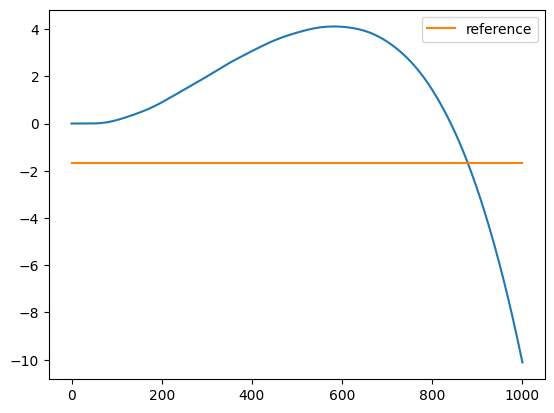

In [13]:
import matplotlib.pyplot as plt 

i = 5
plt.plot(controller_performance_sample.obs["obs"]["xpos_of_segment_end"][i])
plt.plot(controller_performance_sample.obs["ref"]["xpos_of_segment_end"][i], label="reference")
plt.legend()